# **Projet_2 "OpenFoodFacts"**

# **Nettoyage du Dataset:**

-L'objectif principal du nettoyage des données dans ce projet est d'améliorer la qualité de la base de données Open Food Facts afin de faciliter l'ajout de nouveaux produits de manière plus efficace. Plus spécifiquement, le nettoyage des données doit permettre de créer un système de suggestion ou d'auto-complétion pour aider les utilisateurs à remplir plus efficacement la base de données.

Définir sa démarche de préparation et nettoyage des données:

-Identification des Variables Pertinentes\
-Gestion des Valeurs Manquantes\
-Identification et Traitement des Valeurs Aberrantes\
-Traitement des Duplicats\
-Automatisation des Traitements\
-Respect des Normes RGPD


## **Importer les bibliothèques :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest
from scipy.stats import kurtosis, skew
import scipy.stats as stats

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler



## **Charger le jeu de donnée:**

In [2]:
data = pd.read_csv("Data/fr.openfoodfacts.org.products.csv/fr.openfoodfacts.org.products.csv", sep='\t')

KeyboardInterrupt: 

In [ ]:
def show_data(data):
    print('---------------------')
    print('Détails du dataset :')
    print('---------------------')
    # print('\n')
    print('1.La taille du dataset:')
    # print('\n')
    print('Il y a {} lignes et {} colonnes dans notre dataset.'.format(data.shape[0], data.shape[1]))
    print('\n')
    print('2. Affichage de la dataframe:')
    display(data.head(2))
    

In [ ]:
show_data(data)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 162 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                                                url  \
0  3087  http://world-fr.openfoodfacts.org/produit/0000...   
1  4530  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  

[2 rows x 162 columns]

## **Etape 1: Nettoyage et filtrage des features et produits:**

On appelle le data frame à nettoyer df_filtred:

In [ ]:
df_filtred = data.copy()

In [ ]:
df_filtred.head(2)

code                                                url  \
0  3087  http://world-fr.openfoodfacts.org/produit/0000...   
1  4530  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  

[2 rows x 162 columns]

### 1. **Lister les variables quantitatives (numériques) et qualitatives (catégorielles):**

In [ ]:
def features_quantitatives(data):
    # Listez les features quantitatives (numériques)
    features_quantitatives = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    return features_quantitatives

In [ ]:
print("Features quantitatives : ", features_quantitatives(df_filtred))

Features quantitatives :  ['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'eruc

In [ ]:
def features_qualitatives(data):
    # Listez les features qualitatives (catégorielles)
    features_qualitatives = data.select_dtypes(include=['object']).columns.tolist()
    return features_qualitatives

In [ ]:
print("Features qualitatives : ", features_qualitatives(df_filtred))

Features qualitatives :  ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']


### 2.**Choix de la variable cible:**

2. 1. **Affichage des variables cibles potentielles:**

On a le choix entre 3 variables cibles :

**Variable quantitative** : 'nutrition-score-fr_100g' (en France) ou 'nutrition-score-uk_100g' (anglaise). Leurs valeurs sont comprise entre -15 et 40.

**Variable qualitative** : 'nutrition_grade_fr' cette variable dépendra des valeurs de la variable 'nutrition-score-fr_100g' ou 'nutrition-score-uk_100g'.

2. 2. **La relation entre ces variables:**

En se référant à la section ‘Méthode de calcul du score’ sur la page Wikipedia du Nutri-Score ("https://fr.wikipedia.org/wiki/Nutri-score"), la dernière évolution des calculs, mise en place à partir de janvier 2024, indique que l’intervalle de calcul du ‘nutrition-score-fr_100g’ est entre -15 et +40. Ce score est ensuite converti en une lettre de A à E pour la colonne ‘nutrition_grade_fr’, et voici comment cela fonctionne :

**A (vert) :** pour un score entre -15 et -2

**B (vert clair) :** pour un score entre -1 et +3

**C (jaune) :** pour un score entre +4 et +11

**D (orange) :** pour un score entre +12 et +16 

**E (rouge) :** pour un score entre +17 et +40

Ces plages de scores correspondent à la qualité nutritionnelle globale des produits, avec A représentant la meilleure qualité nutritionnelle et E la moins bonne.

Nous devons d’abord vérifier si la colonne ‘nutrition_grade_fr’ a des valeurs manquantes alors que les colonnes ‘nutrition-score-fr_100g’ ou ‘nutrition-score-uk_100g’ n’en ont pas. Si c’est le cas, nous pouvons utiliser les valeurs de ces dernières pour compléter les valeurs manquantes de la colonne ‘nutrition_grade_fr’:

In [ ]:
# Compte le nombre de lignes où la colonne 'nutrition_grade_fr' est manquante et 'nutrition-score-fr_100g' est non manquante
count_missing_nutrition_grade = df_filtred[(df_filtred['nutrition_grade_fr'].isna() & df_filtred['nutrition-score-fr_100g'].notna()) | df_filtred['nutrition_grade_fr'].isna() & df_filtred['nutrition-score-uk_100g'].notna()].shape[0]

# Affiche le résultat
print(f"Nombre de lignes où 'nutrition_grade_fr' est manquant et 'nutrition-score-fr_100g' est non manquant : {count_missing_nutrition_grade}")

Nombre de lignes où 'nutrition_grade_fr' est manquant et 'nutrition-score-fr_100g' est non manquant : 0


Le résultat indique qu’il n’y a pas de lignes où [‘nutrition_grade_fr’ est manquant et où ‘nutrition-score-fr_100g’ & ‘nutrition-score-uk_100g’ ne sont pas manquants]. Cela signifie que nous ne pouvons pas utiliser les colonnes ‘nutrition-score-fr_100g’ ou ‘nutrition-score-uk_100g’ pour compléter les valeurs manquantes de la colonne ‘nutrition_grade_fr’. Dans le cadre des recommandations du projet, qui préconisent de choisir une variable cible parmi les colonnes qualitatives, la décision sera de conserver la colonne ‘nutrition_grade_fr’ et de supprimer les colonnes numériques ‘nutrition-score-fr_100g’ et ‘nutrition-score-uk_100g’.


2. 3. **Supression des colonnes 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g':**

In [ ]:
# Supprimez les colonnes
df_filtred = df_filtred.drop(['nutrition-score-fr_100g', 'nutrition-score-uk_100g'], axis=1)

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 160 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                                                url  \
0  3087  http://world-fr.openfoodfacts.org/produit/0000...   
1  4530  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

  generic_name quantity  ... caffeine_100g taurine_100g ph_100g  \
0          NaN      1kg  ...           NaN          NaN     NaN   
1          NaN      NaN  ...           NaN          NaN     NaN   

  fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
0                         NaN                              NaN        NaN   
1                         NaN                              NaN        NaN   

  chlorophyl_100g carbon-footprint_100g glycemic-index_100g  \
0             NaN                   NaN                 NaN   
1             NaN                   NaN                 NaN   

  water-hardness_100g  
0                 NaN  
1                 NaN  

[2 rows x 160 columns]

**Conclusion :** dans le cadre des recommandations du projet, et pour simplifier les choses, nous avons conservé uniquement la variable cible catégorielle 'nutrition_grade_fr'.

### 3. **Filtrage:**

#### 3. 1. **filtres sur les colonnes:**

##### 3. 1. 1. **Approche technique : Taux de remplissage:**

In [ ]:
# Définition de la fonction du taux de remplissage
def Taux_de_Remplissage(data, show_threshold_bar = True):

    # Calculer le taux de remplissage dans chaque colonne
    filling_rate = (1 - data.isnull().mean()) * 100

    # Créer un nouveau DataFrame avec le taux de remplissage
    filling_info = pd.DataFrame({
        'Colonne': data.columns,
        'Taux_de_Remplissage': filling_rate
    })

    # Afficher le DataFrame avec les informations sur le taux de remplissage
    filling_info = filling_info.reset_index(drop=True).sort_values(by="Taux_de_Remplissage", ascending=False).reset_index(drop=True)
    # display(filling_info)

    # Affichage
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 30))
    ax = sns.barplot(y=filling_info.Colonne, x=filling_info.Taux_de_Remplissage)
    ax.xaxis.set_ticks_position('top')
    plt.title('Taux de remplissage par colonne dans le jeu de données (en %)', size=15)
    # Ajouter le taux de remplissage sur chaque barre
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_width())
        x_pos = p.get_x() + p.get_width() + 0.1
        y_pos = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x_pos, y_pos))
        
    # Ajouter une barre verticale rouge à 30% si show_threshold_bar est True
        if show_threshold_bar:
            ax.axvline(x=40, color='red', linestyle='--', linewidth=2)
            # Ajouter le texte "30%" au-dessus de la barre
            plt.text(40, len(filling_info.Colonne) + 0.5, '40%', color='red', fontsize=12, ha='center')

    plt.show()


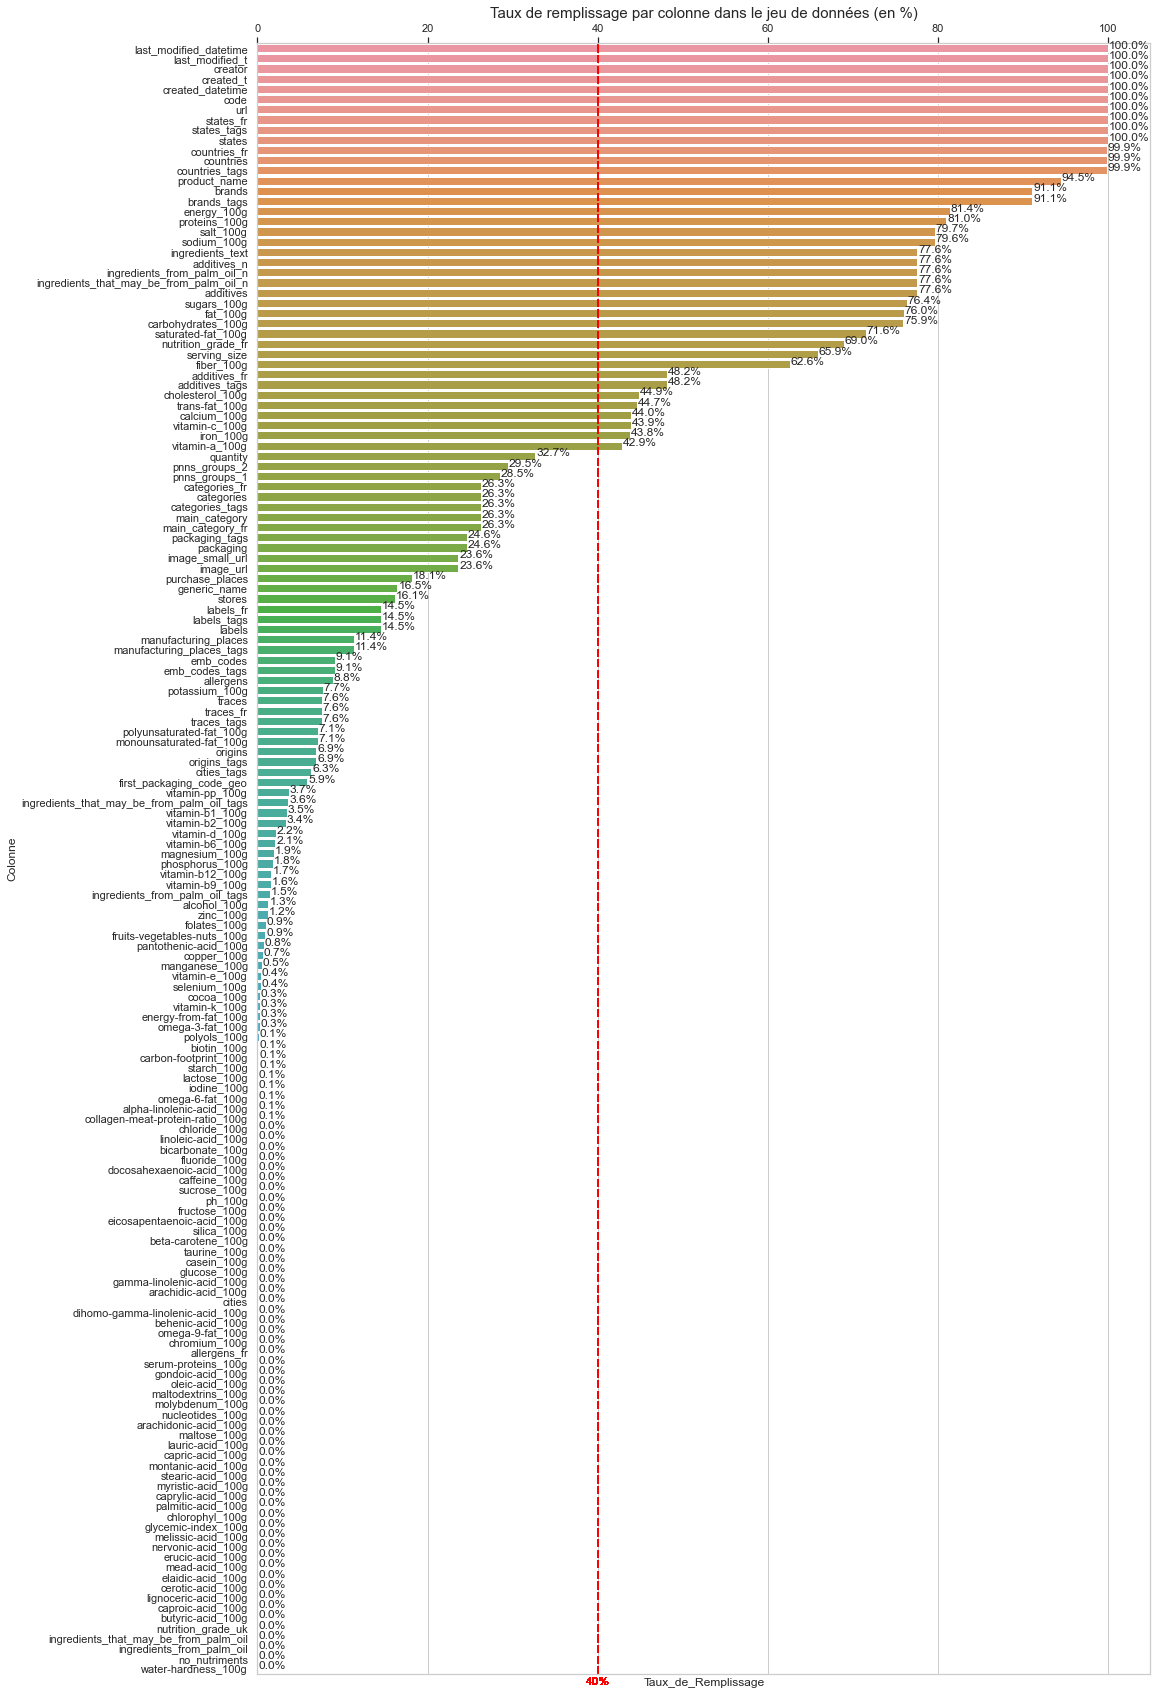

In [ ]:
Taux_de_Remplissage(df_filtred)

###### **On utilise l'approche technique et on fixe un seuil minimum de 40% de taux de remplissage :**

In [ ]:
print('Le nombre de lignes est {}, et le nombre de colonnes est {}.'.format(df_filtred.shape[0], df_filtred.shape[1]))

Le nombre de lignes est 320772, et le nombre de colonnes est 160.


In [ ]:
# on prend uniquement les colonnes en dessus du seul de 40%:
df_filtred = df_filtred.dropna(axis='columns', thresh=len(df_filtred)*0.40, how='all')

In [ ]:
print('Après application du seuil minimum de 40%, le nombre de lignes est {}, et le nombre de colonnes est {}.'.format(df_filtred.shape[0], df_filtred.shape[1]))

Après application du seuil minimum de 40%, le nombre de lignes est 320772, et le nombre de colonnes est 40.


Le taux de remplissage est de 40%. Nous avons réduit le nombre de colonnes de 160 à 40. Voici le nouveau taux de remplissage :

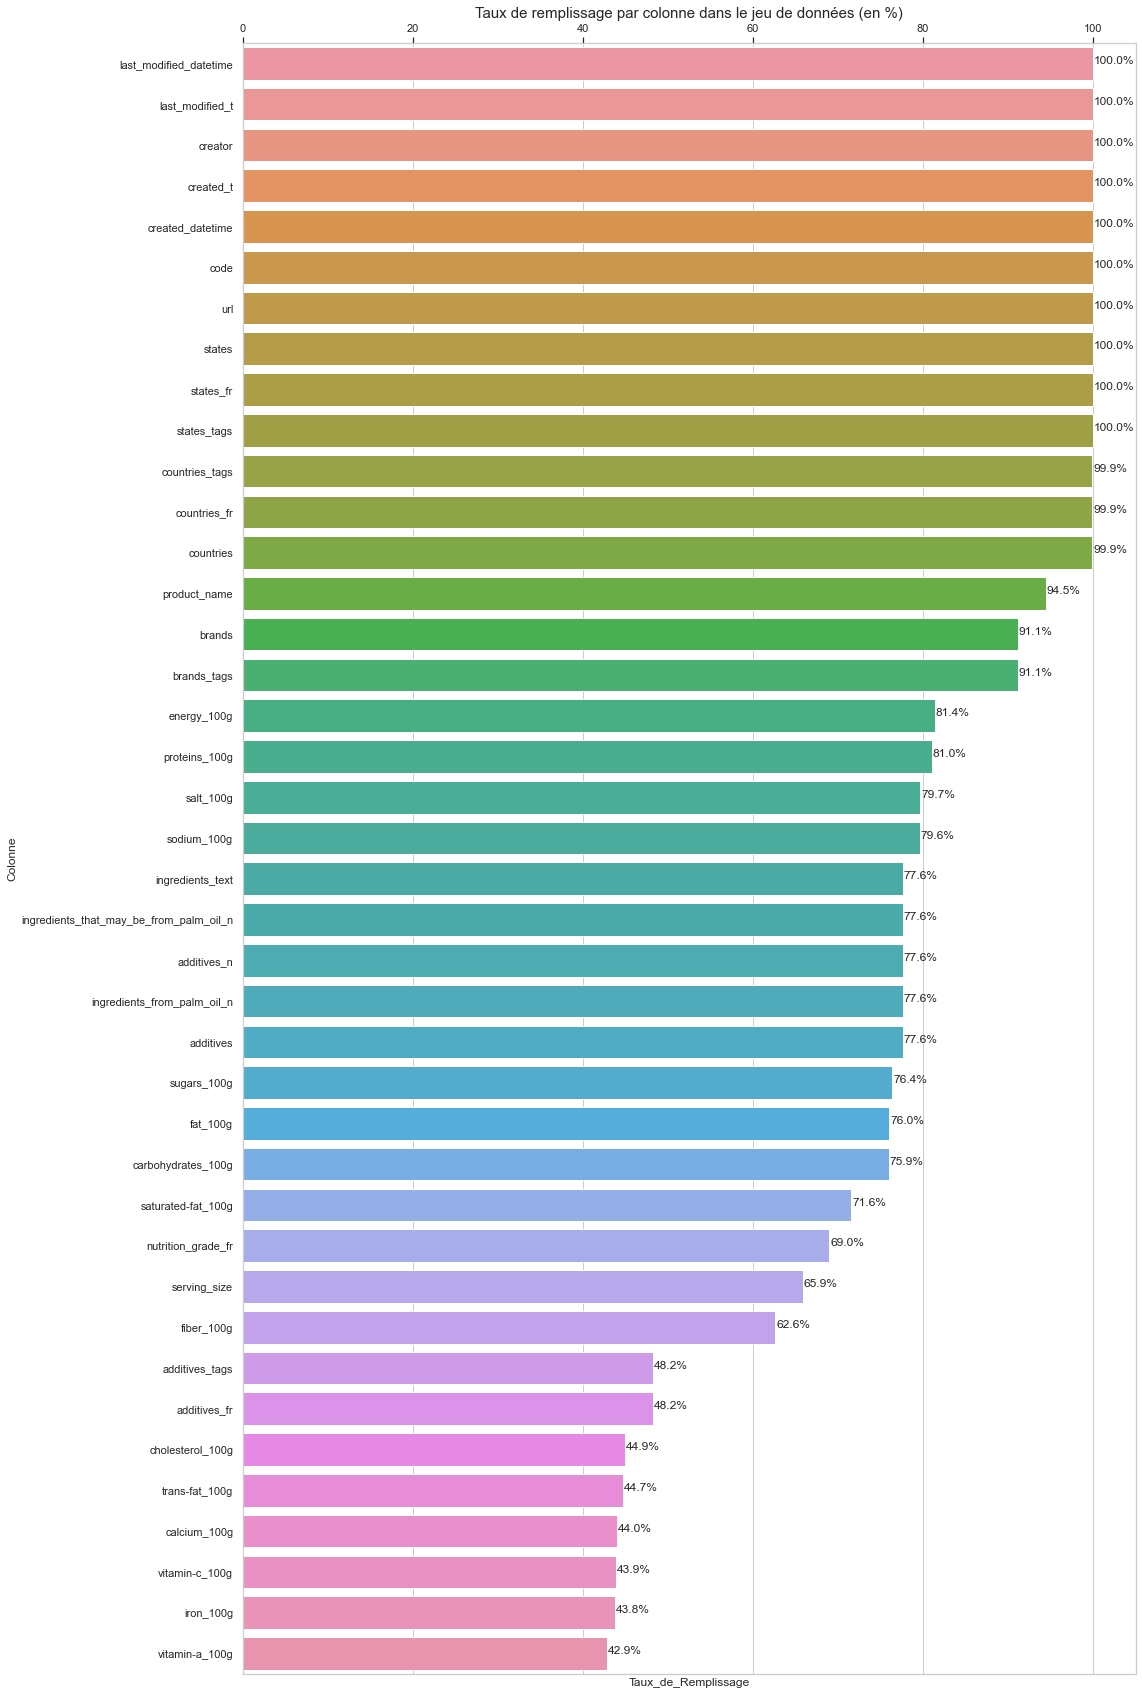

In [ ]:
Taux_de_Remplissage(df_filtred, show_threshold_bar = False)

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 40 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                                                url  \
0  3087  http://world-fr.openfoodfacts.org/produit/0000...   
1  4530  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

            brands      brands_tags  ... carbohydrates_100g sugars_100g  \
0  Ferme t'y R'nao  ferme-t-y-r-nao  ...                NaN         NaN   
1              NaN              NaN  ...              64.29       14.29   

  fiber_100g proteins_100g salt_100g  sodium_100g vitamin-a_100g  \
0        NaN           NaN       NaN          NaN            NaN   
1        3.6          3.57       0.0          0.0            0.0   

  vitamin-c_100g calcium_100g  iron_100g  
0            NaN          NaN        NaN  
1         0.0214          0.0    0.00129  

[2 rows x 40 columns]

##### 3.1.2 **Approche métier:**

**Voici la liste des variables restantes :**

In [ ]:
features_quantitatives(df_filtred)

['additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

In [ ]:
features_qualitatives(df_filtred)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives',
 'additives_tags',
 'additives_fr',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr']

**La règle est simple :** sélectionner les colonnes présentant un taux de remplissage élevé et qui ont une pertinence significative pour l'objectif métier.

**Les Features quantitatives à garder :**

Les colonnes se terminant par ‘_100g’ sont liées aux nutriments essentiels tels que l’énergie, les graisses, les glucides, les protéines, les fibres, les vitamines et les minéraux. Il est donc recommandé de les conserver pour l’instant.

En revanche, les colonnes relatives aux additifs ('additives_n') et à l’huile de palme('ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n') ne sont pas prises en compte dans le calcul du Nutri-Score. Par conséquent, elles peuvent être retirées de la liste pour cette analyse.

In [ ]:
features_quantitatives_pertinantes=[]
for col in features_quantitatives(df_filtred):
    if '100g' in col:
        features_quantitatives_pertinantes.append(col)
        
features_quantitatives_pertinantes

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

Parmi les variables quantitatives pertinantes, celles qui sont directement prises en compte dans le calcul du Nutri-Score sont :

**energy_100g :** C’est la quantité d’énergie, généralement exprimée en kilojoules (kJ) ou en kilocalories (kcal), que le produit apporte pour 100g.\
**fat_100g :** C’est la quantité totale de matières grasses présentes dans 100g du produit. Les matières grasses sont une source importante d’énergie pour le corps.\
**saturated-fat_100g :** C’est la quantité de graisses saturées présentes dans 100g du produit. Les graisses saturées sont un type de matières grasses qui peuvent augmenter le niveau de cholestérol dans le sang s’ils sont consommés en excès.\
**carbohydrates_100g :** C’est la quantité totale de glucides présents dans 100g du produit. Les glucides sont une source principale d’énergie pour le corps.\
**sugars_100g :** C’est la quantité de sucres présents dans 100g du produit. Les sucres sont un type de glucides qui peuvent être rapidement absorbés par le corps.\
**fiber_100g :** C’est la quantité de fibres alimentaires présentes dans 100g du produit. Les fibres sont importantes pour la santé digestive et peuvent aider à maintenir un sentiment de satiété.\
**proteins_100g :** C’est la quantité de protéines présentes dans 100g du produit. Les protéines sont essentielles pour la croissance et la réparation des tissus corporels.\
**salt_100g ou sodium_100g :** C’est la quantité de sel présente dans 100g du produit. Le sel est une source de sodium, qui est nécessaire pour le fonctionnement normal du corps, mais peut être nocif s’il est consommé en excès.

En revanche, les variables suivantes ne sont pas directement prises en compte dans le calcul du Nutri-Score :

**trans-fat_100g :** C’est la quantité de graisses trans présentes dans 100g du produit. Les graisses trans sont un type de matières grasses qui peuvent augmenter le niveau de cholestérol dans le sang et sont généralement considérées comme mauvaises pour la santé.\
**cholesterol_100g :** C’est la quantité de cholestérol présente dans 100g du produit. Le cholestérol est une substance grasse qui est présente dans toutes les cellules du corps. Un taux de cholestérol élevé peut augmenter le risque de maladies cardiovasculaires.\
**vitamin-a_100g :** C’est la quantité de vitamine A présente dans 100g du produit. La vitamine A est importante pour la vision, le système immunitaire et la reproduction.\
**vitamin-c_100g :** C’est la quantité de vitamine C présente dans 100g du produit. La vitamine C est nécessaire pour la croissance et la réparation des tissus dans toutes les parties du corps.\
**calcium_100g :** C’est la quantité de calcium présente dans 100g du produit. Le calcium est nécessaire pour la santé des os et des dents.\
**iron_100g :** C’est la quantité de fer présente dans 100g du produit. Le fer est un minéral essentiel qui joue un rôle clé dans le transport de l’oxygène dans le corps.

L’objectif du projet est de développer une application qui prend en compte uniquement les variables utilisées dans le calcul du Nutri-Score. Bien que d’autres nutriments, qui ne sont pas inclus dans le calcul du Nutri-Score, soient importants pour la santé, ils peuvent être utiles pour d’autres analyses nutritionnelles ou pour évaluer la qualité d’un produit alimentaire au-delà du Nutri-Score. Cependant, dans le cadre de ce projet, nous allons supprimer ces variables de notre liste 'features_quantitatives_pertinentes'.

**Sources:** https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score, https://scanup.fr/calculateur-nutri-score/

In [ ]:
list_to_drop = ['trans-fat_100g','cholesterol_100g','carbohydrates_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g']

for col in list_to_drop:
    features_quantitatives_pertinantes.remove(col)

features_quantitatives_pertinantes

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

**Les Features qualitatives à garder:**

les variables qualitatives qui sont pertinantes sont:

**Identification du produit :** code, product_name et brands sont essentiels pour l'identification unique du produit, le nom du produit.

**Origine :** La variable telle que countries_fr peuvent fournir des informations sur l'origine du produit.

**Informations temporelles :** created_t, last_modified_t, created_datetime et last_modified_datetime peuvent être utiles pour suivre la chronologie des données.

**Étiquetage nutritionnel :** nutrition_grade_fr est important pour évaluer la qualité 

In [ ]:
features_qualitatives_pertinantes = ['code', 'product_name', 'brands', 'countries_fr', 'created_t', 'last_modified_t', 'created_datetime', 'last_modified_datetime', 'nutrition_grade_fr']

In [ ]:
features_qualitatives_pertinantes

['code',
 'product_name',
 'brands',
 'countries_fr',
 'created_t',
 'last_modified_t',
 'created_datetime',
 'last_modified_datetime',
 'nutrition_grade_fr']

In [ ]:
features_pertinantes=[]
features_pertinantes.extend(features_qualitatives_pertinantes)
features_pertinantes.extend(features_quantitatives_pertinantes)

In [ ]:
print(features_pertinantes)

['code', 'product_name', 'brands', 'countries_fr', 'created_t', 'last_modified_t', 'created_datetime', 'last_modified_datetime', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


In [ ]:
# Mettre la variable cible en dernière position de la liste features_pertinantes:
features_pertinantes.remove('nutrition_grade_fr')
features_pertinantes.append('nutrition_grade_fr')
print(features_pertinantes)

['code', 'product_name', 'brands', 'countries_fr', 'created_t', 'last_modified_t', 'created_datetime', 'last_modified_datetime', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_grade_fr']


In [ ]:
df_filtred = df_filtred.loc[:,features_pertinantes]

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 17 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                    product_name           brands countries_fr  \
0  3087              Farine de blé noir  Ferme t'y R'nao       France   
1  4530  Banana Chips Sweetened (Whole)              NaN   États-Unis   

    created_t last_modified_t      created_datetime last_modified_datetime  \
0  1474103866      1474103893  2016-09-17T09:17:46Z   2016-09-17T09:18:13Z   
1  1489069957      1489069957  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   

   energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0          NaN       NaN                 NaN          NaN         NaN   
1       2243.0     28.57               28.57        14.29         3.6   

   proteins_100g  salt_100g  sodium_100g nutrition_grade_fr  
0            NaN        NaN          NaN                NaN  
1           3.57        0.0          0.0                  d

##### 3.1.3 **Suppression des colonnes redondantes:**

1. **Recherche de correlation**:

In [ ]:
def correlation_matrix(data):
    # Calculer la matrice de corrélation
    correlation_matrix = data.corr()

    # Afficher la heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matrice de corrélation des caractéristiques numériques')
    plt.show()

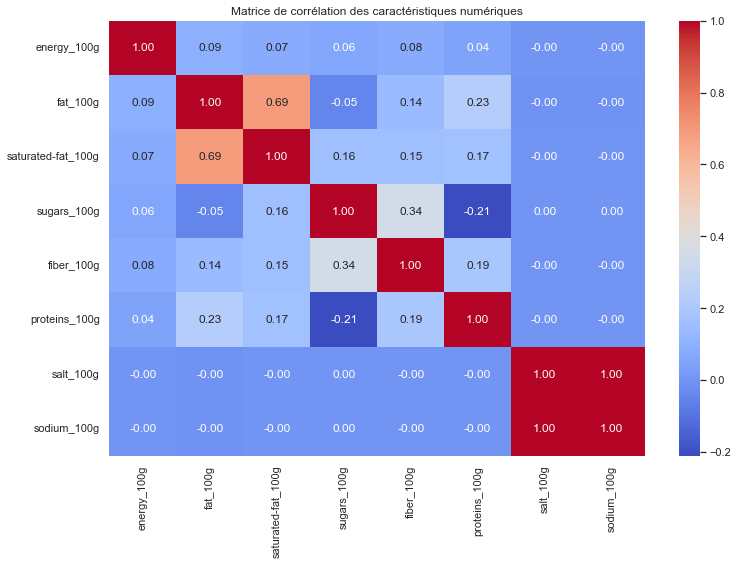

In [ ]:
correlation_matrix(df_filtred)

On constate une corrélation parfaite entre les variables sodium_100g et salt_100g. De plus, le sodium est une composante du sel (salt), et le taux de complétion est le suivant :

- sodium_100g : 79,6%
- salt_100g : 79,7%

Par conséquent, nous pouvons supprimer la colonne redondante sodium_100g. Elle ne contribue pas d’informations supplémentaires étant donné la forte corrélation avec la colonne salt_100g

In [ ]:
df_filtred = df_filtred.drop('sodium_100g',axis=1)

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 16 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                    product_name           brands countries_fr  \
0  3087              Farine de blé noir  Ferme t'y R'nao       France   
1  4530  Banana Chips Sweetened (Whole)              NaN   États-Unis   

    created_t last_modified_t      created_datetime last_modified_datetime  \
0  1474103866      1474103893  2016-09-17T09:17:46Z   2016-09-17T09:18:13Z   
1  1489069957      1489069957  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   

   energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0          NaN       NaN                 NaN          NaN         NaN   
1       2243.0     28.57               28.57        14.29         3.6   

   proteins_100g  salt_100g nutrition_grade_fr  
0            NaN        NaN                NaN  
1           3.57        0.0                  d

1. **Les colonnes dates:**

Les colonnes 'created_t' (format UNIX timestamp) et 'last_modified_t' indiquent la date d'ajout et la dernière modification des produits. Cependant, ces informations sont redondantes avec les colonnes 'created_datetime' (format iso8601 : yyyy-mm-ddThh:mn:ssZ) et 'last_modified_datetime'. Pour simplifier la structure des données, il est recommandé de supprimer 'created_t' et 'last_modified_t'.

In [ ]:
# Supprimer les colonnes 'created_t','last_modified_t' au format UNIX timestamp
df_filtred.drop(['created_t','last_modified_t'], axis=1, inplace=True)

Nous allons convertir les colonnes 'created_datetime' et 'last_modified_datetime' au format de date. Intentionnellement, nous provoquerons des exceptions pour remplacer les chaînes de caractères par des valeurs 'NaT' (Not a Time). À cette fin, nous utilisons la fonction pd.to_datetime avec le paramètre errors='coerce'

In [ ]:
# Convertir la colonne 'created_datetime' en format de date et heure
df_filtred.created_datetime = pd.to_datetime(df_filtred.created_datetime, errors='coerce')

# Convertir la colonne 'last_modified_datetime' en format de date et heure
df_filtred.last_modified_datetime = pd.to_datetime(df_filtred.last_modified_datetime, errors='coerce')


In [ ]:
df_filtred.dtypes

code                                   object
product_name                           object
brands                                 object
countries_fr                           object
created_datetime          datetime64[ns, UTC]
last_modified_datetime    datetime64[ns, UTC]
energy_100g                           float64
fat_100g                              float64
saturated-fat_100g                    float64
sugars_100g                           float64
fiber_100g                            float64
proteins_100g                         float64
salt_100g                             float64
nutrition_grade_fr                     object
dtype: object

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 320772 lignes et 14 colonnes dans notre dataset.


2. Affichage de la dataframe:


code                    product_name           brands countries_fr  \
0  3087              Farine de blé noir  Ferme t'y R'nao       France   
1  4530  Banana Chips Sweetened (Whole)              NaN   États-Unis   

           created_datetime    last_modified_datetime  energy_100g  fat_100g  \
0 2016-09-17 09:17:46+00:00 2016-09-17 09:18:13+00:00          NaN       NaN   
1 2017-03-09 14:32:37+00:00 2017-03-09 14:32:37+00:00       2243.0     28.57   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                 NaN          NaN         NaN            NaN        NaN   
1               28.57        14.29         3.6           3.57        0.0   

  nutrition_grade_fr  
0                NaN  
1                  d

#### 3.2 **Filtres sur les lignes:**

##### 3.2.1 **Filtrage et traitement des pays** :

1. Mise au propre des valeurs de la colonne countries_fr :

- Conservation que du premier pays renseigné
- Suppression du 'en:'

In [ ]:
df_filtred.countries_fr.value_counts()

États-Unis                                      172998
France                                           94392
Suisse                                           14953
Allemagne                                         7870
Espagne                                           5009
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

Dans la colonne countries_fr, on remarque que certaines lignes contiennent plusieurs pays. Nous allons conserver uniquement le premier pays mentionné et supprimer les autres.

In [ ]:
#Conservation du premier pays
df_filtred.reset_index(drop=True)
df_filtred['countries_fr'] = df_filtred['countries_fr'].str.split(',', n=1, expand=True)[0]

nous allons également supprimer la mention ‘en:’ devant les noms de certains pays:

In [ ]:
df_filtred[df_filtred.countries_fr.str.contains('en:', na=False)]['countries_fr'].unique().tolist()

['en:United-states-of-america',
 'en:Deutschland',
 'en:Global-market',
 'en:الإمارات-العربية-المتحدة',
 'en:Island',
 'en:Gulf-countries',
 'en:Turkiye',
 'en:السعودية',
 'en:Scotland',
 'en:Belgie',
 'en:whole-milk-yogurts',
 'en:stirred-yogurts',
 'en:yogurts',
 'en:fruit-yogurts',
 'en:dairies',
 'en:日本',
 'en:Republique-de-chine',
 'en:香港',
 'en:Denemarken',
 'en:Azərbaycan',
 'en:البحرين',
 'en:Tunisie',
 'en:سلطنة-عمان',
 'en:Nederland',
 'en:Quebec',
 'en:भारत']

In [ ]:
# Suppression des 'en' avec la méthode lstrip():
df_filtred['countries_fr']=df_filtred['countries_fr'].str.lstrip('en:')
print(df_filtred['countries_fr'].unique().tolist())

['France', 'États-Unis', 'Royaume-Uni', 'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie', 'Roumanie', 'Australie', 'Portugal', 'Belgique', 'Guadeloupe', nan, 'Pays-Bas', 'Irlande', 'Taiwan', 'Brésil', 'République dominicaine', 'Arabie saoudite', 'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Nouvelle-Calédonie', 'Singapour', 'Finlande', 'Polynésie française', 'Panama', 'Costa Rica', 'Mexique', 'Thaïlande', 'Chine', 'Luxembourg', 'Liban', 'Danemark', 'Malaisie', 'Guyana', 'Serbie', 'Martinique', 'Barbade', 'Aruba', 'Hong Kong', 'Norvège', 'Haïti', 'Salvador', 'Bahreïn', 'La Réunion', 'Maroc', 'Oman', 'Corée du Sud', 'Trinité-et-Tobago', 'Chili', 'Cuba', 'Philippines', 'United-states-of-america', 'Autriche', 'Suède', 'Guinée', 'Israël', 'Russie', 'Saint-Pierre-et-Miquelon', 'Algérie', 'Quebec', 'République tchèque', 'Maurice', 'Indonésie', 'Arménie', "Côte d'Ivoire", 'Pologne', 'Grèce', 'Inde', 'Équateur', 'Turquie', 'Cambodge', 'Argentine', 'Union européenne', 'Jo

2. Graphique bar plot de la colonne 'countries_fr' :

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramDa

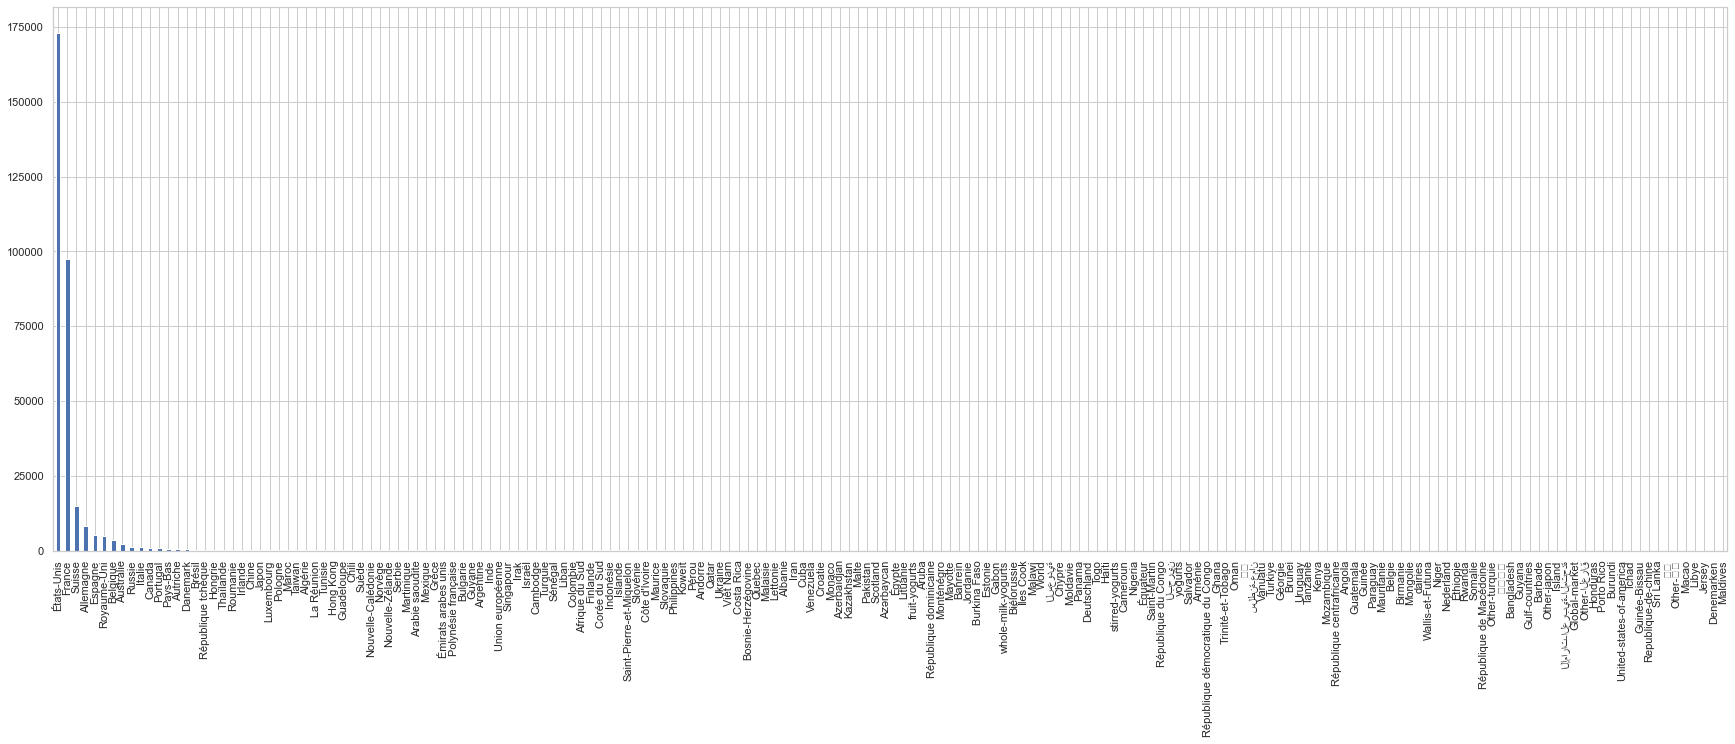

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
df_filtred.countries_fr.value_counts().plot(kind='bar')
plt.show()

**Conclusion :** Dans le processus de filtrage des données les deux pays les plus fréquemment mentionnés sont la France et les États-Unis. Dans le cahier des charges, il est mentionné qu'il s'agit de développer une application pour améliorer la base de données "Open Food Facts" de l'agence Santé publique France. Par conséquent, nous décidons de conserver uniquement les données Française.

In [ ]:
df_filtred = df_filtred[(df_filtred['countries_fr'] == 'France') ]
df_filtred.reset_index(drop=True)

code                product_name                 brands  \
0               3087          Farine de blé noir        Ferme t'y R'nao   
1              24600               Filet de bœuf                    NaN   
2              27205                         NaN                    NaN   
3              36252              Lion Peanut x2               Sunridge   
4              39259                     Twix x2                    NaN   
...              ...                         ...                    ...   
97443  9906410000009   Roussette du Bugey (2011)     Roussette du Bugey   
97444       99111250          Thé vert Earl grey                Lobodis   
97445           9918  Cheese cake thé vert, yuzu                    NaN   
97446  9935010000003              Rillette d'oie  Sans marque,D.Lambert   
97447  9980282863788    Tomates aux Vermicelles                   Knorr   

      countries_fr          created_datetime    last_modified_datetime  \
0           France 2016-09-17 09:17:46+00:00 2016-09-17 09:18:13+00:00   
1           France 2015-06-17 08:45:04+00:00 2015-06-17 10:11:54+00:00   
2           France 2016-03-17 18:17:10+00:00 2016-03-17 18:17:18+00:00   
3           France 2015-01-25 21:35:01+00:00 2017-03-09 10:34:27+00:00   
4           France 2015-01-25 21:36:13+00:00 2016-09-10 20:08:02+00:00   
...            ...                       ...                       ...   
97443       France 2013-07-10 18:20:08+00:00 2016-01-03 20:00:15+00:00   
97444       France 2013-04-28 15:30:39+00:00 2013-06-20 01:09:16+00:00   
97445       France 2015-04-27 20:52:34+00:00 2015-04-27 20:53:12+00:00   
97446       France 2015-10-31 12:07:09+00:00 2015-11-01 11:20:39+00:00   
97447       France 2017-04-16 10:54:49+00:00 2017-04-16 10:54:49+00:00   

       energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0              NaN       NaN                 NaN          NaN         NaN   
1              NaN       NaN                 NaN          NaN         NaN   
2              NaN       NaN                 NaN          NaN         NaN   
3           1883.0      20.0                12.5         57.5         2.5   
4              NaN       NaN                 NaN          NaN         NaN   
...            ...       ...                 ...          ...         ...   
97443          NaN       NaN                 NaN          NaN         NaN   
97444         21.0       0.2                 0.2          0.5         0.2   
97445          NaN       NaN                 NaN          NaN         NaN   
97446          NaN       NaN                 NaN          NaN         NaN   
97447          NaN       NaN                 NaN          NaN         NaN   

       proteins_100g  salt_100g nutrition_grade_fr  
0                NaN        NaN                NaN  
1                NaN        NaN                NaN  
2                NaN        NaN                NaN  
3                2.5    0.09652                  e  
4                NaN        NaN                NaN  
...              ...        ...                ...  
97443            NaN        NaN                NaN  
97444            0.5    0.02540                  c  
97445            NaN        NaN                NaN  
97446            NaN        NaN                NaN  
97447            NaN        NaN                NaN  

[97448 rows x 14 columns]

Après avoir filtré les données pour la France, on pourrait supprimer la colonne ‘countries_fr’:

In [ ]:
# Suppression de la colonne 'countries_fr':
df_filtred = df_filtred.drop('countries_fr', axis=1)

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 97448 lignes et 13 colonnes dans notre dataset.


2. Affichage de la dataframe:


code        product_name           brands          created_datetime  \
0    3087  Farine de blé noir  Ferme t'y R'nao 2016-09-17 09:17:46+00:00   
46  24600       Filet de bœuf              NaN 2015-06-17 08:45:04+00:00   

      last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
0  2016-09-17 09:18:13+00:00          NaN       NaN                 NaN   
46 2015-06-17 10:11:54+00:00          NaN       NaN                 NaN   

    sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
0           NaN         NaN            NaN        NaN                NaN  
46          NaN         NaN            NaN        NaN                NaN

##### 3.2.2 **Suprression des lignes qui n'ont pas de 'code' , 'product_name' et 'brands' :**

1. Vérifier les valeurs manquantes sur la colonne 'code', 'product_name' et 'brands' : 

In [ ]:
def verif_nan(df):
    # Nombre de lignes nan dans la colonne code:
    nb_lignes_nan_code = df.code.isnull().sum()
    # Nombre de lignes nan dans la colonne product_name:
    nb_lignes_nan_product_name = df.product_name.isnull().sum()
      # Nombre de lignes nan dans la colonne brands :
    nb_lignes_nan_brands = df.brands.isnull().sum()
    print("Le nombre de lignes NAN dans la colonne 'code' est : {} lignes, dans la colonne 'product_name' est : {} lignes et dans la colonne 'brands' est : {} lignes.".format(nb_lignes_nan_code, nb_lignes_nan_product_name, nb_lignes_nan_brands))

In [ ]:
verif_nan(df_filtred)

Le nombre de lignes NAN dans la colonne 'code' est : 0 lignes, dans la colonne 'product_name' est : 7182 lignes et dans la colonne 'brands' est : 11993 lignes.


2. suppression des valeurs manquantes dans la colonne 'code', 'product_name' et 'brands':

In [ ]:
# Supression des valeurs manquantes dans la colonne 'code':
df_filtred = df_filtred.dropna(subset=['code', 'product_name', 'brands'])

In [ ]:
verif_nan(df_filtred)

Le nombre de lignes NAN dans la colonne 'code' est : 0 lignes, dans la colonne 'product_name' est : 0 lignes et dans la colonne 'brands' est : 0 lignes.


**Conclusion:** Il est essentiel d'éviter les valeurs manquantes dans les colonnes 'code' et 'product_name' et 'brands, car ces trois attributs sont fondamentaux pour l'identification unique des produits alimentaires (primary keys). Le code-barres ('code') agit comme un identifiant universel, tandis que le nom du produit ('product_name') fournit une description essentielle, et le brands la marque du produit.

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 84433 lignes et 13 colonnes dans notre dataset.


2. Affichage de la dataframe:


code        product_name           brands          created_datetime  \
0     3087  Farine de blé noir  Ferme t'y R'nao 2016-09-17 09:17:46+00:00   
106  36252      Lion Peanut x2         Sunridge 2015-01-25 21:35:01+00:00   

       last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
0   2016-09-17 09:18:13+00:00          NaN       NaN                 NaN   
106 2017-03-09 10:34:27+00:00       1883.0      20.0                12.5   

     sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
0            NaN         NaN            NaN        NaN                NaN  
106         57.5         2.5            2.5    0.09652                  e

##### 3.2.3 **Supression des lignes (produits) ne présentant pas de valeurs cible:**

In [ ]:
# La variable cible est nutrition_grade_fr ; supprimons les valeurs 'nan':
df_filtred = df_filtred[df_filtred['nutrition_grade_fr'].notna()]

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 60156 lignes et 13 colonnes dans notre dataset.


2. Affichage de la dataframe:


code    product_name        brands          created_datetime  \
106     36252  Lion Peanut x2      Sunridge 2015-01-25 21:35:01+00:00   
190  10187319  Mini Confettis  Alice Délice 2017-02-17 10:05:54+00:00   

       last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
106 2017-03-09 10:34:27+00:00       1883.0      20.0                12.5   
190 2017-02-17 10:05:54+00:00       1753.0       NaN                 0.8   

     sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
106         57.5         2.5            2.5    0.09652                  e  
190         87.7         0.9            0.6    0.01000                  d

##### 3.2.4 **Supression des lignes en double:**

On reconnaît un produit s'il possède un code, un nom de produit et un brands uniques. Par conséquent, **la clé primaire** dans notre dataframe 'df' est **['code', 'product_name', 'brands']**.


In [ ]:
primary_key = ['code', 'product_name', 'brands']

1. **Afficher le nombre de lignes dupliquées par rapport à notre clé primaire:**

In [ ]:
def duplicated_row(df):
    # Nombre de lignes dupliquées dans la colonne code:
    nb_duplicates = df.duplicated(subset=primary_key).sum()
    print("Le nombre de lignes dupliquées par rapport à notre clé primaire sont: {} lignes.".format(nb_duplicates))

In [ ]:
duplicated_row(df_filtred)

Le nombre de lignes dupliquées par rapport à notre clé primaire sont: 0 lignes.


**Conclusion:**
Après avoir filtré les données pour ne conserver que les données françaises, aucun doublon n'a été trouvé en rapport avec la clé primaire. La suppression des lignes dupliquées, en se basant sur les variables de la clé primaire du DataFrame `df_filtred`, contribue à garantir l'intégrité et la qualité des données. En éliminant les doublons, nous nous assurons que chaque enregistrement dans le DataFrame est unique, évitant ainsi toute confusion ou incohérence lors des analyses ultérieures.

In [ ]:
show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 60156 lignes et 13 colonnes dans notre dataset.


2. Affichage de la dataframe:


code    product_name        brands          created_datetime  \
106     36252  Lion Peanut x2      Sunridge 2015-01-25 21:35:01+00:00   
190  10187319  Mini Confettis  Alice Délice 2017-02-17 10:05:54+00:00   

       last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
106 2017-03-09 10:34:27+00:00       1883.0      20.0                12.5   
190 2017-02-17 10:05:54+00:00       1753.0       NaN                 0.8   

     sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
106         57.5         2.5            2.5    0.09652                  e  
190         87.7         0.9            0.6    0.01000                  d

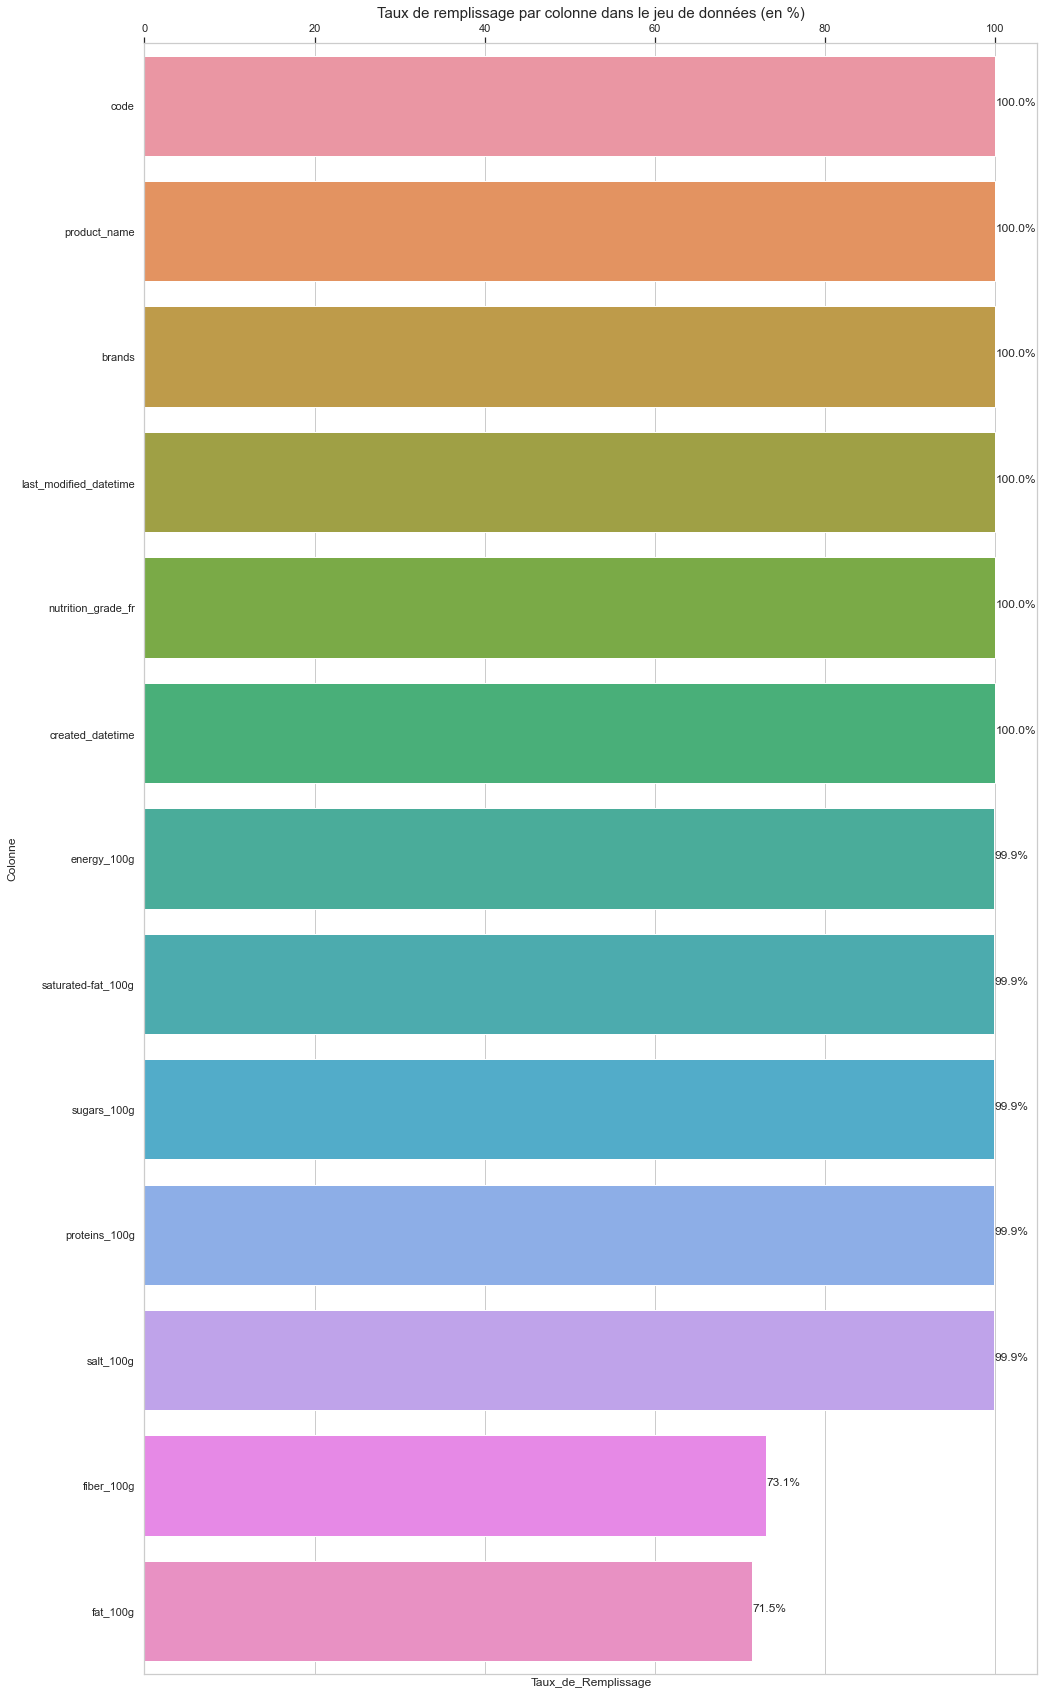

In [ ]:
Taux_de_Remplissage(df_filtred, show_threshold_bar=False)

##### 3.2.5 **Traitement des catégories** :

1. Choix des variables catégories:

In [ ]:
# primary_key = ['code', 'product_name', 'brands']
variables_categories=['code', 'product_name', 'brands', 'pnns_groups_1','pnns_groups_2','main_category','main_category_fr','categories', 'categories_tags', 'categories_fr']
data_categories=data[variables_categories]
data_categories

code                                       product_name  \
0                3087                                 Farine de blé noir   
1                4530                     Banana Chips Sweetened (Whole)   
2                4559                                            Peanuts   
3               16087                             Organic Salted Nut Mix   
4               16094                                    Organic Polenta   
...               ...                                                ...   
320767  9948282780603                                  Tomato & ricotta    
320768       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769  9970229501521                                            乐吧泡菜味薯片   
320770  9980282863788                           Tomates aux Vermicelles    
320771   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands pnns_groups_1 pnns_groups_2       main_category  \
0       Ferme t'y R'nao           NaN           NaN                 NaN   
1                   NaN           NaN           NaN                 NaN   
2        Torn & Glasser           NaN           NaN                 NaN   
3             Grizzlies           NaN           NaN                 NaN   
4        Bob's Red Mill           NaN           NaN                 NaN   
...                 ...           ...           ...                 ...   
320767         Panzani            NaN           NaN                 NaN   
320768     Trader Joe's           NaN           NaN                 NaN   
320769               乐吧  Salty snacks    Appetizers  en:chips-and-fries   
320770            Knorr           NaN           NaN                 NaN   
320771    Market Pantry           NaN           NaN                 NaN   

       main_category_fr    categories  \
0                   NaN           NaN   
1                   NaN           NaN   
2                   NaN           NaN   
3                   NaN           NaN   
4                   NaN           NaN   
...                 ...           ...   
320767              NaN           NaN   
320768              NaN           NaN   
320769  Chips et frites  Potato chips   
320770              NaN           NaN   
320771              NaN           NaN   

                                          categories_tags  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
320767                                                NaN   
320768                                                NaN   
320769  en:salty-snacks,en:appetizers,en:chips-and-fri...   
320770                                                NaN   
320771                                                NaN   

                                            categories_fr  
0                                                     NaN  
1                                                     NaN  
2                                                     NaN  
3                                                     NaN  
4                                                     NaN  
...                                                   ...  
320767                                                NaN  
320768                                                NaN  
320769  Snacks salés,Apéritif,Chips et frites,Chips,Ch...  
320770                                                NaN  
320771                                                NaN  

[320772 rows x 10 columns]

2. Suppression des produits ne contenant aucune catégorie:

In [ ]:
data_categories_temp=data_categories.dropna(subset=['pnns_groups_1','pnns_groups_2','main_category','main_category_fr','categories','categories_tags','categories_fr'],how='all')
data_categories_temp.shape

(94537, 10)

In [ ]:
# Nombre de valeur unique dans chacune des colonnes de catégorie
data_categories_temp.nunique()

code                94509
product_name        74550
brands              24527
pnns_groups_1          14
pnns_groups_2          42
main_category        3543
main_category_fr     3543
categories          36982
categories_tags     21142
categories_fr       21152
dtype: int64

Les catégories **pnns_groups_1** est la plus renseignées et celle contenant le moins de sous catégories

In [ ]:
data_categories=data_categories[['code', 'product_name', 'brands', 'pnns_groups_1']]
data_categories

code                                       product_name  \
0                3087                                 Farine de blé noir   
1                4530                     Banana Chips Sweetened (Whole)   
2                4559                                            Peanuts   
3               16087                             Organic Salted Nut Mix   
4               16094                                    Organic Polenta   
...               ...                                                ...   
320767  9948282780603                                  Tomato & ricotta    
320768       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769  9970229501521                                            乐吧泡菜味薯片   
320770  9980282863788                           Tomates aux Vermicelles    
320771   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands pnns_groups_1  
0       Ferme t'y R'nao           NaN  
1                   NaN           NaN  
2        Torn & Glasser           NaN  
3             Grizzlies           NaN  
4        Bob's Red Mill           NaN  
...                 ...           ...  
320767         Panzani            NaN  
320768     Trader Joe's           NaN  
320769               乐吧  Salty snacks  
320770            Knorr           NaN  
320771    Market Pantry           NaN  

[320772 rows x 4 columns]

3. **Traitement des textes sur la colonne pnns_groups_1**:

In [ ]:
print (data_categories_temp.pnns_groups_1.unique().tolist())

['unknown', 'Fruits and vegetables', 'Sugary snacks', 'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs', 'Beverages', 'Fat and sauces', 'fruits-and-vegetables', nan, 'Milk and dairy products', 'Salty snacks', 'sugary-snacks', 'cereals-and-potatoes', 'salty-snacks']


In [ ]:
# Mise en forme des colonnes
# Mise en type String
data_categories[['pnns_groups_1']] = data_categories[['pnns_groups_1']].astype(str)

# Minuscule pour tous
data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].apply(lambda x:x.lower() if str(x)!='nan' else x)

# Rempalcement des '-' par des ' '
data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].str.replace('-',' ')

C:\Users\bille\AppData\Local\Temp\ipykernel_36520\2119967141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categories[['pnns_groups_1']] = data_categories[['pnns_groups_1']].astype(str)
C:\Users\bille\AppData\Local\Temp\ipykernel_36520\2119967141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].apply(lambda x:x.lower() if str(x)!='nan' else x)
C:\Users\bille\AppData\Local\Temp\ipykernel_36520\2119967141.py:9: SettingWithCopyWa

In [ ]:

data_categories.pnns_groups_1.unique().tolist()

['nan',
 'unknown',
 'fruits and vegetables',
 'sugary snacks',
 'cereals and potatoes',
 'composite foods',
 'fish meat eggs',
 'beverages',
 'fat and sauces',
 'milk and dairy products',
 'salty snacks']

In [ ]:
data_categories

code                                       product_name  \
0                3087                                 Farine de blé noir   
1                4530                     Banana Chips Sweetened (Whole)   
2                4559                                            Peanuts   
3               16087                             Organic Salted Nut Mix   
4               16094                                    Organic Polenta   
...               ...                                                ...   
320767  9948282780603                                  Tomato & ricotta    
320768       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769  9970229501521                                            乐吧泡菜味薯片   
320770  9980282863788                           Tomates aux Vermicelles    
320771   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands pnns_groups_1  
0       Ferme t'y R'nao           nan  
1                   NaN           nan  
2        Torn & Glasser           nan  
3             Grizzlies           nan  
4        Bob's Red Mill           nan  
...                 ...           ...  
320767         Panzani            nan  
320768     Trader Joe's           nan  
320769               乐吧  salty snacks  
320770            Knorr           nan  
320771    Market Pantry           nan  

[320772 rows x 4 columns]

In [ ]:
data_categories.shape

(320772, 4)

In [ ]:
# Suppression des doublons par rapport primary_key dans le dataframe avec les catégories avant la jointure gauche
data_categories.drop_duplicates(subset=primary_key,inplace=True)

C:\Users\bille\AppData\Local\Temp\ipykernel_36520\1282819946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categories.drop_duplicates(subset=primary_key,inplace=True)


In [ ]:
data_categories.shape

(320745, 4)

In [ ]:
df_filtred.shape

(60156, 13)

4. **Merger data_categories avec df_filtred**:

In [ ]:
# Fusion des 2 dataframes par la gauche pour avoir les catégories des produits retenus

df_filtred=pd.merge(df_filtred,data_categories,on=primary_key,how='left')
print(df_filtred.shape)
df_filtred.head()

(60156, 14)


code                product_name        brands  \
0     36252              Lion Peanut x2      Sunridge   
1  10187319              Mini Confettis  Alice Délice   
2  10207260  Praliné Amande Et Noisette  Alice Délice   
3  40608754       Pepsi, Nouveau goût !         Pepsi   
4  69161025   Tarte Poireaux Et Lardons      Bo Frost   

           created_datetime    last_modified_datetime  energy_100g  fat_100g  \
0 2015-01-25 21:35:01+00:00 2017-03-09 10:34:27+00:00       1883.0      20.0   
1 2017-02-17 10:05:54+00:00 2017-02-17 10:05:54+00:00       1753.0       NaN   
2 2017-03-22 17:17:11+00:00 2017-03-22 17:29:17+00:00       2406.0       NaN   
3 2012-08-15 09:48:28+00:00 2015-08-09 17:35:31+00:00        177.0       0.0   
4 2017-03-22 19:59:36+00:00 2017-03-22 19:59:36+00:00       1079.0       NaN   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                12.5         57.5         2.5            2.5    0.09652   
1                 0.8         87.7         0.9            0.6    0.01000   
2                 2.9         50.3         3.9            9.5    0.00300   
3                 0.0         10.4         0.0            0.0    0.02540   
4                11.0          1.0         1.4            7.5    0.80000   

  nutrition_grade_fr pnns_groups_1  
0                  e       unknown  
1                  d           nan  
2                  d           nan  
3                  e     beverages  
4                  d           nan

In [ ]:
# changer la position de la colonne pnns_groups_1 à la 5ème: 
df_filtred.insert(4, 'pnns_groups_1', df_filtred.pop('pnns_groups_1'))
df_filtred.head()

code                product_name        brands  \
0     36252              Lion Peanut x2      Sunridge   
1  10187319              Mini Confettis  Alice Délice   
2  10207260  Praliné Amande Et Noisette  Alice Délice   
3  40608754       Pepsi, Nouveau goût !         Pepsi   
4  69161025   Tarte Poireaux Et Lardons      Bo Frost   

           created_datetime pnns_groups_1    last_modified_datetime  \
0 2015-01-25 21:35:01+00:00       unknown 2017-03-09 10:34:27+00:00   
1 2017-02-17 10:05:54+00:00           nan 2017-02-17 10:05:54+00:00   
2 2017-03-22 17:17:11+00:00           nan 2017-03-22 17:29:17+00:00   
3 2012-08-15 09:48:28+00:00     beverages 2015-08-09 17:35:31+00:00   
4 2017-03-22 19:59:36+00:00           nan 2017-03-22 19:59:36+00:00   

   energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0       1883.0      20.0                12.5         57.5         2.5   
1       1753.0       NaN                 0.8         87.7         0.9   
2       2406.0       NaN                 2.9         50.3         3.9   
3        177.0       0.0                 0.0         10.4         0.0   
4       1079.0       NaN                11.0          1.0         1.4   

   proteins_100g  salt_100g nutrition_grade_fr  
0            2.5    0.09652                  e  
1            0.6    0.01000                  d  
2            9.5    0.00300                  d  
3            0.0    0.02540                  e  
4            7.5    0.80000                  d

In [ ]:
df_filtred.pnns_groups_1.value_counts()

nan                        14124
sugary snacks               7520
unknown                     6838
milk and dairy products     5053
cereals and potatoes        5024
composite foods             5004
fish meat eggs              4594
beverages                   4309
fruits and vegetables       3120
fat and sauces              2788
salty snacks                1782
Name: pnns_groups_1, dtype: int64

In [ ]:
df_filtred = df_filtred[~((df_filtred.pnns_groups_1 == 'nan'))].reset_index(drop=True)
df_filtred

code                         product_name              brands  \
0              36252                       Lion Peanut x2            Sunridge   
1           40608754                Pepsi, Nouveau goût !               Pepsi   
2           87177756                                  7Up         7Up,Pepsico   
3                 10                    Madeleines nature               Bijou   
4                 30                        Cakes Raisins               Bijou   
...              ...                                  ...                 ...   
46027       96068779                Spearmint sans sucres  Fisherman's Friend   
46028       96118580       Fisherman's Friend Miel-Citron  Fisherman's Friend   
46029  9778564312457  Nature cheddar and red onion crisps   Marks and Spencer   
46030  9847548283004  Tartines craquantes bio au sarrasin  Le Pain des fleurs   
46031       99111250                   Thé vert Earl grey             Lobodis   

               created_datetime         pnns_groups_1  \
0     2015-01-25 21:35:01+00:00               unknown   
1     2012-08-15 09:48:28+00:00             beverages   
2     2015-06-06 10:28:06+00:00             beverages   
3     2016-10-20 07:19:01+00:00         sugary snacks   
4     2016-12-15 22:15:44+00:00         sugary snacks   
...                         ...                   ...   
46027 2015-03-14 14:32:26+00:00         sugary snacks   
46028 2016-12-22 07:02:13+00:00         sugary snacks   
46029 2017-01-23 16:57:57+00:00          salty snacks   
46030 2015-07-25 09:47:06+00:00  cereals and potatoes   
46031 2013-04-28 15:30:39+00:00             beverages   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
0     2017-03-09 10:34:27+00:00       1883.0      20.0               12.50   
1     2015-08-09 17:35:31+00:00        177.0       0.0                0.00   
2     2015-06-06 11:13:26+00:00        177.0       0.0                0.00   
3     2016-10-20 09:14:39+00:00       1900.0      23.0                2.50   
4     2016-12-15 22:24:04+00:00       1768.0      19.0                2.50   
...                         ...          ...       ...                 ...   
46027 2015-10-20 08:10:28+00:00       1017.0       1.3                1.28   
46028 2016-12-24 15:49:30+00:00       1031.0       1.3                1.28   
46029 2017-04-02 15:15:34+00:00       2155.0       NaN                3.40   
46030 2015-09-14 13:37:28+00:00       1643.0       2.8                0.60   
46031 2013-06-20 01:09:16+00:00         21.0       0.2                0.20   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
0            57.50       2.500          2.500    0.09652                  e  
1            10.40       0.000          0.000    0.02540                  e  
2            10.40         NaN          0.000    0.10000                  e  
3            26.00       1.500          6.000    0.66000                  d  
4            28.00       1.800          5.800    0.65000                  d  
...            ...         ...            ...        ...                ...  
46027         0.12       0.005          0.040    0.00500                  c  
46028         0.10       1.470          0.004    0.00100                  b  
46029         1.80       5.600          7.800    1.35000                  c  
46030         2.60       5.900         13.000    0.68000                  a  
46031         0.50       0.200          0.500    0.02540                  c  

[46032 rows x 14 columns]

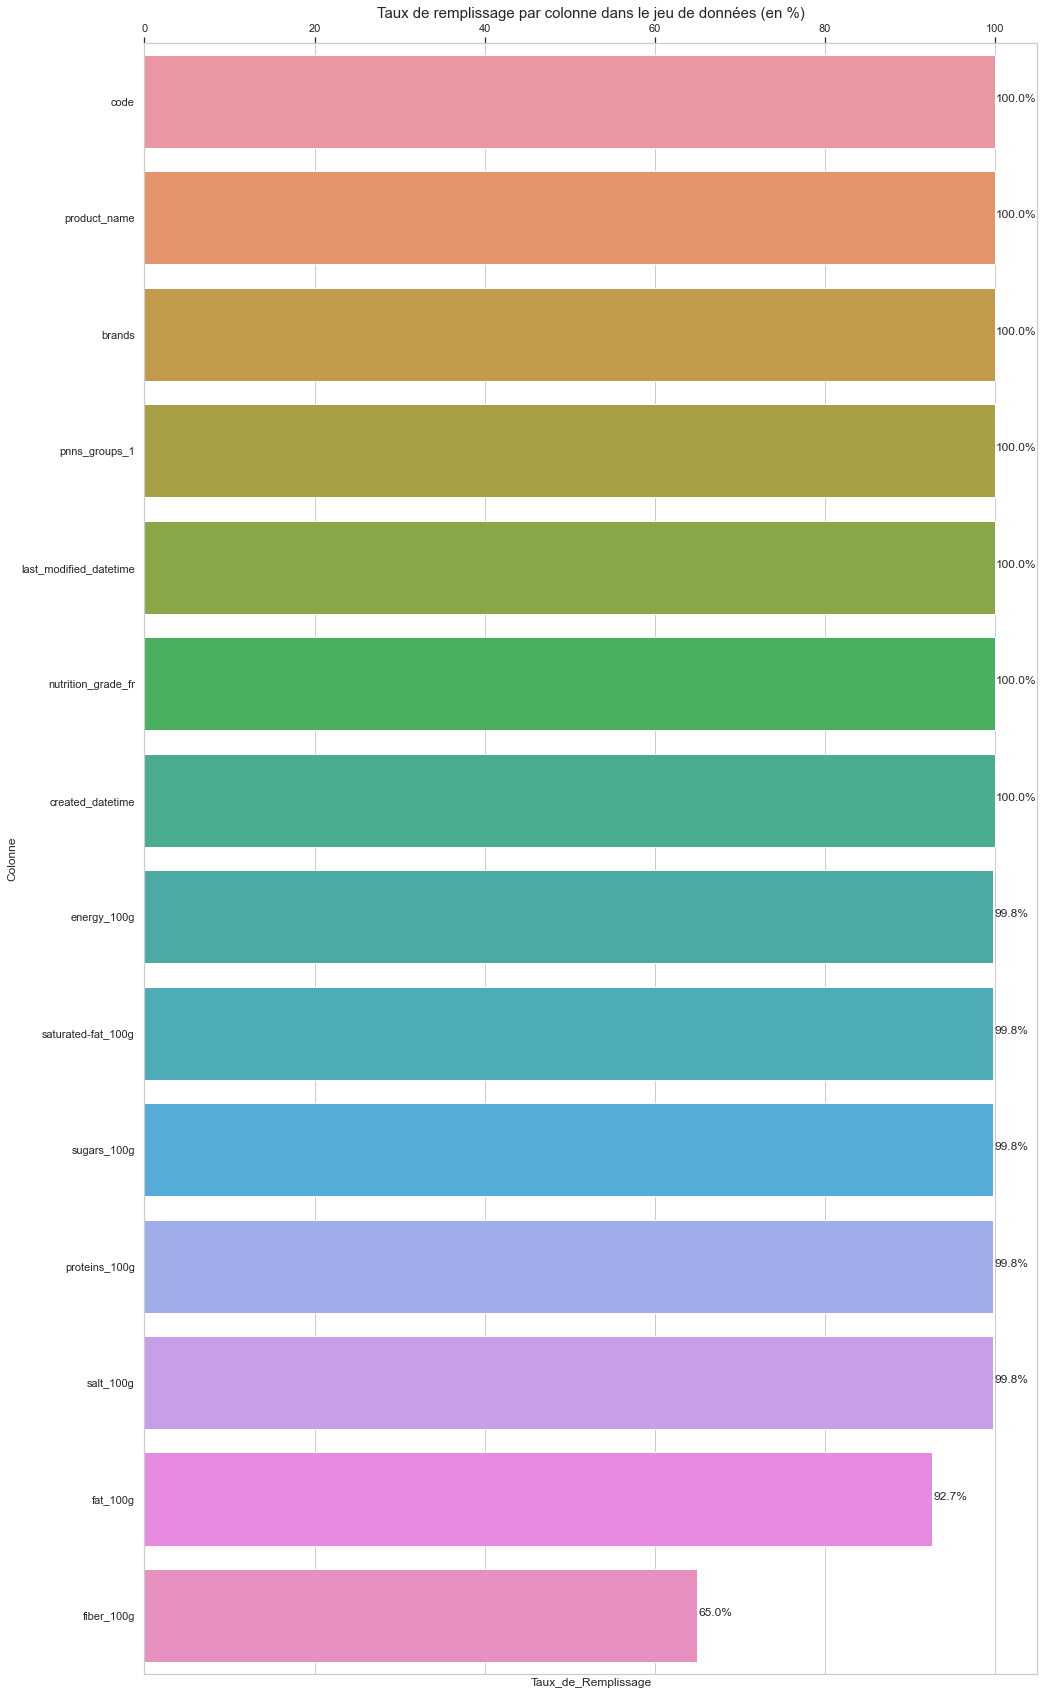

In [ ]:
Taux_de_Remplissage(df_filtred, show_threshold_bar=False)

In [ ]:
df = df_filtred.copy()

In [ ]:
df.head()

code           product_name       brands          created_datetime  \
0     36252         Lion Peanut x2     Sunridge 2015-01-25 21:35:01+00:00   
1  40608754  Pepsi, Nouveau goût !        Pepsi 2012-08-15 09:48:28+00:00   
2  87177756                    7Up  7Up,Pepsico 2015-06-06 10:28:06+00:00   
3        10      Madeleines nature        Bijou 2016-10-20 07:19:01+00:00   
4        30          Cakes Raisins        Bijou 2016-12-15 22:15:44+00:00   

   pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
0        unknown 2017-03-09 10:34:27+00:00       1883.0      20.0   
1      beverages 2015-08-09 17:35:31+00:00        177.0       0.0   
2      beverages 2015-06-06 11:13:26+00:00        177.0       0.0   
3  sugary snacks 2016-10-20 09:14:39+00:00       1900.0      23.0   
4  sugary snacks 2016-12-15 22:24:04+00:00       1768.0      19.0   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                12.5         57.5         2.5            2.5    0.09652   
1                 0.0         10.4         0.0            0.0    0.02540   
2                 0.0         10.4         NaN            0.0    0.10000   
3                 2.5         26.0         1.5            6.0    0.66000   
4                 2.5         28.0         1.8            5.8    0.65000   

  nutrition_grade_fr  
0                  e  
1                  e  
2                  e  
3                  d  
4                  d

## **Etape 2: identifier et traiter les valeurs aberrantes:** 

### 1. **features numériques pour 100g :**

1. 1. **Afficher les statistiques:**

In [ ]:
# Affichage les statistiques du dataframe:
df.describe()

energy_100g      fat_100g  saturated-fat_100g   sugars_100g  \
count  4.595600e+04  42658.000000        45956.000000  45956.000000   
mean   1.175108e+03     13.292284            5.277705     12.852928   
std    1.520562e+04     16.785260            8.173503     18.522330   
min    0.000000e+00      0.000000            0.000000     -0.100000   
25%    4.170000e+02      1.400000            0.300000      1.000000   
50%    1.012000e+03      6.900000            1.900000      3.900000   
75%    1.642000e+03     21.000000            7.200000     16.000000   
max    3.251373e+06    380.000000          210.000000    104.000000   

         fiber_100g  proteins_100g     salt_100g  
count  29931.000000   45956.000000  45956.000000  
mean       2.645230       7.583812      1.015089  
std        4.064564       7.417957      3.487793  
min        0.000000       0.000000      0.000000  
25%        0.300000       1.800000      0.080000  
50%        1.700000       6.000000      0.580000  
75%        3.400000      10.700000      1.233805  
max      178.000000     100.000000    211.000000

On remarque que une colonne contient des valeurs négatives (< 0g) et d'autres contiennent des valeurs supérieures à 100g. Il faudra les supprimer par la suite.

1. 2. **Afficher la distribution des variables :**

In [ ]:
def distribution_plotbox(data, title ):
    # Selectionner toutes les variables quantitatives dans le dataframe:
    variables_qualitatives = data.select_dtypes(include='float')

    # observer la distribution des données et d'identifier les valeurs aberrantes avant leur suppression.
    variables_qualitatives.plot(kind='box', subplots=True, figsize=(30,30), layout=(8,4), title = title )
    plt.show()

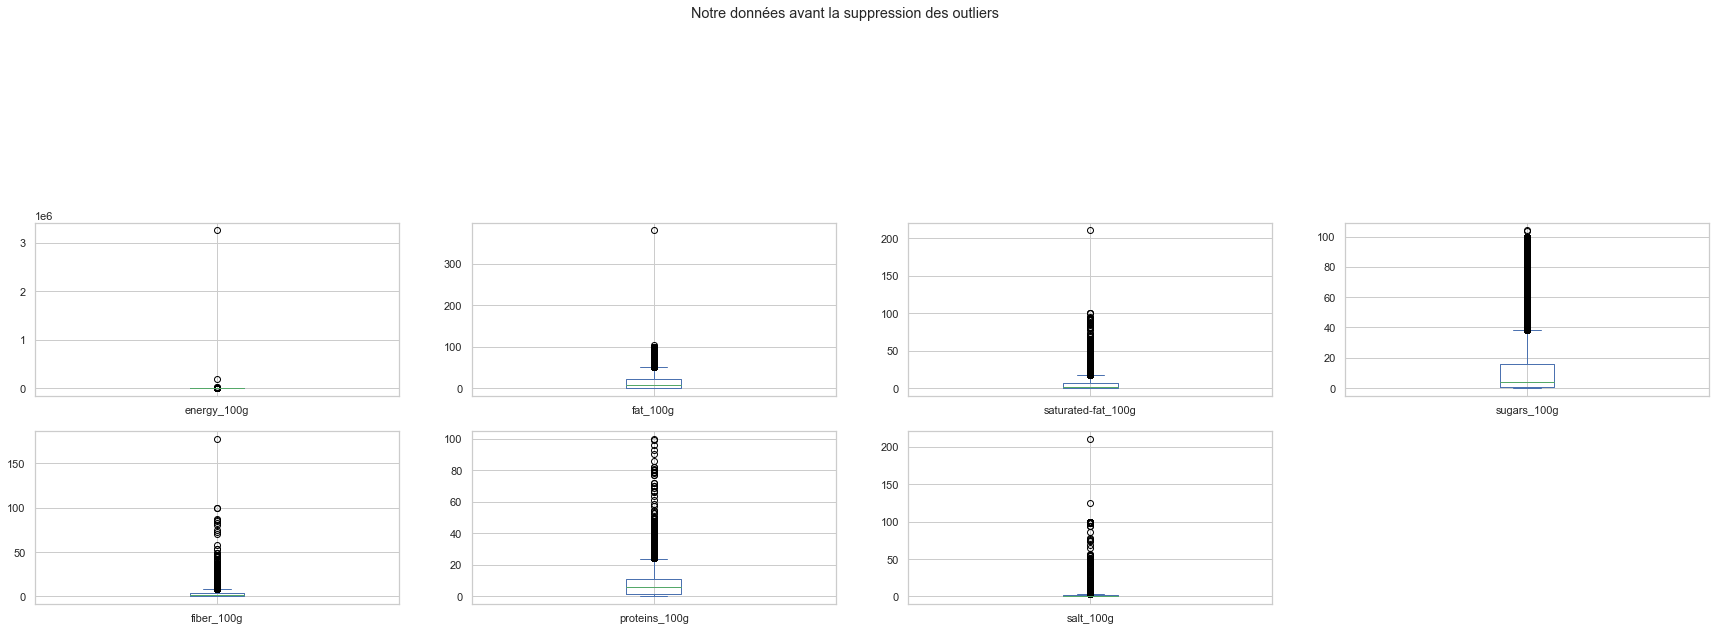

In [ ]:
distribution_plotbox(df, title='Notre données avant la suppression des outliers')

Il y a sept graphiques alignés horizontalement, chacun représentant la distribution d’une valeur nutritionnelle spécifique. Les valeurs nutritionnelles représentées sont : energy_100g, fat_100g, saturated-fat_100g, sugars_100g, fiber_100g, proteins_100g et salt_100g.

Chaque graphique affiche la médiane par une petite barre horizontale et utilise des cercles pour indiquer les valeurs aberrantes. Par exemple, le premier graphique montre que la plupart des valeurs pour energy_100g sont concentrées autour d’une valeur basse, mais il y a quelques valeurs aberrantes élevées.

Selon l’Agence Santé publique France, les valeurs des variables ‘fat_100g’, ‘saturated-fat_100g’, ‘sugars_100g’, ‘fiber_100g’, ‘proteins_100g’, ‘salt_100g’ et ‘sodium_100g’ devraient être comprises entre 0g et 100g. De plus, les valeurs de la colonne ‘energy_100g’ devraient être comprises entre 0kJ et 3700kJ. Par conséquent, toute valeur en dehors de ces plages peut être considérée comme une anomalie et devrait être supprimée.

1. 3. **Afficher la liste des variables avec des valeurs aberrantes:**

In [ ]:
# Selon la description (describe) du DataFrame df, certaines variables présentent des valeurs aberrantes (négative ou > 100g ou > 3700kj ('energy_100g')):
list_col_negative =[]
list_col_sup_100g = []
col_energy_100g_kj = ['energy_100g']

# Lister les variables avec des valeurs < 0 g:       
for col in df.select_dtypes(include=['float64', 'int64']).columns.tolist():
    if (df[col] < 0).any():
        list_col_negative.append(col)

# Lister les variables avec des valeurs > 100 g:         
for col in df.select_dtypes(include=['float64', 'int64']).columns.tolist():
    if (df[col] > 100).any():
        list_col_sup_100g.append(col) 
        
print('----------------------------------------------------------'*4)
# Affichage la liste des variables avec des valeurs négatives:    
print("liste des colonnes avec des valeurs < 0 :", list_col_negative)
display(df[df[list_col_negative[0]] < 0])
print('\n')
print('----------------------------------------------------------'*4)

# La colonne 'energy_100g' admet des valeurs > 100 dans l'intervalle [0, 3700], donc elle est exclue de la liste des colonnes >100 :
list_col_sup_100g.remove('energy_100g')
print("liste des colonnes avec des valeurs > 100 :",list_col_sup_100g)
display(df[df[list_col_sup_100g[1]] > 100]) # example dans la colonne 'saturated-fat_100g'
print('\n')
print('----------------------------------------------------------'*4)

# Confirmer que la colonne 'energy_100g' contient des valeurs > 3700kj:
if (df[col_energy_100g_kj[0]] > 3700).any():
    print('La colonne', col_energy_100g_kj[0], 'contient des valeurs > 3700kJ.')
else:
    print('La colonne', col_energy_100g_kj[0], 'ne contient pas de valeurs aberrantes.')
display(df[df[col_energy_100g_kj[0]] > 3700].head(3))

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
liste des colonnes avec des valeurs < 0 : ['sugars_100g']


code       product_name             brands  \
7765  3161712000928  Caprice des dieux  Caprice des Dieux   

              created_datetime            pnns_groups_1  \
7765 2015-04-07 21:36:52+00:00  milk and dairy products   

        last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
7765 2016-06-11 15:40:10+00:00       1379.0      30.0                21.0   

      sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
7765         -0.1         NaN           15.3        1.4                  d



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
liste des colonnes avec des valeurs > 100 : ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'salt_100g']


code                                product_name  brands  \
33961  3596710288755  mini choux goût fromage de chèvre - poivre  Auchan   

               created_datetime pnns_groups_1    last_modified_datetime  \
33961 2014-08-09 15:52:34+00:00  salty snacks 2017-04-07 21:58:05+00:00   

       energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
33961      18700.0     380.0               210.0         22.7         0.0   

       proteins_100g  salt_100g nutrition_grade_fr  
33961            0.0       9.33                  e



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
La colonne energy_100g contient des valeurs > 3700kJ.


code        product_name          brands  \
441   411015621416  extra virgin cocos      Aman prana   
1618      20233679  Halva with Almonds  Eridanous,Lidl   
2456      20842437       Lardons fumés      Saint Alby   

              created_datetime   pnns_groups_1    last_modified_datetime  \
441  2015-03-21 13:02:35+00:00  fat and sauces 2015-11-23 15:08:17+00:00   
1618 2016-04-16 12:57:31+00:00   sugary snacks 2017-04-20 07:42:28+00:00   
2456 2017-04-09 18:01:15+00:00  fish meat eggs 2017-04-19 06:22:05+00:00   

      energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
441        3768.0     100.0                92.1          0.0         0.0   
1618       9983.0      36.8                 7.8         32.0         NaN   
2456       4356.0      20.0                 6.6          0.7         NaN   

      proteins_100g  salt_100g nutrition_grade_fr  
441             0.0        0.0                  d  
1618           12.9        0.0                  e  
2456           17.0        2.8                  e

Les produits ne peuvent pas avoir plus de 100g si l'on additionne les différentes caractéristiques ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

In [ ]:
# Création de la colonne 'Totale_nutrition':
df['Totale_nutrition'] = df['fat_100g'] + df['saturated-fat_100g'] + df['sugars_100g'] + df['fiber_100g'] + df['proteins_100g'] + df['salt_100g']
df.loc[df.Totale_nutrition > 100,:].head()

code                                  product_name  \
25    9800895250                                       Nutella   
134  34000114702                                Reese's Pieces   
140  34000447428  Reese's Peanut Butter Cups Miniatures, 40 Oz   
141  34000448609                 Peanut Butter Cups Miniatures   
143  34000473038          Milk Chocolate Reese's Peanut Butter   

              brands          created_datetime  pnns_groups_1  \
25   Nutella,Ferrero 2013-07-13 17:53:16+00:00        unknown   
134    Reese,Reese's 2015-07-30 17:18:41+00:00  sugary snacks   
140          Reese s 2017-04-17 14:51:22+00:00        unknown   
141          Reese's 2014-06-30 14:39:04+00:00  sugary snacks   
143          Reese's 2016-03-03 19:29:12+00:00  sugary snacks   

       last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
25  2017-03-09 14:42:01+00:00       2260.0     32.40               10.80   
134 2017-03-15 09:42:05+00:00       2090.0     22.50               20.00   
140 2017-04-17 14:51:24+00:00        920.0     29.54               11.36   
141 2015-12-15 19:55:17+00:00       2090.0     29.50               11.40   
143 2017-03-29 13:12:43+00:00       2090.0     29.40                8.82   

     sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  \
25         56.80        2.70           5.41      0.103                  e   
134        52.50        5.00          12.50      0.349                  e   
140        52.27        2.27           9.09      0.290                  e   
141        52.30        2.27           9.09      0.750                  e   
143        47.10        2.94          11.80      1.010                  e   

     Totale_nutrition  
25            108.213  
134           112.849  
140           104.820  
141           105.310  
143           101.070

2. **Suppression des valeurs aberrantes:**

Nous allons supprimer toutes les valeurs aberrantes de la liste des colonnes ayant des valeurs < 0 et > 100. Pour la colonne 'energy_100g', nous veillerons à ce que les valeurs soient < 3700.

2. 1. **Suppression des valeurs négatives:**

In [ ]:
# Supprimer les valeurs négatives :
for col in list_col_negative:
    df.drop(df[df[col] < 0].index, inplace=True)
    # df = df[(df[col] >= 0) | df[col].isna()]

2. 2. **Suppression des valeurs > 100g:**

In [ ]:
# Supprimer les valeurs > 100
for col in list_col_sup_100g:
    df.drop(df[df[col] > 100].index, inplace=True)
    # df = df[(df[col] <= 100) | df[col].isna()]

2. 3. **Suppression des valeurs > 3700kj pour la colonne energy_100g:**

In [ ]:
# Pour la colonne 'energy_100g', supprimer les valeurs > 3700
df.drop(df[df[col_energy_100g_kj[0]] > 3700].index, inplace=True)
# df = df[(df['energy_100g'] <= 3700) | df['energy_100g'].isna()]

2. 4. **Suppression des valeurs avec Totale_nutrition > 100g**:

In [ ]:
df.drop(df[df.Totale_nutrition > 100].index, inplace=True)
df.drop('Totale_nutrition', axis=1, inplace=True)# Supression de la colonne 'Totale_nutrition'

3. **Vérification:**

3. 1. **Afficher les statistiques:**

In [ ]:
# Affichage les statistiques du dataframe:
df.describe()

energy_100g      fat_100g  saturated-fat_100g   sugars_100g  \
count  44383.000000  41120.000000        44383.000000  44383.000000   
mean    1047.217682     12.008131            4.701192     12.154168   
std      727.078491     14.902918            7.161231     17.970258   
min        0.000000      0.000000            0.000000      0.000000   
25%      402.500000      1.200000            0.300000      1.000000   
50%      970.000000      6.200000            1.700000      3.700000   
75%     1587.000000     19.000000            6.200000     14.500000   
max     3700.000000    100.000000          100.000000    100.000000   

         fiber_100g  proteins_100g     salt_100g  
count  28378.000000   44383.000000  44383.000000  
mean       2.547956       7.615982      1.029807  
std        3.872329       7.461263      3.335433  
min        0.000000       0.000000      0.000000  
25%        0.300000       1.700000      0.080010  
50%        1.600000       6.000000      0.600000  
75%        3.300000      11.000000      1.270000  
max      100.000000     100.000000    100.000000

On remarque qu’il ne reste plus de valeurs aberrantes.

3. 2. **Afficher la distribution des variables :**

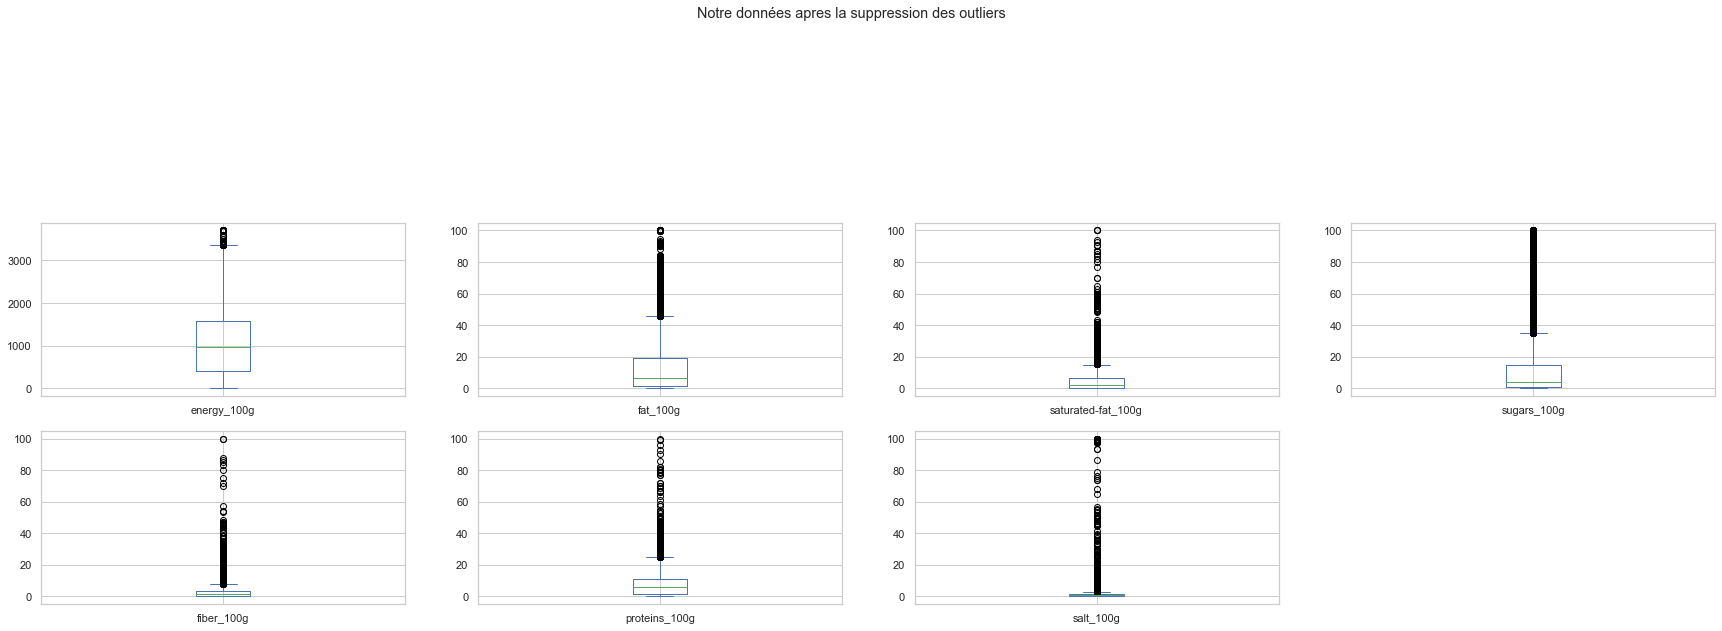

In [ ]:
distribution_plotbox(df, title='Notre données apres la suppression des outliers')

On remarque qu’après avoir supprimé les valeurs aberrantes, la distribution des variables s’est améliorée. Cependant, certaines variables comme fiber_100g, salt_100g et saturated-fat_100g présentent encore de nombreuses valeurs extrêmes. Il serait intéressant de voir si l’application de la méthode interquartile pourrait aider à gérer ces valeurs extrêmes et à améliorer davantage la distribution des données.

In [ ]:
show_data(df)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 44459 lignes et 14 colonnes dans notre dataset.


2. Affichage de la dataframe:


code           product_name    brands          created_datetime  \
0     36252         Lion Peanut x2  Sunridge 2015-01-25 21:35:01+00:00   
1  40608754  Pepsi, Nouveau goût !     Pepsi 2012-08-15 09:48:28+00:00   

  pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
0       unknown 2017-03-09 10:34:27+00:00       1883.0      20.0   
1     beverages 2015-08-09 17:35:31+00:00        177.0       0.0   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                12.5         57.5         2.5            2.5    0.09652   
1                 0.0         10.4         0.0            0.0    0.02540   

  nutrition_grade_fr  
0                  e  
1                  e

### 2. **Identification de la méthode interquartile pour les valeurs extrêmes:** 

#### 2. 1. **Afficher la distribution des colonnes numériques:**

In [ ]:
def distribution_histplot(df, kde=False, show_skeness_kurtosis= False):
    columns_numeric = list(df.select_dtypes(include=['float', 'int']).columns)
    # Définir la taille totale du tableau
    fig, axes = plt.subplots(nrows=(len(df.select_dtypes(include=['float', 'int']).columns)), ncols=1, figsize=(15, 25))

    # Aplatir la grille des sous-graphiques pour la boucle
    axes = axes.flatten()

    colors = sns.color_palette("viridis", n_colors=len(columns_numeric))

    # Afficher les distributions séparément
    for i, column in enumerate(columns_numeric):
        sns.histplot(df[column], kde=kde, stat='count', ax=axes[i], color=colors[i])
        
        # Obtenir le compte de chaque valeur unique dans la colonne
        value_counts = df[column].value_counts()

        # Calculer la moyenne et la médiane
        mean_value = df[column].mean()
        median_value = df[column].median()
        skew_value = round(skew(df[column]),3)
        kurtosis_value = round(kurtosis(df[column]),3)
        
        if show_skeness_kurtosis:
            axes[i].set_title(f'Distribution de {column} - skeness: {skew_value} - kurtosis: {kurtosis_value}' )
        else:
            axes[i].set_title(f'Distribution de {column}' ) 
            
        axes[i].set_xlabel('Valeurs')
        axes[i].set_ylabel('Nombre d\'occurrences')
        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne ({mean_value:.2f})')
        axes[i].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Médiane ({median_value:.2f})')
        axes[i].legend()

    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()

    # Afficher le tableau de sous-graphiques
    plt.show()


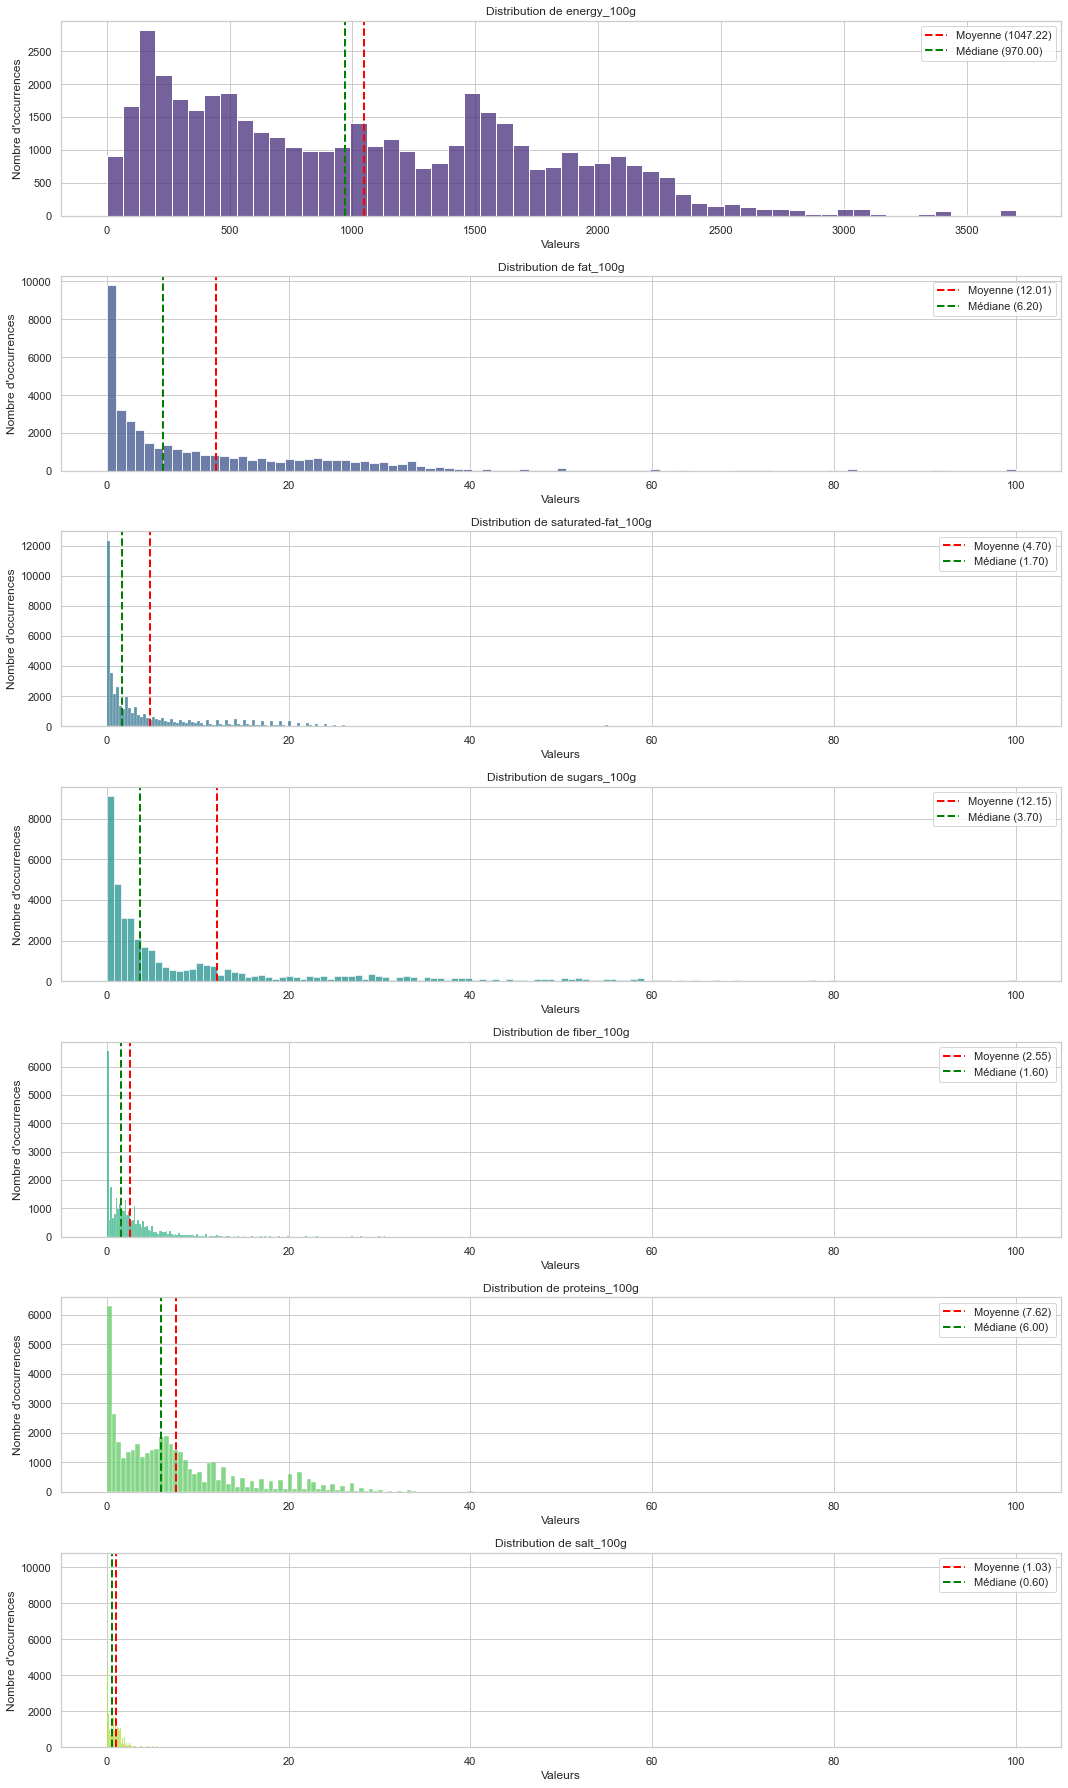

In [ ]:
distribution_histplot(df)

D’après la visualisation des distributions, on observe que la moyenne est supérieure à la médiane pour chaque variable. Par conséquent, nous avons une distribution asymétrique positive (skewness). Cela signifie que la queue de la distribution s’étend davantage vers les valeurs élevées (à droite) et que quelques valeurs extrêmes peuvent tirer la moyenne vers le haut.

#### 2. 2. **Calcule des quartiles:**

Voici les deux bornes du calcul des quartiles :

Borne inférieure : Q1 - 1.5 x écart interquartile.

Borne supérieure : Q3 + 1.5 x écart interquartile.

Nous allons enrichir le DataFrame généré par la fonction describe en y ajoutant les calculs des quartiles:

In [ ]:
describe_quartile = df.describe()
describe_quartile

energy_100g      fat_100g  saturated-fat_100g   sugars_100g  \
count  44383.000000  41120.000000        44383.000000  44383.000000   
mean    1047.217682     12.008131            4.701192     12.154168   
std      727.078491     14.902918            7.161231     17.970258   
min        0.000000      0.000000            0.000000      0.000000   
25%      402.500000      1.200000            0.300000      1.000000   
50%      970.000000      6.200000            1.700000      3.700000   
75%     1587.000000     19.000000            6.200000     14.500000   
max     3700.000000    100.000000          100.000000    100.000000   

         fiber_100g  proteins_100g     salt_100g  
count  28378.000000   44383.000000  44383.000000  
mean       2.547956       7.615982      1.029807  
std        3.872329       7.461263      3.335433  
min        0.000000       0.000000      0.000000  
25%        0.300000       1.700000      0.080010  
50%        1.600000       6.000000      0.600000  
75%        3.300000      11.000000      1.270000  
max      100.000000     100.000000    100.000000

In [ ]:
# Le quantile Q1 est à 25% de chaque variable
describe_quartile.loc['Q1',:] = describe_quartile.loc['25%',:]
# Le quantile Q3 est à 75% de chaque variable
describe_quartile.loc['Q3',:] = describe_quartile.loc['75%',:]
# Calcule de la borne inférieur
describe_quartile.loc['Borne_inferieure',:] = describe_quartile.loc['Q1',:] - (1.5 * (describe_quartile.loc['Q3',:] - describe_quartile.loc['Q1',:] ))
# Calcule de la borne supérieur 
describe_quartile.loc['Borne_superieure',:] = describe_quartile.loc['Q3',:] + (1.5 * (describe_quartile.loc['Q3',:] - describe_quartile.loc['Q1',:] ))
describe_quartile

energy_100g      fat_100g  saturated-fat_100g  \
count             44383.000000  41120.000000        44383.000000   
mean               1047.217682     12.008131            4.701192   
std                 727.078491     14.902918            7.161231   
min                   0.000000      0.000000            0.000000   
25%                 402.500000      1.200000            0.300000   
50%                 970.000000      6.200000            1.700000   
75%                1587.000000     19.000000            6.200000   
max                3700.000000    100.000000          100.000000   
Q1                  402.500000      1.200000            0.300000   
Q3                 1587.000000     19.000000            6.200000   
Borne_inferieure  -1374.250000    -25.500000           -8.550000   
Borne_superieure   3363.750000     45.700000           15.050000   

                   sugars_100g    fiber_100g  proteins_100g     salt_100g  
count             44383.000000  28378.000000   44383.000000  44383.000000  
mean                 12.154168      2.547956       7.615982      1.029807  
std                  17.970258      3.872329       7.461263      3.335433  
min                   0.000000      0.000000       0.000000      0.000000  
25%                   1.000000      0.300000       1.700000      0.080010  
50%                   3.700000      1.600000       6.000000      0.600000  
75%                  14.500000      3.300000      11.000000      1.270000  
max                 100.000000    100.000000     100.000000    100.000000  
Q1                    1.000000      0.300000       1.700000      0.080010  
Q3                   14.500000      3.300000      11.000000      1.270000  
Borne_inferieure    -19.250000     -4.200000     -12.250000     -1.704975  
Borne_superieure     34.750000      7.800000      24.950000      3.054985

Nous remarquons que les valeurs de la borne inférieure sont inférieures à 0, alors que le minimum (min) est de 0 pour toutes les colonnes. Par conséquent, cette ligne n'est pas nécessaire pour notre analyse et peut être supprimée.

Pour la borne supérieure, un nombre considérable de produits dépassent cette limite. Nous pouvons compter le nombre de produits situés au-dessus de la borne supérieure interquartile pour chaque colonne.

In [ ]:
# Suppression de la ligne 'Borne_inferieure'
describe_quartile = describe_quartile.drop('Borne_inferieure', axis = 0)

In [ ]:
# Calculer le nombre de produits au-dessus de la borne supérieure interquartile pour chaque colonne
for col in describe_quartile.columns.tolist():
    describe_quartile.loc['Nb_produits_sup_Borne_superieure', col] = len(df[df[col] > describe_quartile.loc['Borne_superieure', col]])

In [ ]:
describe_quartile

energy_100g      fat_100g  \
count                             44383.000000  41120.000000   
mean                               1047.217682     12.008131   
std                                 727.078491     14.902918   
min                                   0.000000      0.000000   
25%                                 402.500000      1.200000   
50%                                 970.000000      6.200000   
75%                                1587.000000     19.000000   
max                                3700.000000    100.000000   
Q1                                  402.500000      1.200000   
Q3                                 1587.000000     19.000000   
Borne_superieure                   3363.750000     45.700000   
Nb_produits_sup_Borne_superieure    180.000000   1439.000000   

                                  saturated-fat_100g   sugars_100g  \
count                                   44383.000000  44383.000000   
mean                                        4.701192     12.154168   
std                                         7.161231     17.970258   
min                                         0.000000      0.000000   
25%                                         0.300000      1.000000   
50%                                         1.700000      3.700000   
75%                                         6.200000     14.500000   
max                                       100.000000    100.000000   
Q1                                          0.300000      1.000000   
Q3                                          6.200000     14.500000   
Borne_superieure                           15.050000     34.750000   
Nb_produits_sup_Borne_superieure         3976.000000   5003.000000   

                                    fiber_100g  proteins_100g     salt_100g  
count                             28378.000000   44383.000000  44383.000000  
mean                                  2.547956       7.615982      1.029807  
std                                   3.872329       7.461263      3.335433  
min                                   0.000000       0.000000      0.000000  
25%                                   0.300000       1.700000      0.080010  
50%                                   1.600000       6.000000      0.600000  
75%                                   3.300000      11.000000      1.270000  
max                                 100.000000     100.000000    100.000000  
Q1                                    0.300000       1.700000      0.080010  
Q3                                    3.300000      11.000000      1.270000  
Borne_superieure                      7.800000      24.950000      3.054985  
Nb_produits_sup_Borne_superieure   1569.000000    1540.000000   1896.000000

In [ ]:
# Observer les valeurs extrêmes de chaque variable:
for col in describe_quartile.columns.tolist():
    print('----------------------')
    print(col, ':')
    print('----------------------')
    display(df.loc[df[col] > describe_quartile.loc['Borne_superieure', col],:].sort_values(col,ascending=False).head())
    print('---------------------------'*5)

----------------------
energy_100g :
----------------------


code                      product_name  \
44453  8437010060472         Oli d'Olivier verge extra   
20433  3265472406003                Huile de tournesol   
20424  3265472324000                            Sésame   
26797  3410280010311                Huile de tournesol   
20422  3265472176005  Omega 3 et 6 (offre saisonnière)   

                       brands          created_datetime   pnns_groups_1  \
44453                   Almas 2016-04-12 08:15:57+00:00  fat and sauces   
20433      Sans marque,Huilor 2016-03-03 16:33:42+00:00  fat and sauces   
20424                 Lesieur 2016-09-27 17:48:45+00:00  fat and sauces   
26797  Top Budget,Intermarché 2016-04-26 18:48:34+00:00  fat and sauces   
20422              Fruit d'Or 2015-11-07 16:34:37+00:00  fat and sauces   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
44453 2016-04-12 09:58:47+00:00       3700.0     100.0                16.0   
20433 2016-08-28 08:39:04+00:00       3700.0     100.0                11.0   
20424 2016-10-23 17:47:06+00:00       3700.0     100.0                15.0   
26797 2016-12-02 10:55:44+00:00       3700.0     100.0                12.0   
20422 2016-01-02 18:00:23+00:00       3700.0     100.0                10.0   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
44453          0.0         NaN            0.0       0.00                  d  
20433          0.0         NaN            0.0       0.00                  d  
20424          0.0         NaN            0.0       0.00                  d  
26797          0.5         NaN            0.5       0.01                  d  
20422          0.0         NaN            0.0       0.00                  d

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
fat_100g :
----------------------


code                                  product_name  \
20447  3265475213004             Duo Saveur d'Ail, Tomate & Persil   
14002  3250391650132            L'exceptionnelle huile de noisette   
18247  3259810033037                                 huile d'olive   
14103  3250391781805                                Huile de colza   
18246  3259810012605  Huile d'olive vierge extra (format familial)   

                                      brands          created_datetime  \
20447                                Lesieur 2016-07-14 13:01:57+00:00   
14002  Bouton d'or,Les créations,Intermarché 2016-10-29 15:34:19+00:00   
18247                                 Soléou 2013-02-09 21:18:08+00:00   
14103                            bouton d'or 2014-08-19 17:07:12+00:00   
18246                                 Soléou 2015-07-18 14:12:13+00:00   

        pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
20447  fat and sauces 2016-07-15 06:16:19+00:00       3700.0     100.0   
14002  fat and sauces 2016-10-29 15:39:36+00:00       3700.0     100.0   
18247  fat and sauces 2015-11-25 17:40:43+00:00       3700.0     100.0   
14103  fat and sauces 2015-02-14 17:54:14+00:00       3700.0     100.0   
18246  fat and sauces 2015-11-15 10:24:25+00:00       3700.0     100.0   

       saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
20447                13.0          0.0         NaN            0.0    0.00000   
14002                 9.4          0.5         NaN            0.5    0.01000   
18247                13.8          0.0         NaN            0.0    0.00000   
14103                 7.0          0.5         NaN            0.5    0.01016   
18246                13.8          0.0         NaN            0.0    0.00000   

      nutrition_grade_fr  
20447                  d  
14002                  c  
18247                  d  
14103                  c  
18246                  d

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
saturated-fat_100g :
----------------------


code                                  product_name  \
39985  5158418187631                  Végétaline (offre familiale)   
2675        26008028                                      Jog'Frit   
1079        20022082                             Frites & Fritures   
39066  4260168150764                                 Huile de coco   
23300  3291960013040  Huile de noix de coco biologique goût neutre   

           brands          created_datetime   pnns_groups_1  \
39985  Végétaline 2015-03-21 08:28:10+00:00  fat and sauces   
2675     Jog'Frit 2015-05-30 13:55:56+00:00  fat and sauces   
1079    Vita d'Or 2016-12-22 14:07:01+00:00  fat and sauces   
39066      Danlee 2017-04-13 19:53:38+00:00  fat and sauces   
23300  Émile noël 2016-04-17 11:59:40+00:00  fat and sauces   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
39985 2015-11-16 06:29:34+00:00       3700.0     100.0               100.0   
2675  2015-05-30 20:12:26+00:00       3700.0     100.0               100.0   
1079  2017-03-14 13:27:42+00:00       3700.0     100.0               100.0   
39066 2017-04-14 06:23:05+00:00       3590.0     100.0                93.8   
23300 2016-05-15 14:19:03+00:00       3700.0     100.0                93.0   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
39985          0.0         NaN            0.0        0.0                  d  
2675           0.0         NaN            0.0        0.0                  e  
1079           0.0         NaN            0.0        0.0                  e  
39066          0.0         NaN            0.0        0.0                  e  
23300          0.0         NaN            0.0        0.0                  d

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
sugars_100g :
----------------------


code                  product_name              brands  \
29626  3560070339587  Sucre en morceaux N°4 - 1 kg  Carrefour Discount   
7859   3165430640008               Sucre en poudre               Daddy   
35209  3596710432547             Sucre en morceaux              Auchan   
7869   3165433730003    Sucre extra fin à patisser      Daddy,CritalCo   
7868   3165433720004          Cassonade Pure Canne               Daddy   

               created_datetime  pnns_groups_1    last_modified_datetime  \
29626 2012-11-26 10:22:08+00:00  sugary snacks 2017-04-01 07:48:56+00:00   
7859  2015-08-20 11:42:05+00:00  sugary snacks 2017-02-26 11:47:46+00:00   
35209 2016-08-24 13:37:34+00:00  sugary snacks 2017-01-24 14:17:55+00:00   
7869  2013-10-03 14:36:39+00:00  sugary snacks 2016-12-23 11:59:44+00:00   
7868  2012-12-17 17:49:03+00:00  sugary snacks 2017-02-27 09:08:40+00:00   

       energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
29626       1674.0       NaN                 0.0        100.0         0.0   
7859        1674.0       NaN                 0.0        100.0         0.0   
35209       1698.0       0.0                 0.0        100.0         NaN   
7869        1674.0       0.0                 0.0        100.0         NaN   
7868        1674.0       0.0                 0.0        100.0         0.0   

       proteins_100g  salt_100g nutrition_grade_fr  
29626            0.0        0.0                  d  
7859             0.0        0.0                  d  
35209            0.0        0.0                  d  
7869             0.0        0.0                  d  
7868             0.0        0.0                  d

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
fiber_100g :
----------------------


code                                       product_name  \
544     883929140886  Harry Potter & The Deathly Hallows Radcliffe /...   
33616  3590670000174                                        Noix sèches   
36969  3760020504717                                     Konjac Cuisine   
36936  3760020501518                                          Agar-agar   
26206  3380380057649                                            Mix'Gom   

                   brands          created_datetime   pnns_groups_1  \
544               Harry's 2017-03-24 19:23:33+00:00         unknown   
33616            Pepinoix 2017-04-17 15:10:20+00:00         unknown   
36969  Karéléa,Léa Nature 2016-03-31 17:42:36+00:00         unknown   
36936  Karéléa,Léa Nature 2015-04-26 09:42:33+00:00  fish meat eggs   
26206  Ma vie sans gluten 2017-02-14 15:08:56+00:00         unknown   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
544   2017-04-07 13:46:29+00:00          4.0       NaN                0.00   
33616 2017-04-17 15:10:22+00:00          0.0      0.00                0.00   
36969 2017-03-15 08:45:49+00:00        804.0      0.25                0.00   
36936 2017-03-14 08:33:47+00:00        177.0      0.00                0.00   
26206 2017-03-02 15:52:48+00:00         54.0       NaN                0.13   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
544            0.0       100.0         100.00     0.0000                  a  
33616          0.0       100.0           0.00     0.0000                  a  
36969          0.0        87.5           0.75     0.1270                  a  
36936          0.0        86.2           0.60     0.0381                  a  
26206          0.0        85.2           1.80     0.6250                  a

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
proteins_100g :
----------------------


code                                       product_name  \
544     883929140886  Harry Potter & The Deathly Hallows Radcliffe /...   
23081  3286011051744  Lingettes pocket pour visage et mains, biodégr...   
9255   3183280016354                             Le saunier de camargue   
17635  3257983765946                   Edulcorant a l'extrait de stevia   
39840  5055534303085                                Impact whey isolate   

                       brands          created_datetime pnns_groups_1  \
544                   Harry's 2017-03-24 19:23:33+00:00       unknown   
23081                 Biolane 2017-03-19 16:16:24+00:00       unknown   
9255   Le Saunier De Gamargue 2016-09-15 13:42:39+00:00       unknown   
17635                    Cora 2017-02-13 06:53:58+00:00       unknown   
39840               Myprotein 2016-09-24 11:56:15+00:00       unknown   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
544   2017-04-07 13:46:29+00:00          4.0       NaN                 0.0   
23081 2017-04-02 10:34:42+00:00       1912.0       NaN                 6.0   
9255  2017-04-06 17:51:00+00:00        243.0       NaN                36.0   
17635 2017-03-25 11:15:55+00:00       1556.0       NaN                 0.0   
39840 2016-09-24 12:01:43+00:00       1561.0       0.3                 0.3   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
544            0.0       100.0          100.0       0.00                  a  
23081          6.0         1.0           99.0       2.00                  d  
9255           0.5         0.0           96.0     100.00                  e  
17635          6.9         0.0           93.1       0.08                  b  
39840          2.5         NaN           90.0       0.50                  b

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
salt_100g :
----------------------


code               product_name                     brands  \
18569  3263850052316  Sel fin iodé - sel de mer               Leader Price   
44785  8480017457707        Sel fin de met iodé                        Dia   
14003  3250391650163        Sel fin de Guerande    Itineraires des saveurs   
33208  3564709000374        Sel fin de Guérande  Nos regions ont du talent   
34338  3596710347100                     Auchan                     Auchan   

               created_datetime pnns_groups_1    last_modified_datetime  \
18569 2014-04-27 10:54:45+00:00       unknown 2017-01-09 11:33:29+00:00   
44785 2017-03-01 13:22:43+00:00       unknown 2017-04-10 07:57:52+00:00   
14003 2015-04-05 11:28:36+00:00       unknown 2017-04-14 10:59:46+00:00   
33208 2015-03-02 21:44:33+00:00       unknown 2017-04-05 14:53:26+00:00   
34338 2015-06-11 11:06:58+00:00       unknown 2017-02-12 20:04:31+00:00   

       energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
18569          0.0       0.0                 0.0          0.0         0.0   
44785          0.0       NaN                 0.0          0.0         0.0   
14003          0.0       NaN                 0.0          0.0         0.0   
33208          0.0       0.0                 0.0          0.0         0.0   
34338          0.0       NaN                 0.0          0.0         0.0   

       proteins_100g  salt_100g nutrition_grade_fr  
18569            0.0      100.0                  c  
44785            0.0      100.0                  c  
14003            0.0      100.0                  c  
33208            0.0      100.0                  c  
34338            0.0      100.0                  c

---------------------------------------------------------------------------------------------------------------------------------------


Coclusions: Apres avoir identifier ces valeurs extremes, pour mon analyse nous décédons de les concerver dans la suite.

## **Etape 3: identifier les valeurs manquantes:**

1. **Afficher le taux de remplissage en forme de tableau:**

In [ ]:
def Taux_de_Remplissage_tableau(df):
    # Calculer le taux de remplissage dans chaque colonne
    filling_rate = (1 - df.isnull().mean()) * 100

    # Créer un nouveau DataFrame avec le taux de remplissage
    filling_info = pd.DataFrame({
        'Colonne': df.columns,
        'Taux_de_Remplissage': filling_rate
    })

    # Afficher le DataFrame avec les informations sur le taux de remplissage
    filling_info = filling_info.reset_index(drop=True).sort_values(by="Taux_de_Remplissage", ascending=False).reset_index(drop=True)
    display(filling_info)

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7              energy_100g            99.829056
8       saturated-fat_100g            99.829056
9              sugars_100g            99.829056
10           proteins_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            92.489710
13              fiber_100g            63.829596

2. **Choix de méthode de traitement:**

- **Visualisation de la distribution du dataframe 'df' avant imputation:**

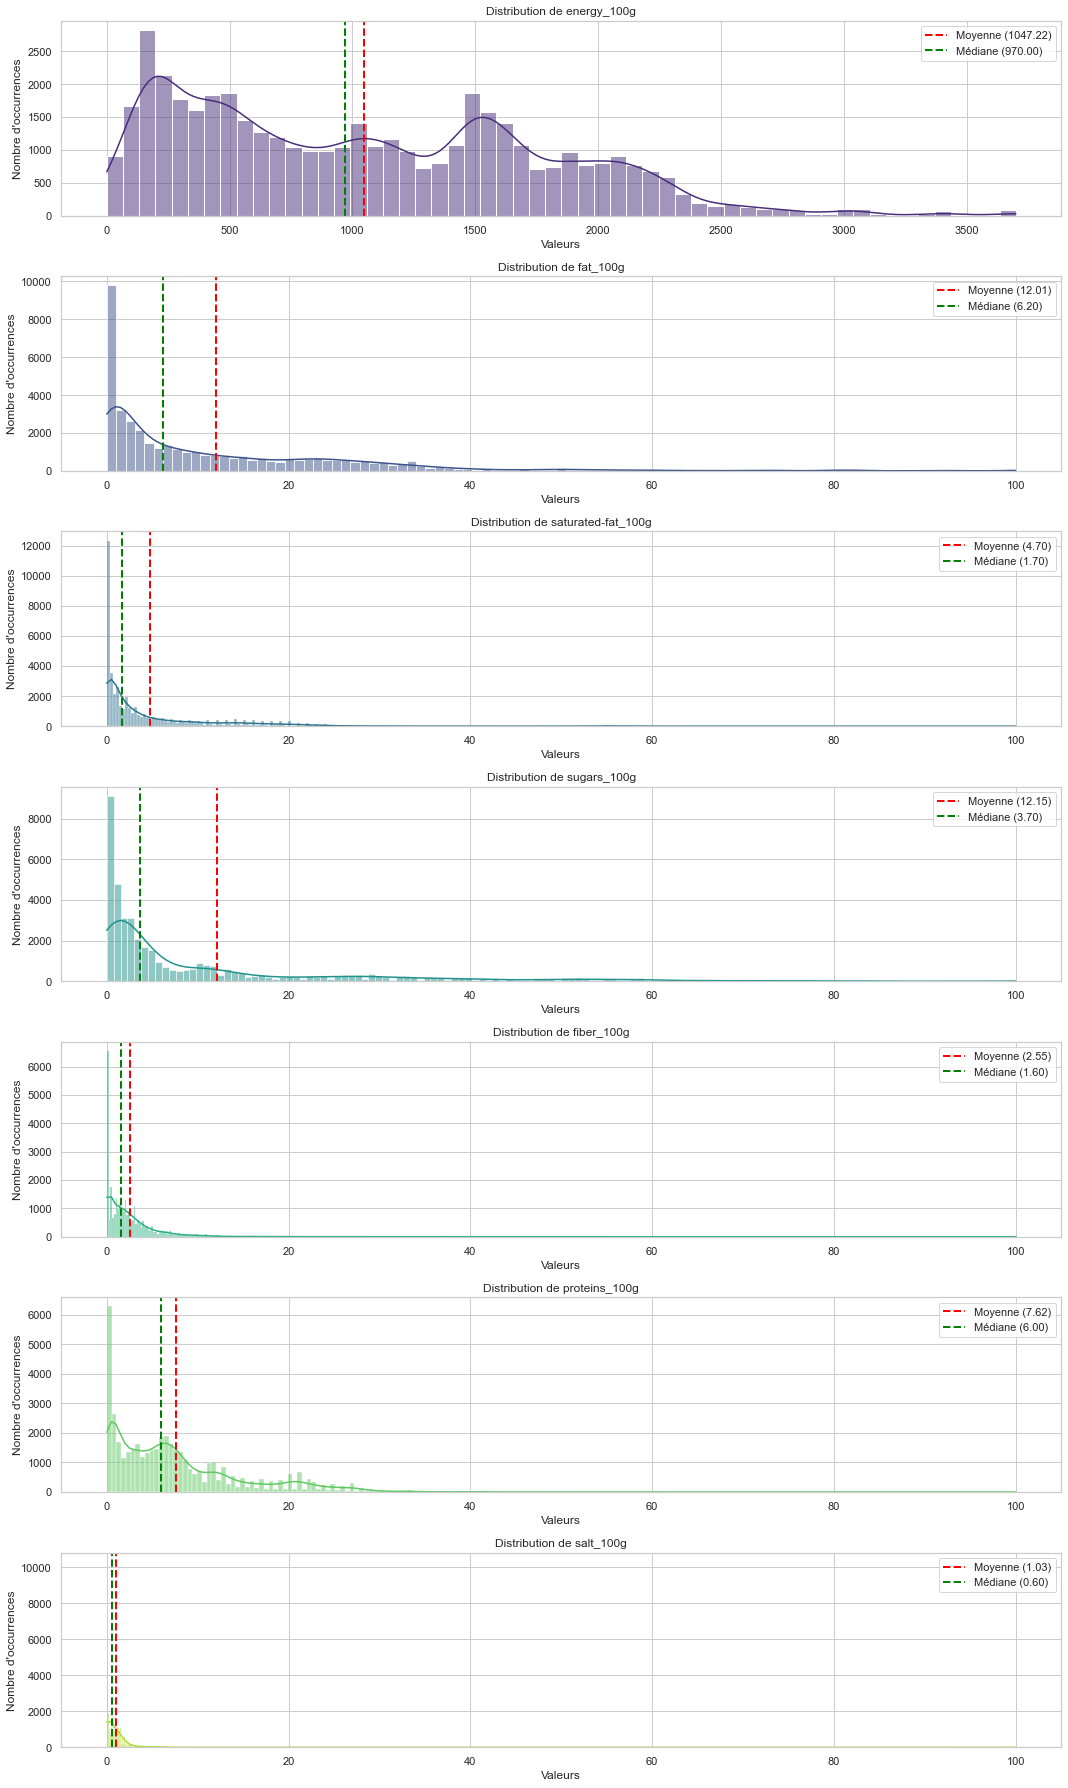

In [ ]:
distribution_histplot(df, kde=True)

2. 1. Approche métier:

Avec cette approche basée sur la connaissance métier, nous remplaçons certaines valeurs par 0 pour certaines catégories de produits. Par exemple, nous savons que les boissons ne contiennent généralement pas de fibres. Nous appliquons cette méthode pour chaque catégorie ci-dessous :

Voici la liste des catégories de la colonne pnns_groups_1:

In [ ]:
df.pnns_groups_1.value_counts().index.tolist()

['unknown',
 'sugary snacks',
 'milk and dairy products',
 'composite foods',
 'cereals and potatoes',
 'fish meat eggs',
 'beverages',
 'fruits and vegetables',
 'fat and sauces',
 'salty snacks']

- **La catégorie sugary snacks:**

Parmi les catégories du variable ‘pnns_groups_1’, la catégorie “Sugary Snacks” (collations sucrées) ne contient ni graisses, ni graisses saturées, ni fibres, ni protéines.

In [ ]:
# Extraire les produits 'Sugary Snacks'
sugary_snacks_df = df[(df['pnns_groups_1'] == 'sugary snacks')]
display(sugary_snacks_df)

code                    product_name  \
3                 10               Madeleines nature   
4                 30                   Cakes Raisins   
5                 31                Cakes aux Fruits   
6                 50          Financiers aux Amandes   
7                 51                 Fondants Citron   
...              ...                             ...   
45980       91260369                           Gâche   
45988  9310072000480                             Sao   
45994  9346758000246                          Eighty   
46027       96068779           Spearmint sans sucres   
46028       96118580  Fisherman's Friend Miel-Citron   

                                 brands          created_datetime  \
3                                 Bijou 2016-10-20 07:19:01+00:00   
4                                 Bijou 2016-12-15 22:15:44+00:00   
5                                 Bijou 2016-07-08 21:55:54+00:00   
6                                 Bijou 2016-11-30 21:30:44+00:00   
7                                 Bijou 2016-12-01 19:59:24+00:00   
...                                 ...                       ...   
45980  Brioches et viennoiseries Thomas 2016-08-10 19:14:03+00:00   
45988                          Arnott's 2017-01-30 09:29:20+00:00   
45994                        Pana Cacao 2016-05-23 12:40:09+00:00   
46027                Fisherman's Friend 2015-03-14 14:32:26+00:00   
46028                Fisherman's Friend 2016-12-22 07:02:13+00:00   

       pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
3      sugary snacks 2016-10-20 09:14:39+00:00       1900.0      23.0   
4      sugary snacks 2016-12-15 22:24:04+00:00       1768.0      19.0   
5      sugary snacks 2016-08-18 20:16:30+00:00       1670.0      15.0   
6      sugary snacks 2016-11-30 21:40:21+00:00       1868.0      23.0   
7      sugary snacks 2016-12-01 20:24:57+00:00       1896.0      24.0   
...              ...                       ...          ...       ...   
45980  sugary snacks 2016-08-10 20:53:06+00:00       1634.0      15.9   
45988  sugary snacks 2017-02-01 21:24:09+00:00       1900.0      15.1   
45994  sugary snacks 2016-05-23 17:18:40+00:00       2322.0      46.6   
46027  sugary snacks 2015-10-20 08:10:28+00:00       1017.0       1.3   
46028  sugary snacks 2016-12-24 15:49:30+00:00       1031.0       1.3   

       saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
3                    2.50        26.00       1.500          6.000      0.660   
4                    2.50        28.00       1.800          5.800      0.650   
5                    2.00        34.00       1.500          4.900      0.600   
6                   10.00        39.00       1.700          8.000      0.550   
7                   10.00        37.00       2.500          8.100      0.780   
...                   ...          ...         ...            ...        ...   
45980               11.60        16.20         NaN          8.900      0.910   
45988                7.30         1.10       3.700         10.000      1.778   
45994               28.80        21.70         NaN          7.100      0.180   
46027                1.28         0.12       0.005          0.040      0.005   
46028                1.28         0.10       1.470          0.004      0.001   

      nutrition_grade_fr  
3                      d  
4                      d  
5                      d  
6                      e  
7                      e  
...                  ...  
45980                  e  
45988                  d  
45994                  e  
46027                  c  
46028                  b  

[6525 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans les colonnes [ 'fat_100g','saturated-fat_100g','fiber_100g','proteins_100g'] pour la catégorie 'sugary snacks'
df.loc[df['pnns_groups_1'] == 'sugary snacks', ['fat_100g','saturated-fat_100g','fiber_100g','proteins_100g']] = df.loc[df['pnns_groups_1'] == 'sugary snacks',['fat_100g','saturated-fat_100g','fiber_100g','proteins_100g']].fillna(0)

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.835804
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            93.375919
13              fiber_100g            69.985830

- **La catégorie milk and dairy products (Lait et produits laitiers):**

Parmi les catégories du variable ‘pnns_groups_1’, la catégorie “milk and dairy products” (collations sucrées) ne contient pas de fibres.

In [ ]:
# Extraire les produits 'milk and dairy products'
beverages_df = df[(df['pnns_groups_1'] == 'milk and dairy products')]
display(beverages_df)

code                             product_name  \
22             78115        Mild Cheddar with Onions & Chives   
181      42272010523                Vanilla Organic Non-Dairy   
182     422720105530                 Glace au chocolat végane   
248      70272090993                               Le Gruyère   
266      73491024015                       Crème Caramel Flan   
...              ...                                      ...   
45740  8722700235811                         Magnum Pistachio   
45749  8722700452539                       Sorbet Citron Vert   
45982  9213220082188  Fruits mixés (Framboise Passion) 4 Pots   
45983  9213220501849                        fromage blanc bio   
45996  9370270797148                 Parmigiano Reggiano râpé   

                                brands          created_datetime  \
22                     Marks & Spencer 2016-09-21 19:43:50+00:00   
181                     amy's,Vitalita 2016-03-14 17:29:37+00:00   
182                      Amy's Kitchen 2015-08-02 18:56:05+00:00   
248                          Alpenhaus 2015-08-18 02:50:18+00:00   
266           Kozy Shack,General Mills 2014-04-06 17:10:35+00:00   
...                                ...                       ...   
45740                           Magnum 2012-05-19 18:30:49+00:00   
45749         Carte d'Or,Unilever,Miko 2012-09-05 06:40:11+00:00   
45982                          Sojasun 2015-02-28 19:35:27+00:00   
45983  Vrai La Laiterie familiale,Vrai 2016-08-14 11:23:16+00:00   
45996                         Monoprix 2016-09-18 11:21:30+00:00   

                 pnns_groups_1    last_modified_datetime  energy_100g  \
22     milk and dairy products 2017-04-02 14:13:23+00:00       1618.0   
181    milk and dairy products 2017-04-08 06:14:05+00:00        778.0   
182    milk and dairy products 2015-08-02 22:28:28+00:00        791.0   
248    milk and dairy products 2016-11-25 14:59:02+00:00       1640.0   
266    milk and dairy products 2017-03-15 08:42:40+00:00        594.0   
...                        ...                       ...          ...   
45740  milk and dairy products 2016-04-17 17:11:21+00:00       1360.0   
45749  milk and dairy products 2015-04-16 18:23:35+00:00        600.0   
45982  milk and dairy products 2015-06-02 17:50:45+00:00        345.0   
45983  milk and dairy products 2016-08-14 20:54:47+00:00        319.0   
45996  milk and dairy products 2016-10-03 15:29:37+00:00       1671.0   

       fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  \
22        32.90               19.70         0.40        0.80          21.70   
181       13.00               12.00        13.00        1.10           2.20   
182       13.00               12.00        13.00        2.10           2.10   
248       32.10               17.90         0.00        0.00          28.60   
266        3.54                2.21        24.78        0.00           4.42   
...         ...                 ...          ...         ...            ...   
45740     22.10               15.10        26.70        1.74           4.07   
45749      0.60                0.50        27.00         NaN           0.50   
45982      2.10                0.40        11.30         NaN           3.70   
45983      3.60                2.40         3.70         NaN           7.20   
45996     30.00               20.00         0.00         NaN          32.00   

       salt_100g nutrition_grade_fr  
22       1.53000                  d  
181      0.26000                  d  
182      0.24000                  d  
248      1.54000                  d  
266      0.22352                  c  
...          ...                ...  
45740    0.11800                  d  
45749    0.04000                  c  
45982    0.05000                  b  
45983    0.10000                  a  
45996    1.60000                  d  

[5046 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans la colonne 'fiber_100g' pour la catégorie 'milk and dairy products'
df.loc[df['pnns_groups_1'] == 'milk and dairy products', 'fiber_100g'] = df.loc[df['pnns_groups_1'] == 'milk and dairy products', 'fiber_100g'].fillna(0)

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.835804
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            93.375919
13              fiber_100g            75.894645

- **La catégorie beverages (Boissons):**

Parmi les catégories du variable ‘pnns_groups_1’, la catégorie “Boissons” ne contient ni fibres, ni graisses, ni graisses saturées. En effet, les fibres alimentaires se trouvent principalement dans les aliments solides, tels que les fruits, les légumes, les céréales complètes et les légumineuses. Les boissons, quant à elles, ne sont généralement pas une source significative de fibres, de graisses ou de graisses saturées.

In [ ]:
# Extraire les produits 'beverages'
beverages_df = df[(df['pnns_groups_1'] == 'beverages')]
display(beverages_df)


code                   product_name           brands  \
1           40608754          Pepsi, Nouveau goût !            Pepsi   
2           87177756                            7Up      7Up,Pepsico   
20             71543  Aloe Vera Grape & Apple Juice              M&S   
23             88978         Fresh Drinking Coconut  Marks & Spencer   
63       16229001919                   Lait de coco           Aroy d   
...              ...                            ...              ...   
46019  9556156040182                   Lychee Drink            Yeo's   
46020  9556156046399  Boisson au soja (soy bean 8%)            Yeo's   
46021  9556156046641           Yeo's Soy Bean Drink            Yeo's   
46025  9577283844672        100% Pur Jus 4 agrumes              Cora   
46031       99111250             Thé vert Earl grey          Lobodis   

               created_datetime pnns_groups_1    last_modified_datetime  \
1     2012-08-15 09:48:28+00:00     beverages 2015-08-09 17:35:31+00:00   
2     2015-06-06 10:28:06+00:00     beverages 2015-06-06 11:13:26+00:00   
20    2017-04-09 17:32:43+00:00     beverages 2017-04-12 17:15:42+00:00   
23    2017-03-14 18:59:00+00:00     beverages 2017-04-02 14:13:18+00:00   
63    2012-05-16 12:51:44+00:00     beverages 2017-03-25 16:39:41+00:00   
...                         ...           ...                       ...   
46019 2015-09-23 09:01:41+00:00     beverages 2015-10-25 09:12:02+00:00   
46020 2016-03-27 22:52:59+00:00     beverages 2016-10-02 10:49:04+00:00   
46021 2017-03-15 20:12:18+00:00     beverages 2017-03-19 20:48:42+00:00   
46025 2016-09-15 13:25:17+00:00     beverages 2017-02-16 16:31:20+00:00   
46031 2013-04-28 15:30:39+00:00     beverages 2013-06-20 01:09:16+00:00   

       energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
1            177.0       0.0                 0.0         10.4         0.0   
2            177.0       0.0                 0.0         10.4         NaN   
20           155.0       NaN                 0.1          8.5         0.1   
23             0.0       NaN                 0.0          0.0         0.0   
63           774.0       NaN                17.0          2.0         0.0   
...            ...       ...                 ...          ...         ...   
46019        173.0       0.0                 0.0         10.1         NaN   
46020        214.0       1.1                 0.2          7.8         0.0   
46021        222.0       NaN                 0.2          8.3         0.0   
46025        192.0       0.5                 0.0          9.2         0.6   
46031         21.0       0.2                 0.2          0.5         0.2   

       proteins_100g  salt_100g nutrition_grade_fr  
1                0.0     0.0254                  e  
2                0.0     0.1000                  e  
20               0.1     0.1000                  e  
23               0.0     0.0000                  b  
63               1.6     0.0500                  d  
...              ...        ...                ...  
46019            0.0     0.0100                  e  
46020            2.0     0.0000                  b  
46021            2.0     0.0100                  e  
46025            0.6     0.0300                  c  
46031            0.5     0.0254                  c  

[4301 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans les colonnes ['fat_100g','saturated-fat_100g','fiber_100g'] pour la catégorie 'beverages'
df.loc[df['pnns_groups_1'] == 'beverages', ['fat_100g','saturated-fat_100g','fiber_100g']] = df.loc[df['pnns_groups_1'] == 'beverages', ['fat_100g','saturated-fat_100g','fiber_100g']].fillna(0)


In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.883038
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            94.894172
13              fiber_100g            79.239299

- **La colonne fruits and vegetables (fruits et légumes):**

Parmi les catégories du variable ‘pnns_groups_1’, la catégorie “fruits and vegetables” ne contient pas de graisses saturées. En effet, les fruits et légumes sont naturellement faibles en graisses et ne contribuent pas significativement à l’apport en graisses saturées dans l’alimentation. Ils sont riches en vitamines, minéraux et fibres, ce qui en fait des choix sains pour une alimentation équilibrée.

In [ ]:
# Extraire les produits 'fruits and vegetables'
fruits_and_vegetables_df = df[(df['pnns_groups_1'] == 'fruits and vegetables')]
display(fruits_and_vegetables_df)

code                        product_name  \
17             31858        Pur Soup' Velouté de légumes   
47       14113911672                          Pistachios   
64       16229001940                  Jackfruit in syrup   
75       16229910204           Soupe Tom Yum aux légumes   
104      24000001645           Ananas en morceaux au jus   
...              ...                                 ...   
45868  8858650105963  Mangues en tranches au sirop léger   
45890  8901552012546                       Chilli Pickle   
45900  8935000901649                        Banane sèche   
45989  9310432001355                    Lychees en sirop   
45997  9501006300039                  Ananas en morceaux   

                                               brands  \
17                                             Liebig   
47                                          Wonderful   
64     Aroy-D, Thai Agri Foods Public Company Limited   
75                                             AROY-D   
104                       Del Monte,  Del Monte Foods   
...                                               ...   
45868                    Sans marque,EMC Distribution   
45890                                          Ashoka   
45900                                        Vinawang   
45989                                  Double phoenix   
45997                                        Mainstay   

               created_datetime          pnns_groups_1  \
17    2013-05-17 10:31:50+00:00  fruits and vegetables   
47    2012-05-31 16:36:29+00:00  fruits and vegetables   
64    2015-06-04 15:51:57+00:00  fruits and vegetables   
75    2016-10-26 17:37:34+00:00  fruits and vegetables   
104   2015-03-23 11:33:24+00:00  fruits and vegetables   
...                         ...                    ...   
45868 2016-10-31 12:06:33+00:00  fruits and vegetables   
45890 2017-03-25 15:50:14+00:00  fruits and vegetables   
45900 2013-02-04 20:12:57+00:00  fruits and vegetables   
45989 2014-12-26 17:12:06+00:00  fruits and vegetables   
45997 2017-02-11 10:14:07+00:00  fruits and vegetables   

         last_modified_datetime  energy_100g  fat_100g  saturated-fat_100g  \
17    2015-11-28 08:40:09+00:00        188.0      2.10                 0.7   
47    2017-03-07 19:19:36+00:00       2469.0     46.00                 5.6   
64    2017-03-09 13:28:58+00:00        389.0      0.00                 0.0   
75    2016-10-26 17:48:34+00:00        307.0      5.33                 2.0   
104   2017-03-09 12:19:55+00:00        242.0      0.00                 0.0   
...                         ...          ...       ...                 ...   
45868 2016-11-01 16:36:20+00:00        243.0      0.00                 0.0   
45890 2017-04-02 10:53:04+00:00        860.0     20.00                 5.4   
45900 2017-03-08 21:19:58+00:00       1259.0      0.00                 0.0   
45989 2016-02-02 11:12:12+00:00        310.0      1.00                 1.0   
45997 2017-02-11 12:22:24+00:00        206.0      0.00                 0.0   

       sugars_100g  fiber_100g  proteins_100g  salt_100g nutrition_grade_fr  
17            2.40         0.8           0.80      0.750                  b  
47            7.80         NaN          21.40      1.300                  c  
64           17.86         0.7           0.71      0.254                  b  
75            3.33         2.0           1.33      0.627                  b  
104          13.10         0.7           0.30      0.000                  a  
...            ...         ...            ...        ...                ...  
45868        12.00         0.6           0.00      0.000                  a  
45890         0.50         NaN           3.30      8.500                  c  
45900        41.50         0.0           5.00      0.000                  c  
45989        17.30         1.3           1.00      0.000                  a  
45997         9.70         1.9           0.60      0.010                  a  

[3106 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans la colonne 'saturated-fat_100g' pour la catégorie 'fruits and vegetables'
df.loc[df['pnns_groups_1'] == 'fruits and vegetables', 'saturated-fat_100g'] = df.loc[df['pnns_groups_1'] == 'fruits and vegetables', 'saturated-fat_100g'].fillna(0)


In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.889786
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            94.894172
13              fiber_100g            79.239299

- **La colonne 'fat and sauces' (Matières grasses et sauces):**

Parmi les catégories du variable 'pnns_groups_1', la catégorie "fat and sauces" ne contient pas de fibres. En effet, elle se compose principalement de produits tels que les sauces et les matières grasses, qui généralement ne contiennent pas ou contiennent très peu de fibres alimentaires.

In [ ]:
# Extraire les produits 'fat and sauces'
fat_and_sauces_df = df[(df['pnns_groups_1'] == 'fat and sauces')]
display(fat_and_sauces_df)

code              product_name  \
106      24000100201       Purée Tradition Bio   
113      24463061163  Sriracha Hot Chili Sauce   
171      41500000527             Honey Mustard   
172      41500007229    Classic Yellow Mustard   
173      41500053448            Classic Yellow   
...              ...                       ...   
46013  9556041611992        Pad Thaï Sauce Wok   
46014  9556041612548        Pâte de Curry Vert   
46015  9556041612555       Pâte de curry rouge   
46016  9556041612661           Sauce Pour Nems   
46017  9556041780612        Pâte de curry vert   

                                     brands          created_datetime  \
106                               Del Monte 2015-05-05 16:49:15+00:00   
113    Huy Fong foods, Huy Fong Foods  Inc. 2015-01-31 23:17:32+00:00   
171                                French s 2015-05-21 11:52:35+00:00   
172                                French's 2014-10-23 16:53:54+00:00   
173                                French's 2015-03-17 17:40:51+00:00   
...                                     ...                       ...   
46013                                  Ayam 2016-02-20 21:09:01+00:00   
46014                                  Ayam 2015-02-14 13:10:43+00:00   
46015                                  Ayam 2014-04-25 16:21:21+00:00   
46016                                  Ayam 2014-04-25 16:52:33+00:00   
46017                                  Ayam 2016-02-15 11:55:24+00:00   

        pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
106    fat and sauces 2015-05-06 08:04:40+00:00        126.0       0.1   
113    fat and sauces 2017-03-09 11:17:24+00:00          NaN       NaN   
171    fat and sauces 2017-02-07 20:22:53+00:00        653.0       NaN   
172    fat and sauces 2016-11-02 15:14:22+00:00        290.6       3.9   
173    fat and sauces 2015-08-09 17:35:53+00:00          NaN       NaN   
...               ...                       ...          ...       ...   
46013  fat and sauces 2016-02-22 14:46:03+00:00       1066.0       8.4   
46014  fat and sauces 2015-02-15 07:52:46+00:00        525.0       4.2   
46015  fat and sauces 2016-05-26 01:46:22+00:00        582.0       4.7   
46016  fat and sauces 2015-12-08 09:01:04+00:00       1075.0       0.4   
46017  fat and sauces 2016-07-14 08:54:43+00:00        547.0       4.2   

       saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
106                   0.0          5.6         1.2           1.19    1.00000   
113                   NaN          NaN         NaN            NaN        NaN   
171                   0.3         19.8         0.0           3.90    2.30000   
172                   0.8          0.9         2.7           4.20    2.79400   
173                   NaN          NaN         NaN            NaN        NaN   
...                   ...          ...         ...            ...        ...   
46013                 2.1         31.0         NaN           3.20    4.60000   
46014                 0.6         16.0         2.7           1.80    6.81736   
46015                 0.7         16.8         NaN           2.50    7.37870   
46016                 0.0         61.0         0.0           0.50    1.81610   
46017                 0.6         16.0         NaN           1.80    6.70000   

      nutrition_grade_fr  
106                    a  
113                    b  
171                    d  
172                    c  
173                    b  
...                  ...  
46013                  e  
46014                  d  
46015                  d  
46016                  e  
46017                  d  

[2464 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans la colonne 'fiber_100g' pour la catégorie 'fat and sauces'
df.loc[df['pnns_groups_1'] == 'fat and sauces', 'fiber_100g'] = df.loc[df['pnns_groups_1'] == 'fat and sauces', 'fiber_100g'].fillna(0)

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.889786
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            94.894172
13              fiber_100g            82.077869

- **La colonne salty snacks (collations salées):**

Parmi les catégories du variable 'pnns_groups_1', la catégorie "Salty Snacks" ne contient pas de fibres. En effet, les snacks salés comprennent généralement des aliments tels que les chips, les bretzels et les crackers, qui sont souvent fabriqués à partir de céréales raffinées et contiennent peu ou pas de fibres alimentaires.

In [ ]:
# Extraire les produits 'salty snacks'
salty_snacks_df = df[(df['pnns_groups_1'] == 'salty snacks')]
display(salty_snacks_df)

code                                       product_name  \
32            120623  Sweet Potato, Parsnip and Beetroot Hand Cooked...   
42       14100099680                                   Goldfish Cheddar   
43       14113230025                    Almonds Amandes grillées salées   
44       14113230117                            Amandes Grillées Salées   
45       14113911368                                  Pistachios Salées   
...              ...                                                ...   
45897  8934572400871             Nems apéritifs aux crevettes & à l'ail   
45941  9002859031328                                        Bacon Snack   
45944  9003600581444                               Connaisseurs Amandes   
45977  9108930003830                          Chips à l'ancienne Nature   
46029  9778564312457                Nature cheddar and red onion crisps   

                                  brands          created_datetime  \
32     Marks & Spencer,Marks and Spencer 2016-09-11 19:35:58+00:00   
42                       Pepperidge Farm 2015-05-30 12:43:45+00:00   
43                             Wonderful 2016-03-24 16:51:48+00:00   
44                             Wonderful 2015-07-08 18:03:25+00:00   
45                             Wonderful 2015-07-03 15:13:03+00:00   
...                                  ...                       ...   
45897                      Croq' N' Crak 2016-02-14 12:04:45+00:00   
45941                          Snackline 2015-05-25 12:35:35+00:00   
45944             Lindt,Lindt & Sprüngli 2015-02-08 13:24:05+00:00   
45977                              Lay's 2013-06-22 12:56:45+00:00   
46029                  Marks and Spencer 2017-01-23 16:57:57+00:00   

      pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
32     salty snacks 2016-09-11 21:44:40+00:00       2184.0      35.3   
42     salty snacks 2015-05-31 18:05:59+00:00       1958.0      18.1   
43     salty snacks 2016-03-24 22:03:39+00:00       2549.0      52.1   
44     salty snacks 2017-01-10 12:45:36+00:00       2577.0      52.1   
45     salty snacks 2016-01-05 22:42:24+00:00       2444.0      46.0   
...             ...                       ...          ...       ...   
45897  salty snacks 2017-02-01 20:46:47+00:00       2046.0      21.3   
45941  salty snacks 2017-03-27 13:32:21+00:00       2107.0      26.6   
45944  salty snacks 2015-07-04 20:30:01+00:00       2353.0      43.0   
45977  salty snacks 2014-09-15 16:28:48+00:00       2490.0      39.0   
46029  salty snacks 2017-04-02 15:15:34+00:00       2155.0       NaN   

       saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
32                    3.8        23.60        9.90            4.8     1.0000   
42                    3.7         1.40        2.50           11.6     1.9000   
43                    4.0         4.90         NaN           21.1     0.8000   
44                    4.0         4.90         NaN           21.0     0.8000   
45                    5.6         7.80         NaN           21.4     1.3000   
...                   ...          ...         ...            ...        ...   
45897                 0.0         7.89        2.45           12.6     2.2225   
45941                12.4         3.50         NaN            8.0     2.9000   
45944                16.0        30.00         NaN            9.1     0.0400   
45977                 4.0         0.40        4.00            6.0     1.3462   
46029                 3.4         1.80        5.60            7.8     1.3500   

      nutrition_grade_fr  
32                     d  
42                     d  
43                     d  
44                     d  
45                     d  
...                  ...  
45897                  d  
45941                  e  
45944                  e  
45977                  c  
46029                  c  

[1736 rows x 14 columns]

In [ ]:
# Remplacer les valeurs manquantes par 0 dans la colonne 'fiber_100g' pour la catégorie 'salty snacks'
df.loc[df['pnns_groups_1'] == 'salty snacks', 'fiber_100g'] = df.loc[df['pnns_groups_1'] == 'salty snacks', 'fiber_100g'].fillna(0)

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5       nutrition_grade_fr           100.000000
6         created_datetime            99.997751
7       saturated-fat_100g            99.889786
8            proteins_100g            99.835804
9              energy_100g            99.829056
10             sugars_100g            99.829056
11               salt_100g            99.829056
12                fat_100g            94.894172
13              fiber_100g            83.256484

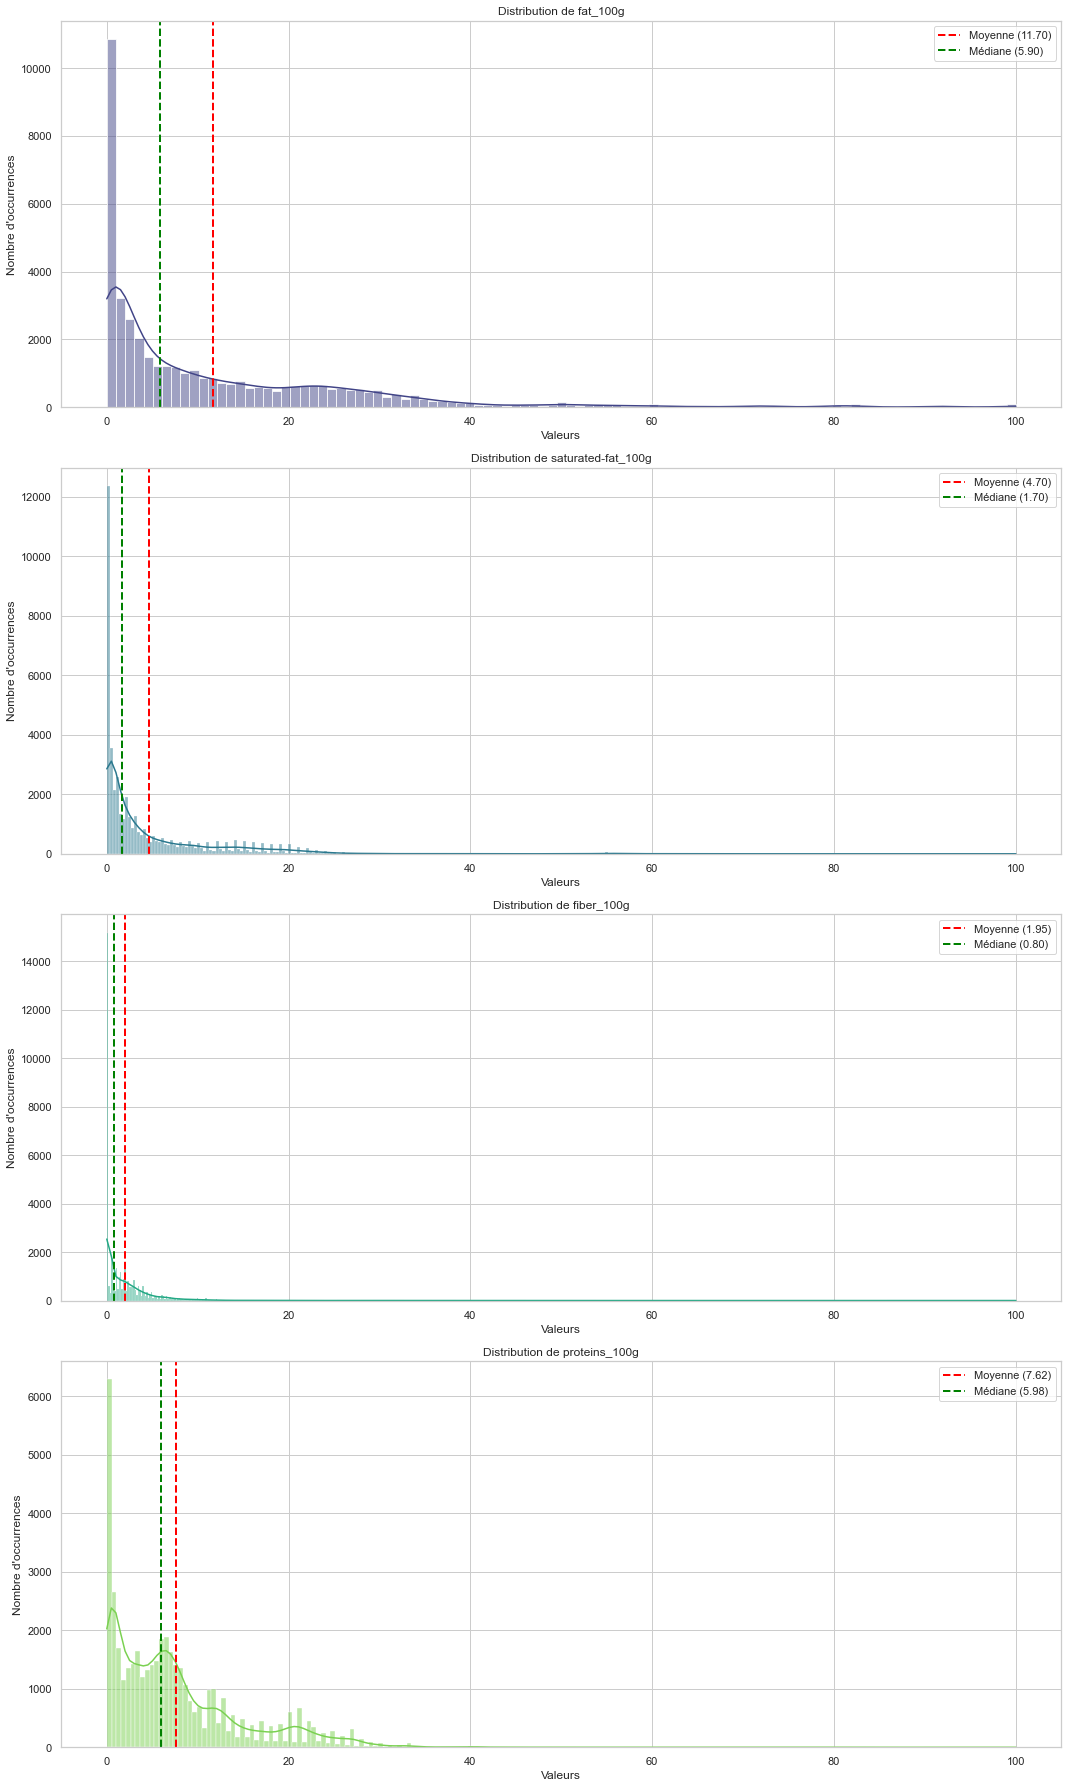

In [ ]:
distribution_histplot(df[['fat_100g','saturated-fat_100g','fiber_100g','proteins_100g']], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour les variables ‘fat_100g’, ‘saturated-fat_100g’, ‘fiber_100g’ et ‘proteins_100g’, on constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par 0. Dans l’ensemble, l’imputation semble s’être bien passée

2. 2. Approche technique:

On peut utiliser trois approches techniques pour traiter les valeurs manquantes (NA) :

- **Remplacement par la méthode statistique IterativeImputer() :** Cette méthode itère sur les variables pour estimer les valeurs manquantes en utilisant un modèle de régression. Elle est utile lorsque les données ont des relations complexes entre elles.
- **Remplacement par la médiane par catégorie :** Au lieu d’utiliser la moyenne, nous utilisons la médiane pour remplacer les valeurs manquantes. Cette approche est préférable lorsque le dataset contient des valeurs extrêmes susceptibles d’introduire des biais dans la moyenne.
- **Remplacement par la méthode statistique KNNImputer() :** Cette méthode utilise l’algorithme des k-plus proches voisins pour estimer les valeurs manquantes en se basant sur les valeurs des voisins les plus proches.

- **Imputation par la méthode iterativeimputer():**

La condition pour utiliser la méthode iterativeimputer() est que chaque paire de variables devrait avoir une corrélation d'au moins 55%.

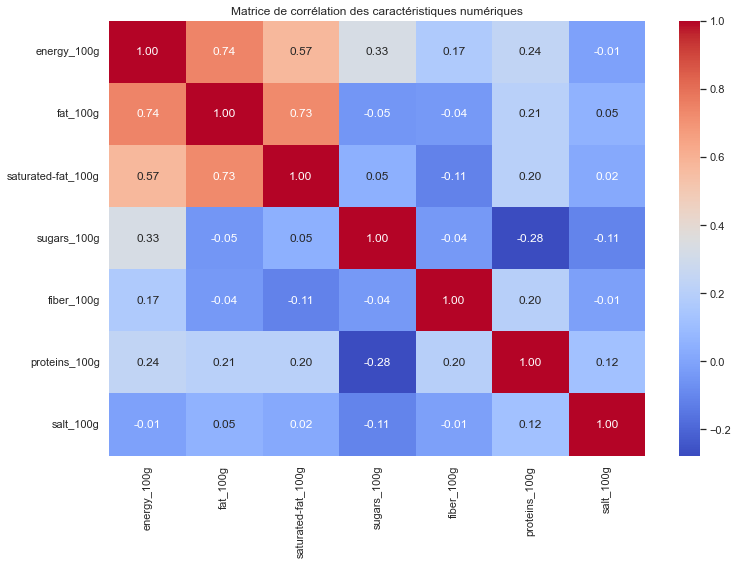

In [ ]:
correlation_matrix(df)

Dans cette matrice de corrélation, voici les paires de variables qui ont Une forte corrélation positive supérieure à 55 % :

- energy_100g et fat_100g avec une corrélation de 0.74.
- energy_100g et saturated-fat_100g avec une corrélation de 0.57.
- fat_100g et saturated-fat_100g avec une corrélation de 0.73.

In [ ]:
# Affichage des 3 variables avant imputation
df[['energy_100g', 'fat_100g', 'saturated-fat_100g']]

energy_100g  fat_100g  saturated-fat_100g
0           1883.0      20.0               12.50
1            177.0       0.0                0.00
2            177.0       0.0                0.00
3           1900.0      23.0                2.50
4           1768.0      19.0                2.50
...            ...       ...                 ...
46027       1017.0       1.3                1.28
46028       1031.0       1.3                1.28
46029       2155.0       NaN                3.40
46030       1643.0       2.8                0.60
46031         21.0       0.2                0.20

[44459 rows x 3 columns]

In [ ]:
# Initialisez l'itérateur d'imputation
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0) # L'estimateur RandomForestRegressor() est un bon choix pour des variables corrélées.

# Appliquez l'imputation aux données spécifiques
df[['energy_100g', 'fat_100g', 'saturated-fat_100g']] = imputer.fit_transform(df[['energy_100g', 'fat_100g', 'saturated-fat_100g']])

# Affichez les données imputées
df[['energy_100g', 'fat_100g', 'saturated-fat_100g']]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


energy_100g  fat_100g  saturated-fat_100g
0           1883.0    20.000               12.50
1            177.0     0.000                0.00
2            177.0     0.000                0.00
3           1900.0    23.000                2.50
4           1768.0    19.000                2.50
...            ...       ...                 ...
46027       1017.0     1.300                1.28
46028       1031.0     1.300                1.28
46029       2155.0    31.623                3.40
46030       1643.0     2.800                0.60
46031         21.0     0.200                0.20

[44459 rows x 3 columns]

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5              energy_100g           100.000000
6                 fat_100g           100.000000
7       saturated-fat_100g           100.000000
8       nutrition_grade_fr           100.000000
9         created_datetime            99.997751
10           proteins_100g            99.835804
11             sugars_100g            99.829056
12               salt_100g            99.829056
13              fiber_100g            83.256484

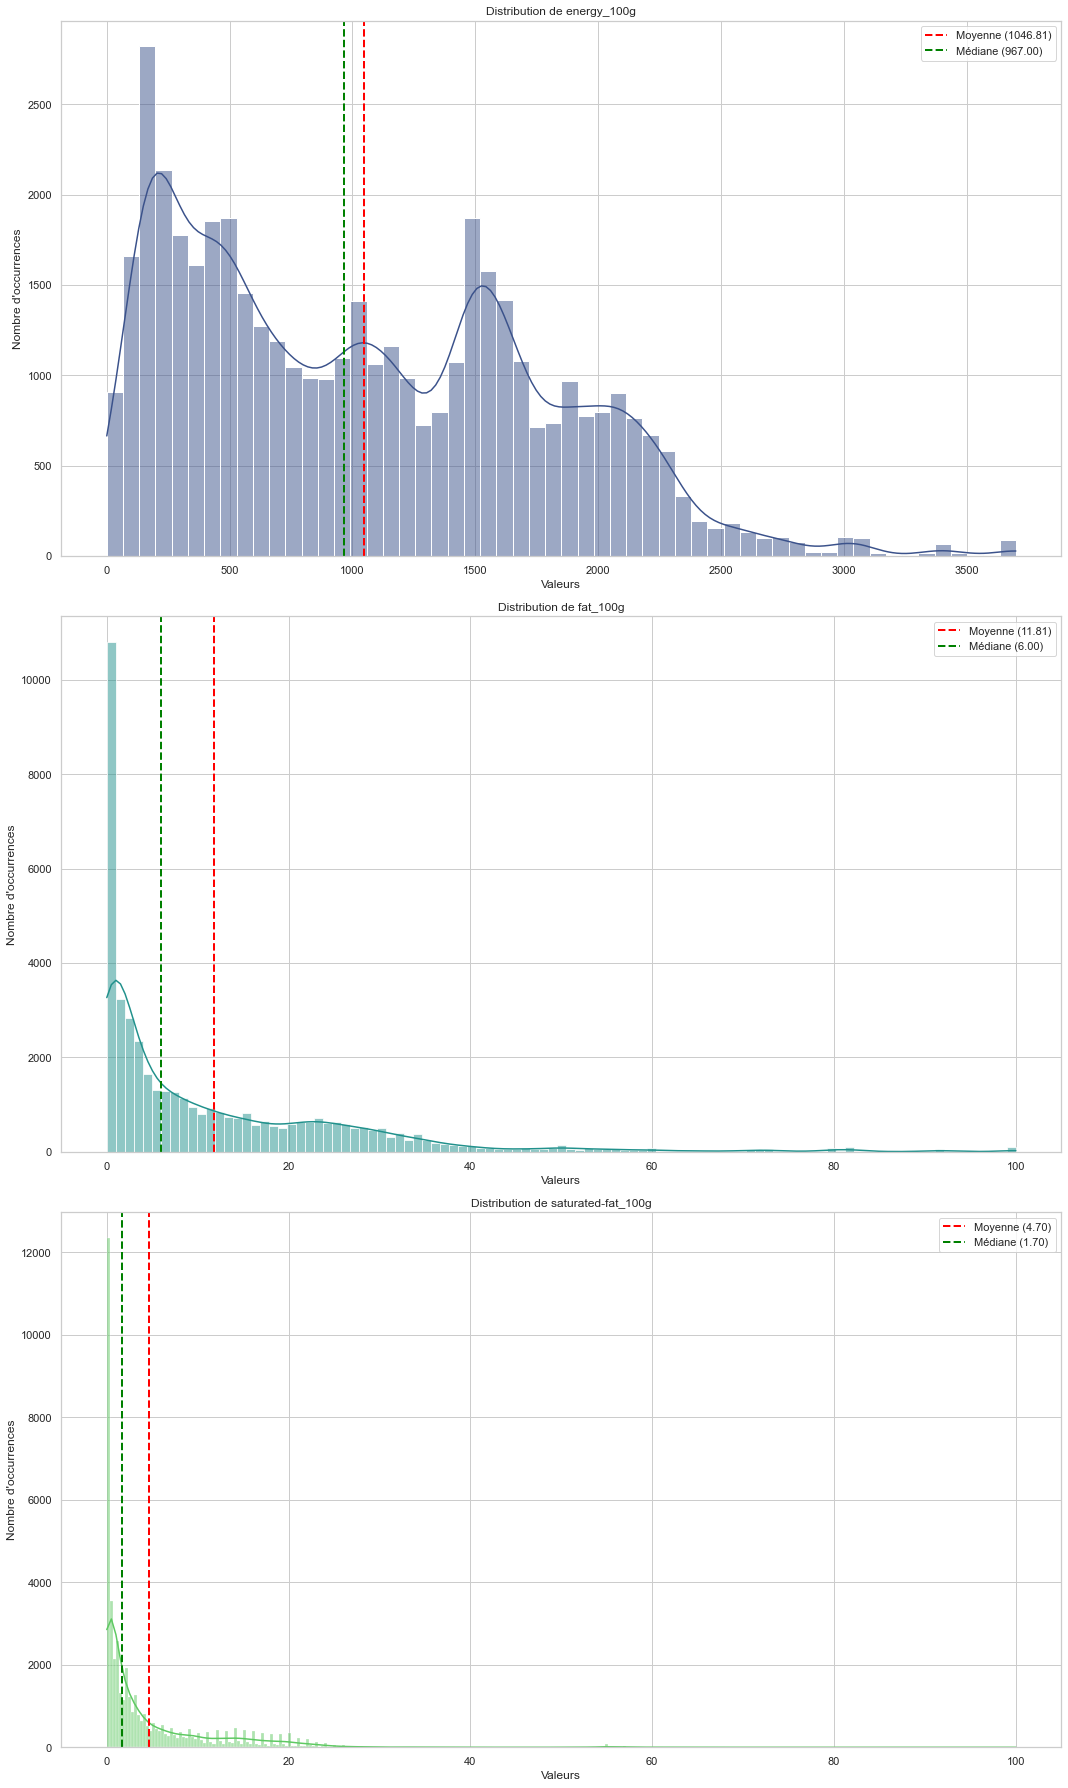

In [ ]:
distribution_histplot(df[['energy_100g', 'fat_100g', 'saturated-fat_100g']], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour les variables 'energy_100g', 'fat_100g' et 'saturated-fat_100g', on constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par IterativeImputer. Dans l’ensemble, l’imputation semble s’être bien passée

- **Imputation par la méthode médiane:**

 Pour les colonnes proteins_100g, sugars_100g, salt_100g, et fiber_100g, nous allons effectuer l’imputation par la médiane, en tenant compte des différentes catégories de la colonne pnns_groups_1. Nous exclurons la catégorie ‘unknown’ (inconnue) et la traiterons ultérieurement avec la méthode Knn.

In [ ]:
# lister les catégories de la colonne pnns_groups_1 et exclure la catégorie ‘unknown’
list_catégorie_médiane = df.pnns_groups_1.value_counts().index.tolist()[1:]
print(list_catégorie_médiane)

['sugary snacks', 'milk and dairy products', 'composite foods', 'cereals and potatoes', 'fish meat eggs', 'beverages', 'fruits and vegetables', 'fat and sauces', 'salty snacks']


In [ ]:
cols_médiane = ['proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']

In [ ]:
for col in cols_médiane:
    # Filtrer les données pour exclure la catégorie 'unknown'
    filtered_data = df[df['pnns_groups_1'] != 'unknown']
    
    # Appliquer la médiane par groupe sur les données filtrées
    filled_data = filtered_data.groupby('pnns_groups_1')[col].apply(lambda x: x.fillna(x.median()))
    
    # Réaffecter les valeurs imputées à la colonne correspondante dans le DataFrame d'origine
    df[col] = filled_data.combine_first(df[col])


In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5              energy_100g           100.000000
6                 fat_100g           100.000000
7       saturated-fat_100g           100.000000
8       nutrition_grade_fr           100.000000
9         created_datetime            99.997751
10             sugars_100g            99.943768
11           proteins_100g            99.943768
12               salt_100g            99.943768
13              fiber_100g            95.474482

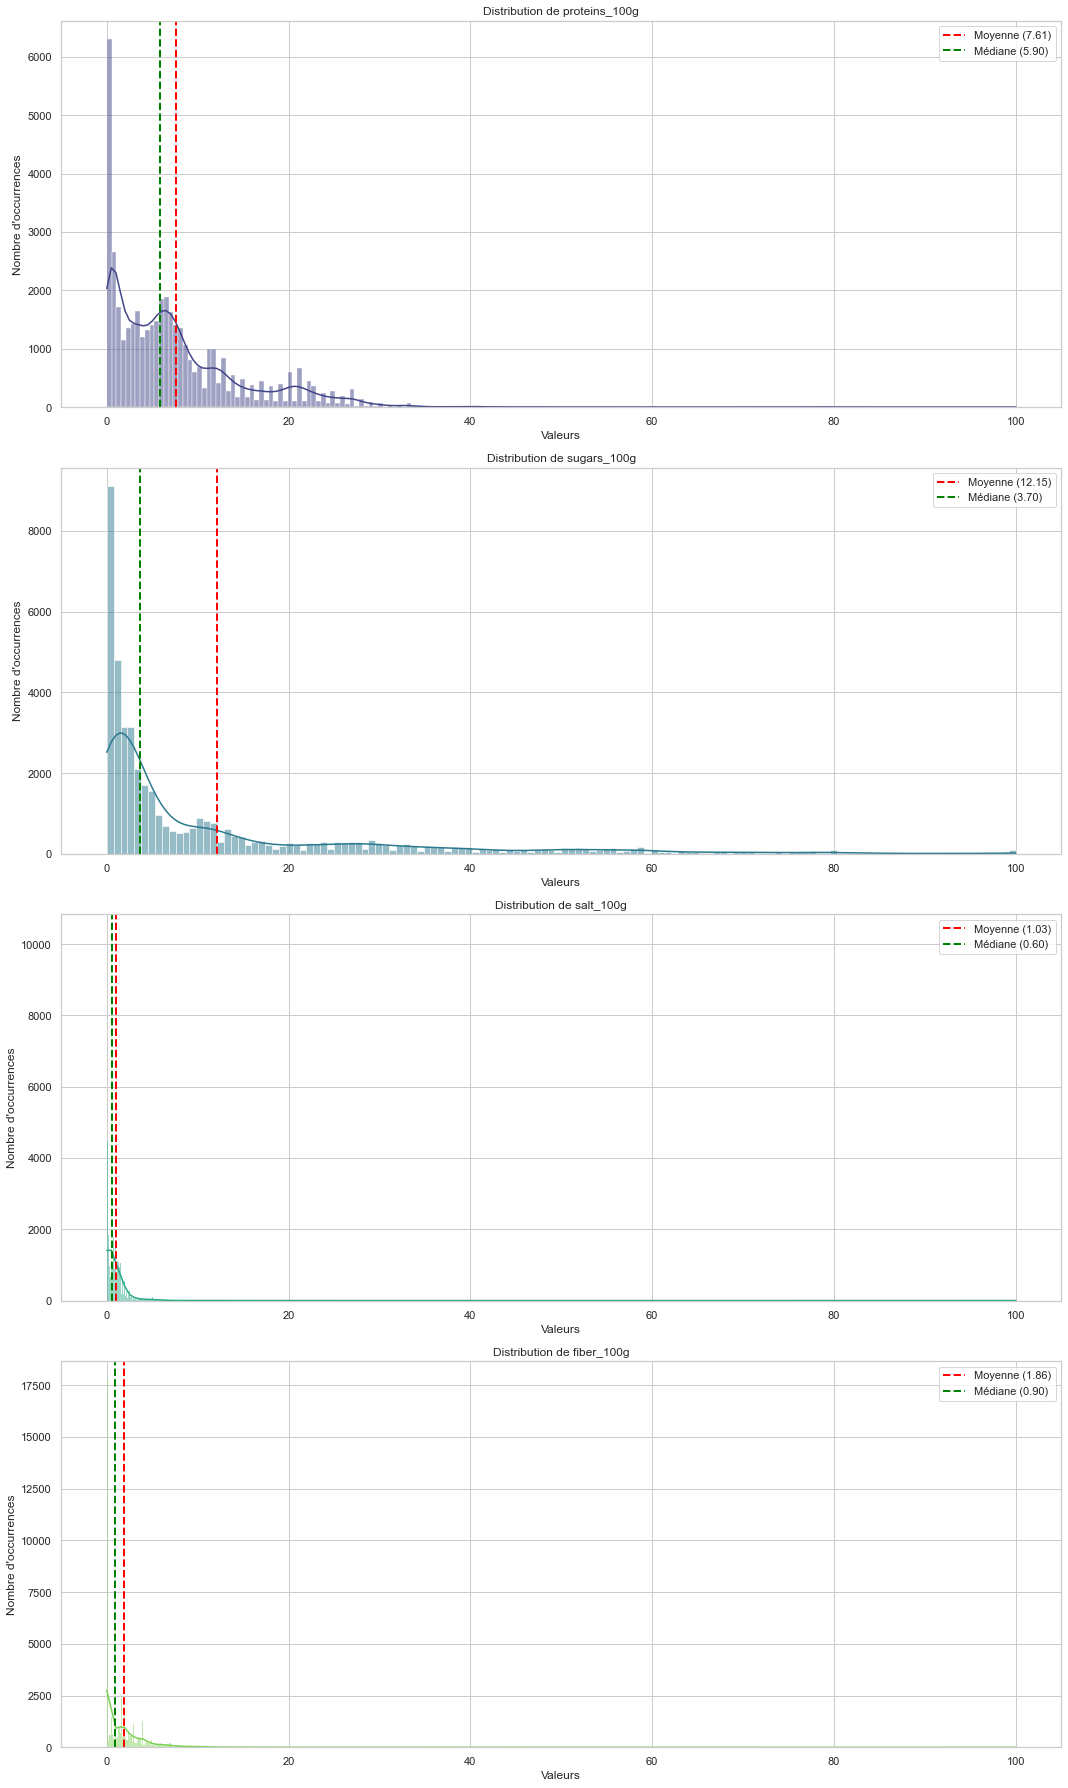

In [ ]:
distribution_histplot(df[['proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour les variables 'proteins_100g', 'sugars_100g', 'salt_100g' et 'fiber_100g', on constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par la médiane. Dans l’ensemble, l’imputation semble s’être bien passée

- **Imputation par la méthode Knn:**

In [ ]:
# Voici les colonnes numérique avec les valeurs manquantes
cols_Knn = ['proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']
df[cols_Knn]

proteins_100g  sugars_100g  salt_100g  fiber_100g
0              2.500        57.50    0.09652       2.500
1              0.000        10.40    0.02540       0.000
2              0.000        10.40    0.10000       0.000
3              6.000        26.00    0.66000       1.500
4              5.800        28.00    0.65000       1.800
...              ...          ...        ...         ...
46027          0.040         0.12    0.00500       0.005
46028          0.004         0.10    0.00100       1.470
46029          7.800         1.80    1.35000       5.600
46030         13.000         2.60    0.68000       5.900
46031          0.500         0.50    0.02540       0.200

[44459 rows x 4 columns]

In [ ]:
# Initialisez l'itérateur d'imputation
imputer_Knn = KNNImputer(n_neighbors=5)

# Appliquez l'imputation aux données spécifiques
df[cols_Knn] = imputer_Knn.fit_transform(df[cols_Knn])

# Affichez les données imputées
df[cols_Knn]

proteins_100g  sugars_100g  salt_100g  fiber_100g
0              2.500        57.50    0.09652       2.500
1              0.000        10.40    0.02540       0.000
2              0.000        10.40    0.10000       0.000
3              6.000        26.00    0.66000       1.500
4              5.800        28.00    0.65000       1.800
...              ...          ...        ...         ...
46027          0.040         0.12    0.00500       0.005
46028          0.004         0.10    0.00100       1.470
46029          7.800         1.80    1.35000       5.600
46030         13.000         2.60    0.68000       5.900
46031          0.500         0.50    0.02540       0.200

[44459 rows x 4 columns]

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code           100.000000
1             product_name           100.000000
2                   brands           100.000000
3            pnns_groups_1           100.000000
4   last_modified_datetime           100.000000
5              energy_100g           100.000000
6                 fat_100g           100.000000
7       saturated-fat_100g           100.000000
8              sugars_100g           100.000000
9               fiber_100g           100.000000
10           proteins_100g           100.000000
11               salt_100g           100.000000
12      nutrition_grade_fr           100.000000
13        created_datetime            99.997751

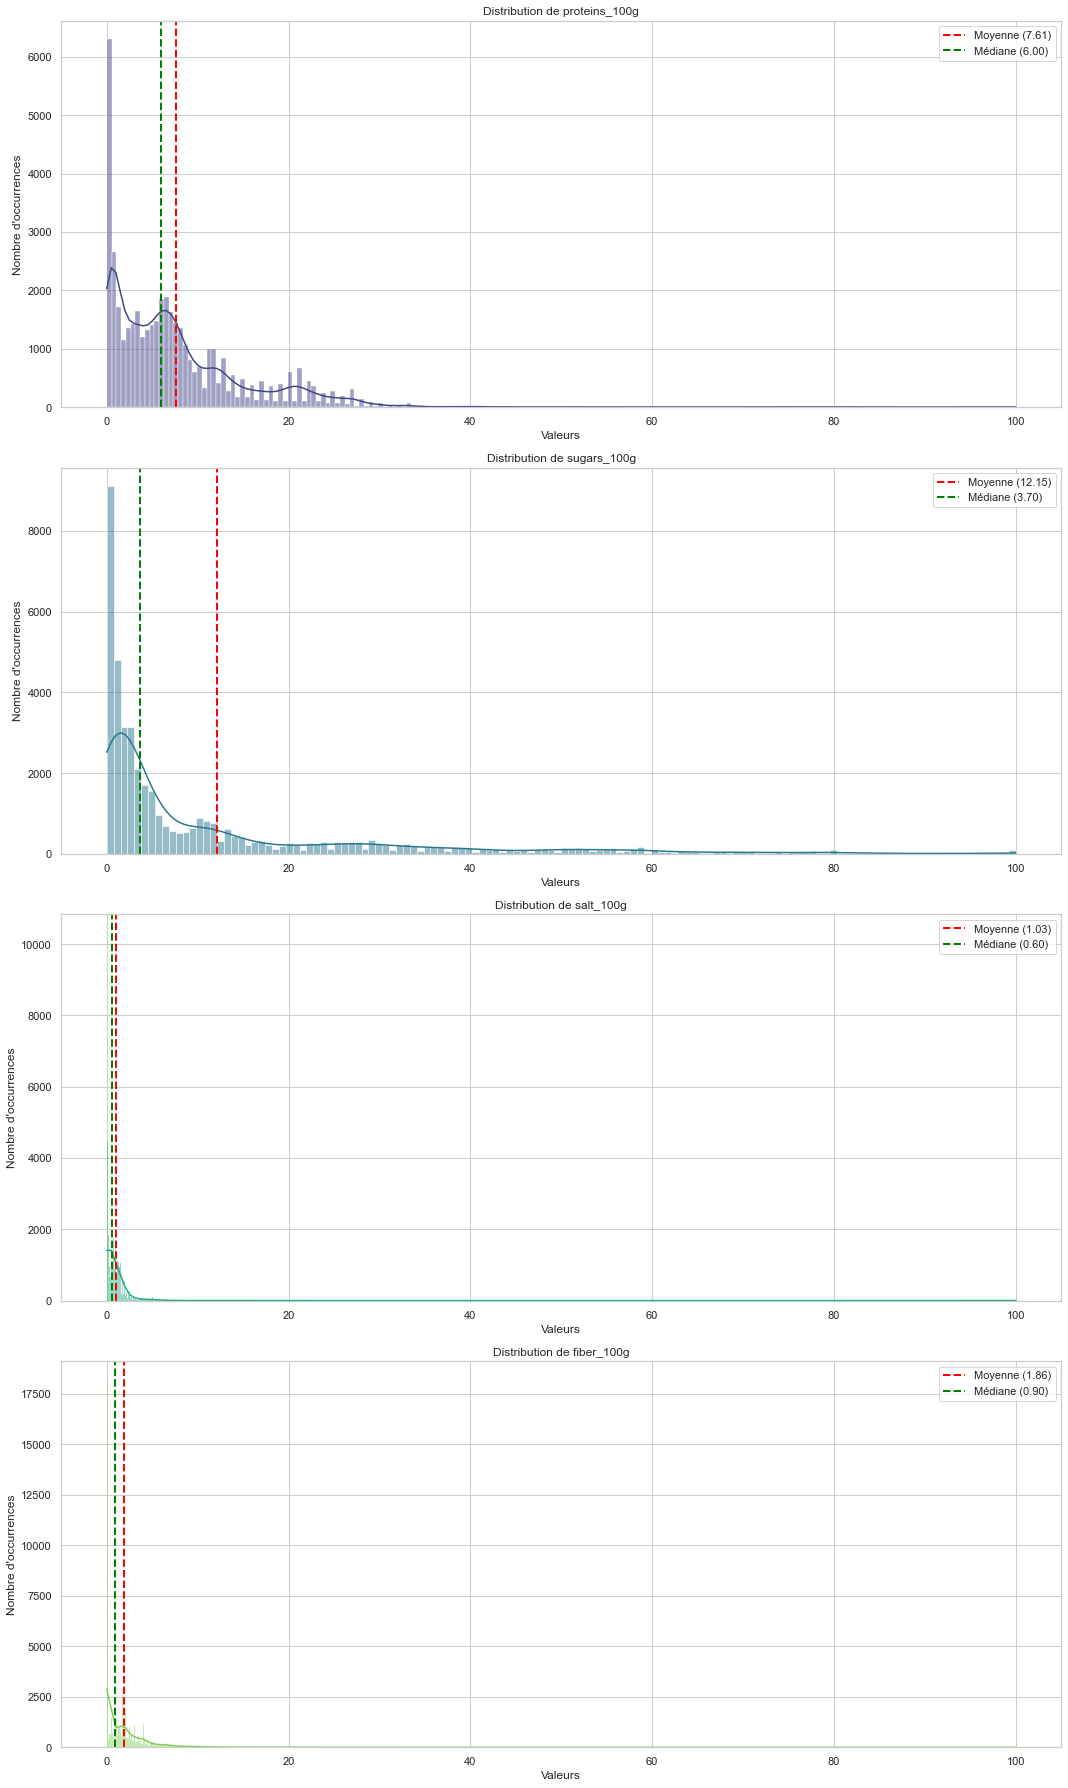

In [ ]:
distribution_histplot(df[['proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour les variables 'proteins_100g', 'sugars_100g', 'salt_100g' et 'fiber_100g', on constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par la méthode Knn. Dans l’ensemble, l’imputation semble s’être bien passée

- **La colonne datetime "created_datetime" :**

Pour les valeurs manquantes dans la colonne 'created_datetime', qui indique la date de création des produits. Dans ce cas, puisque la date de création est une information importante et que nous ne pouvons pas l'estimer avec précision, il est préférable de ne pas utiliser ces enregistrements pour éviter d'introduire des biais ou des erreurs dans nos analyses.

In [ ]:
df = df.dropna(subset='created_datetime')

In [ ]:
Taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                     code                100.0
1             product_name                100.0
2                   brands                100.0
3         created_datetime                100.0
4            pnns_groups_1                100.0
5   last_modified_datetime                100.0
6              energy_100g                100.0
7                 fat_100g                100.0
8       saturated-fat_100g                100.0
9              sugars_100g                100.0
10              fiber_100g                100.0
11           proteins_100g                100.0
12               salt_100g                100.0
13      nutrition_grade_fr                100.0

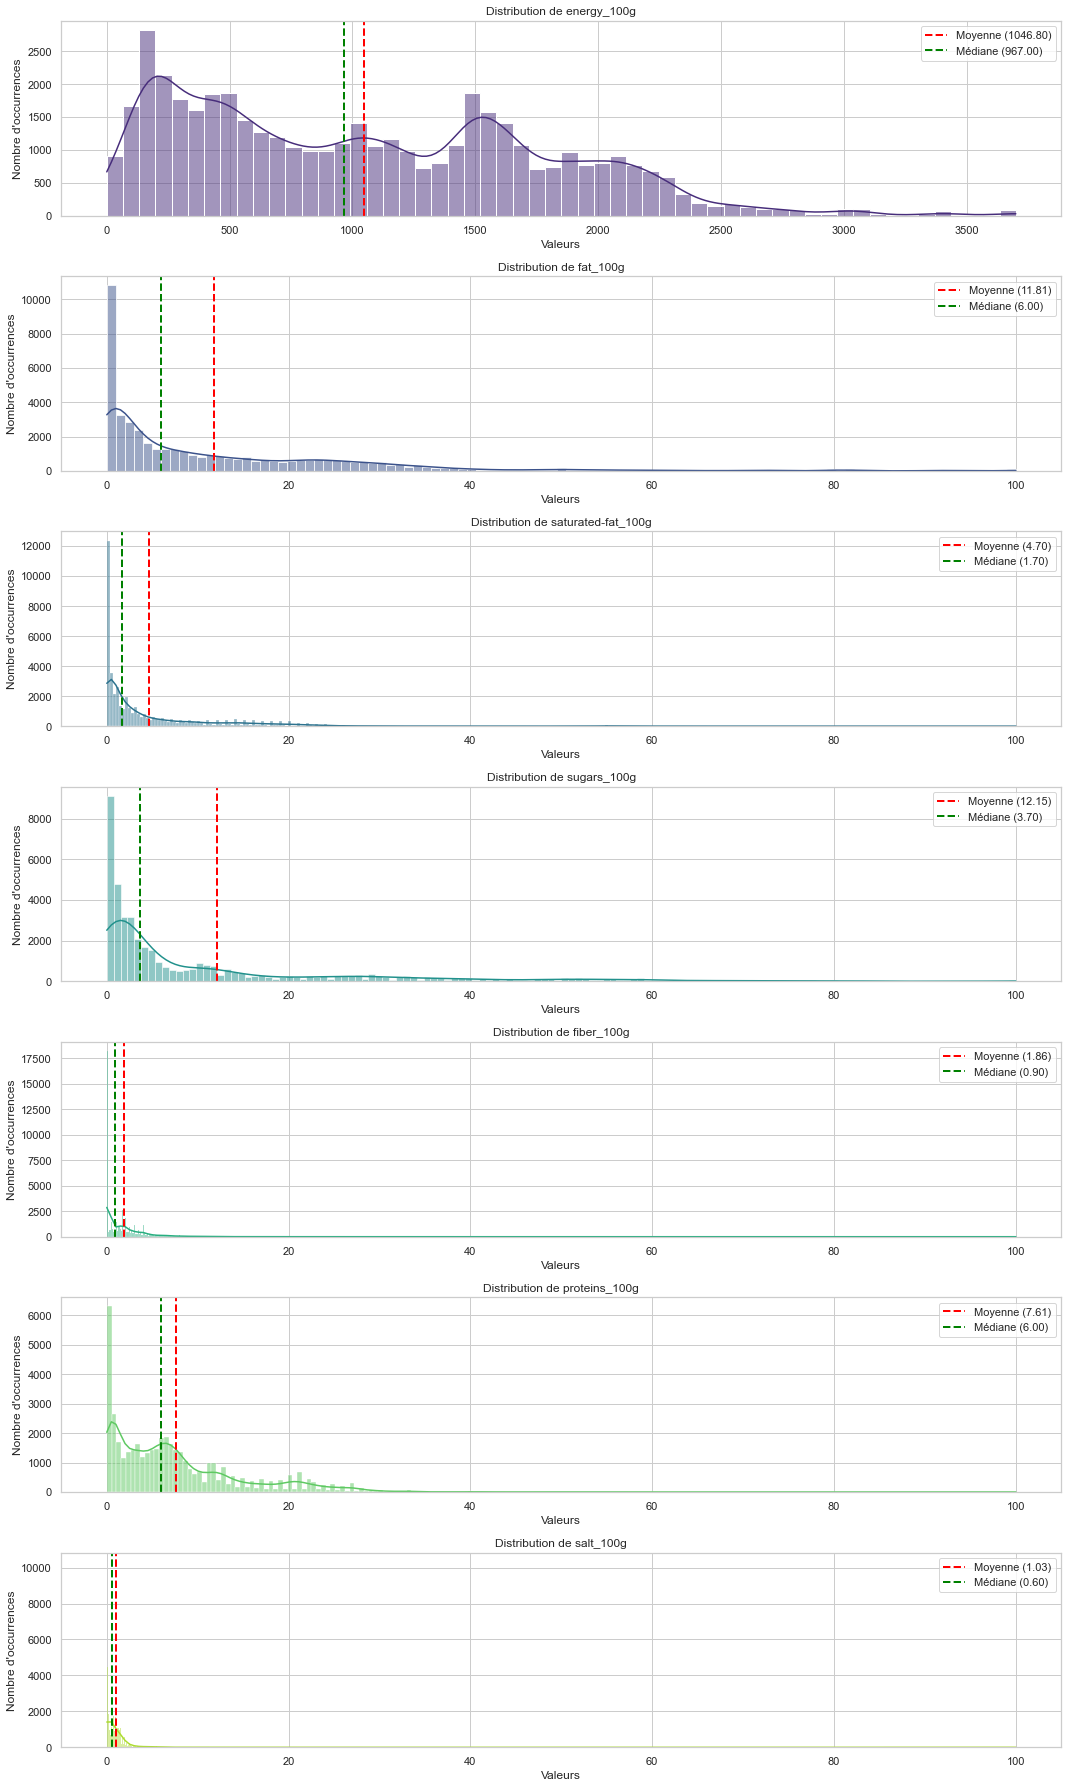

In [ ]:
distribution_histplot(df, kde=True)

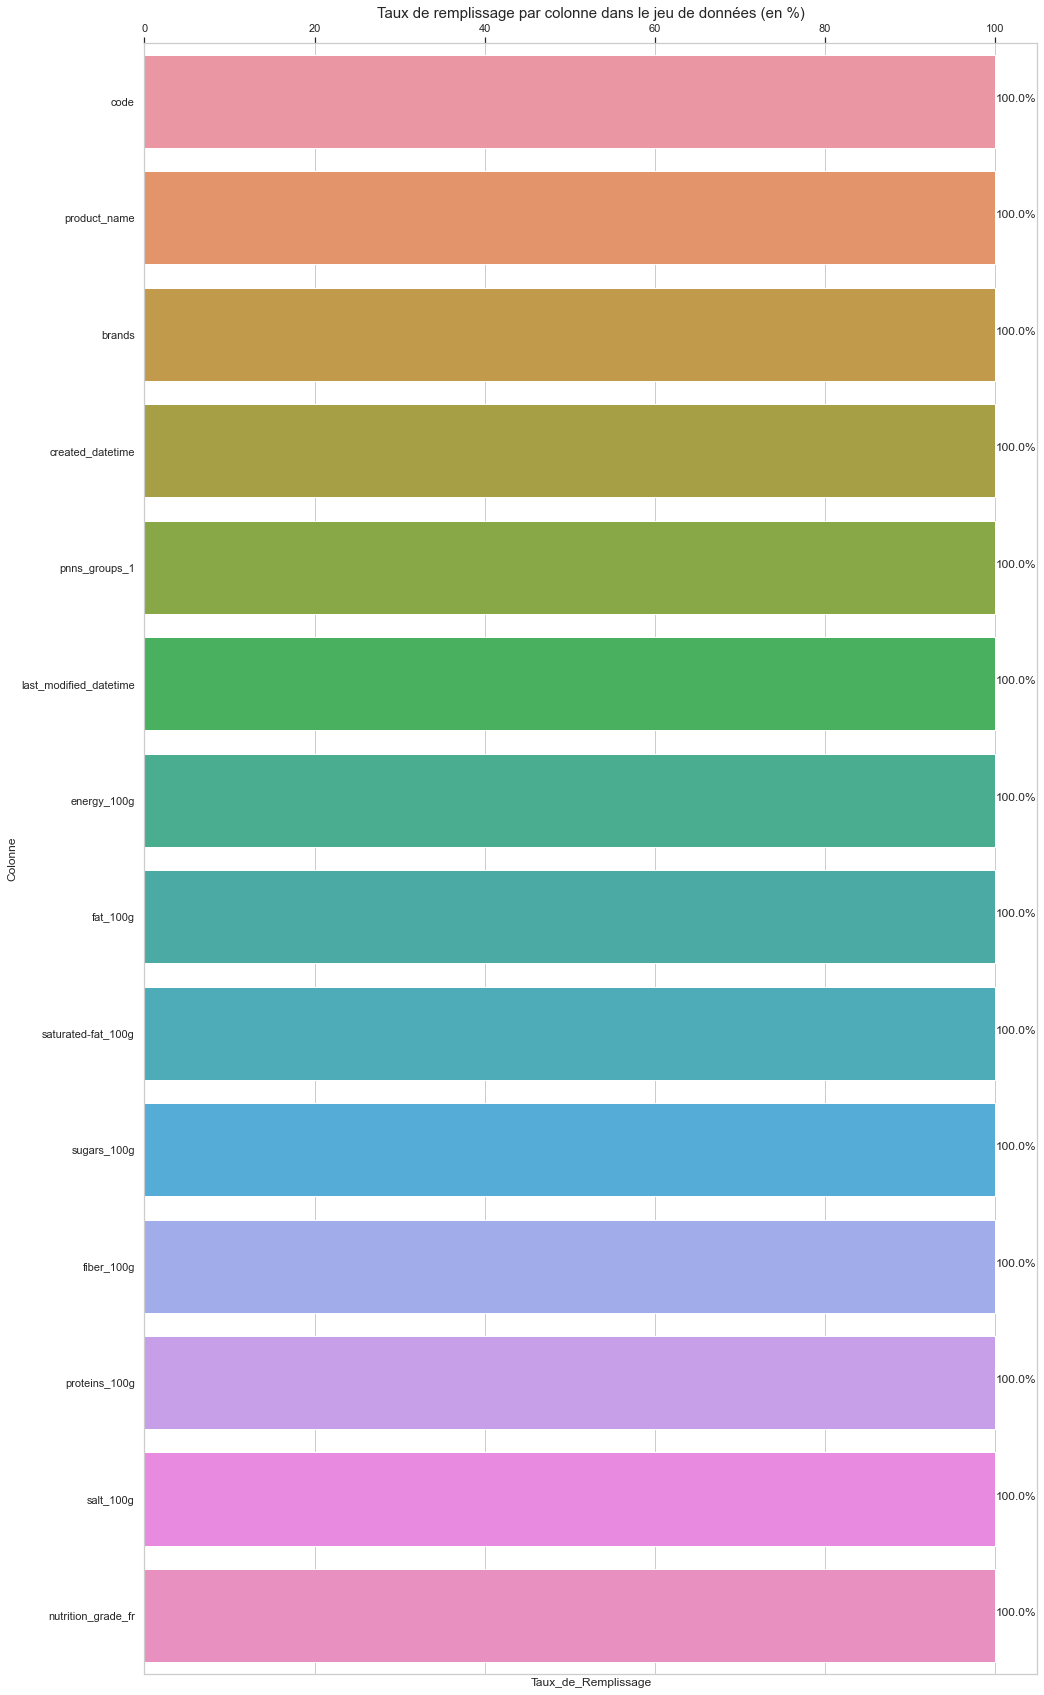

In [ ]:
Taux_de_Remplissage(df, show_threshold_bar=False)

Conclusion: toutes les variables ont un taux de remplissage à 100 %, donc on peut passer à l'étape analyse.

In [ ]:
df.dtypes

code                                   object
product_name                           object
brands                                 object
created_datetime          datetime64[ns, UTC]
pnns_groups_1                          object
last_modified_datetime    datetime64[ns, UTC]
energy_100g                           float64
fat_100g                              float64
saturated-fat_100g                    float64
sugars_100g                           float64
fiber_100g                            float64
proteins_100g                         float64
salt_100g                             float64
nutrition_grade_fr                     object
dtype: object

In [ ]:
show_data(df)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 44458 lignes et 14 colonnes dans notre dataset.


2. Affichage de la dataframe:


code           product_name    brands          created_datetime  \
0     36252         Lion Peanut x2  Sunridge 2015-01-25 21:35:01+00:00   
1  40608754  Pepsi, Nouveau goût !     Pepsi 2012-08-15 09:48:28+00:00   

  pnns_groups_1    last_modified_datetime  energy_100g  fat_100g  \
0       unknown 2017-03-09 10:34:27+00:00       1883.0      20.0   
1     beverages 2015-08-09 17:35:31+00:00        177.0       0.0   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                12.5         57.5         2.5            2.5    0.09652   
1                 0.0         10.4         0.0            0.0    0.02540   

  nutrition_grade_fr  
0                  e  
1                  e

In [ ]:
# Sauvgarder le fichier
df.to_csv("Data/data_open_food_facts_cleaned.csv")

## **Etape 4: les analyses uni-variée et bi-variée:**

L’analyse de données dans ce projet joue un rôle crucial en transformant les vastes quantités d’informations brutes de la base de données Open Food Facts en insights précieux et actionnables. L’objectif est de déceler des tendances, des patterns et des corrélations qui peuvent non seulement améliorer la compréhension des habitudes alimentaires globales, mais aussi orienter les décisions stratégiques pour l’ajout de nouveaux produits. En exploitant des techniques d’analyse avancées, nous visons à fournir une base solide pour des recommandations personnalisées et à enrichir l’expérience utilisateur en facilitant la navigation et la découverte de produits au sein de la base de données.

In [ ]:
# Charger le jeu donnée nettoyé
# df = pd.read_csv("Data/data_open_food_facts_cleaned.csv")

### **Analyse uni-variée :**

#### **Features numériques :**

1. **Afficher les variables numérique:**

In [ ]:
features_numerique = list(df.select_dtypes(include='float').columns)
features_numerique

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

##### 2. **Affichage les statistiques du dataframe:**

In [ ]:
# Affichage les statistiques du dataframe:
stat_univarie = df.describe()
stat_univarie

energy_100g      fat_100g  saturated-fat_100g   sugars_100g  \
count  44458.000000  44458.000000        44458.000000  44458.000000   
mean    1046.796539     11.811550            4.697265     12.147767   
std      726.629675     14.981254            7.156183     17.956272   
min        0.000000      0.000000            0.000000      0.000000   
25%      403.223922      1.000000            0.300000      1.000000   
50%      967.000000      6.000000            1.700000      3.700000   
75%     1586.000000     18.600000            6.200000     14.500000   
max     3700.000000    100.000000          100.000000    100.000000   

         fiber_100g  proteins_100g     salt_100g  
count  44458.000000   44458.000000  44458.000000  
mean       1.856926       7.611332      1.029166  
std        3.313629       7.458158      3.332732  
min        0.000000       0.000000      0.000000  
25%        0.000000       1.700000      0.080010  
50%        0.900000       6.000000      0.600000  
75%        2.500000      11.000000      1.270000  
max      100.000000     100.000000    100.000000

In [ ]:
# Sélectionnez uniquement les colonnes numériques de df
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()

for column in numeric_cols:
    # Calcul de la skewness pour chaque colonne numérique et arrondissement à 3 décimales
    stat_univarie.loc['skewness', column] = round(skew(df[column].dropna()), 3)
    stat_univarie.loc['kurtosis', column] = round(kurtosis(df[column].dropna()), 3)
    
display(stat_univarie)

energy_100g      fat_100g  saturated-fat_100g   sugars_100g  \
count     44458.000000  44458.000000        44458.000000  44458.000000   
mean       1046.796539     11.811550            4.697265     12.147767   
std         726.629675     14.981254            7.156183     17.956272   
min           0.000000      0.000000            0.000000      0.000000   
25%         403.223922      1.000000            0.300000      1.000000   
50%         967.000000      6.000000            1.700000      3.700000   
75%        1586.000000     18.600000            6.200000     14.500000   
max        3700.000000    100.000000          100.000000    100.000000   
skewness      0.527000      2.204000            3.232000      2.149000   
kurtosis     -0.439000      6.727000           18.696000      4.608000   

            fiber_100g  proteins_100g     salt_100g  
count     44458.000000   44458.000000  44458.000000  
mean          1.856926       7.611332      1.029166  
std           3.313629       7.458158      3.332732  
min           0.000000       0.000000      0.000000  
25%           0.000000       1.700000      0.080010  
50%           0.900000       6.000000      0.600000  
75%           2.500000      11.000000      1.270000  
max         100.000000     100.000000    100.000000  
skewness      7.615000       1.788000     21.505000  
kurtosis    125.618000       7.010000    573.898000

##### 3. **Graphiques boxplot:**

In [ ]:
def data_boxplot(data, liste):
    for colonne in liste :
        data.boxplot(column=colonne, vert=False, showfliers=False, figsize=(15,8), meanline=True, showmeans=True, patch_artist=True)
        plt.title('Distribution '+ colonne)
        plt.show()

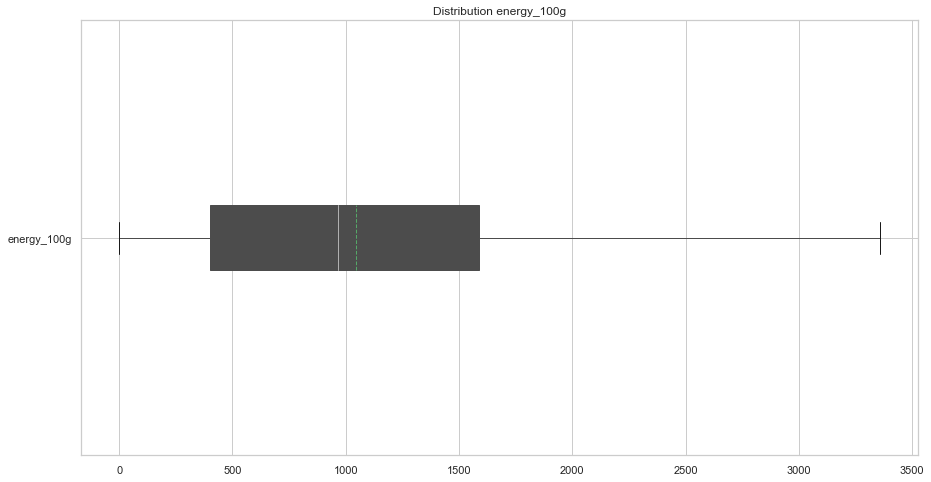

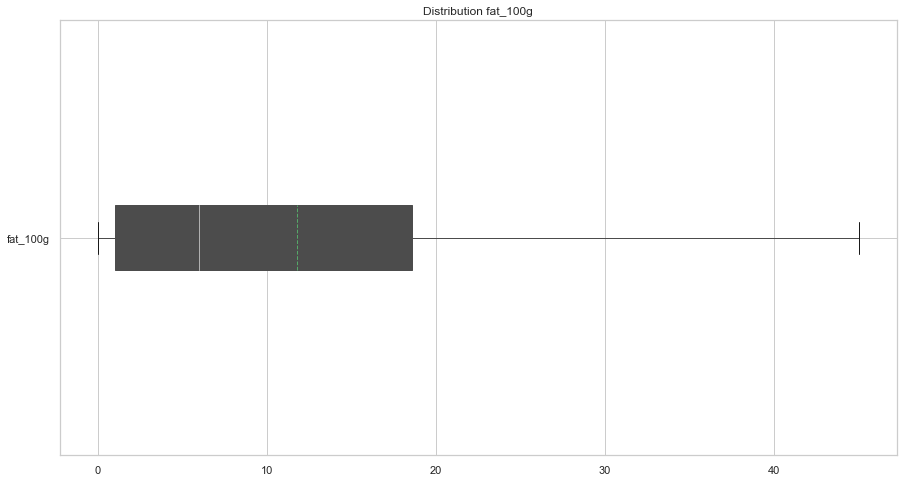

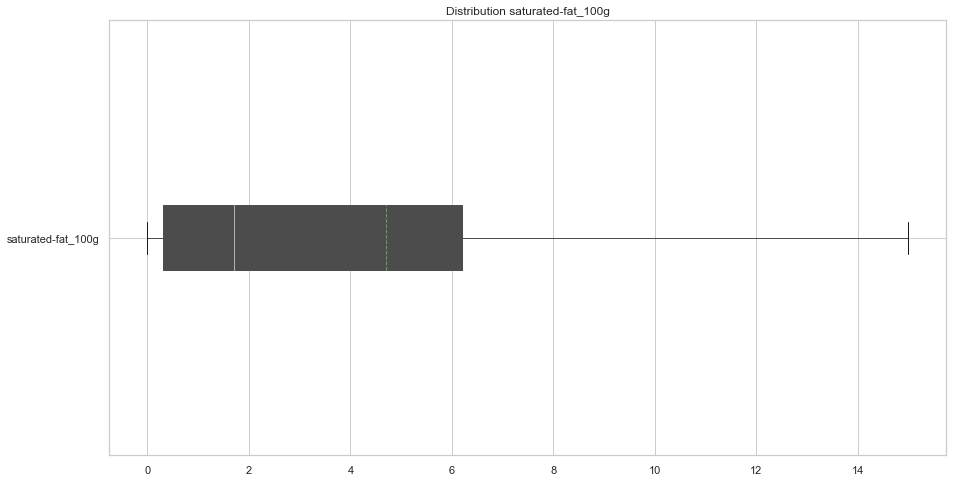

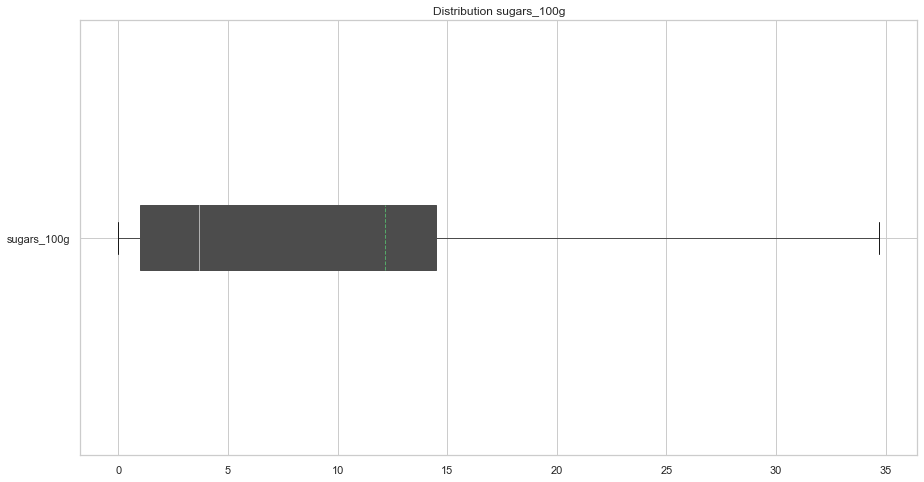

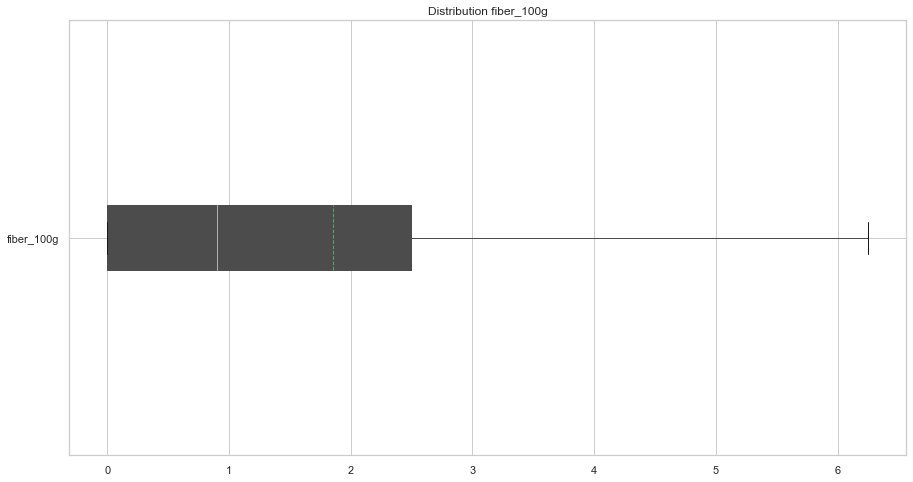

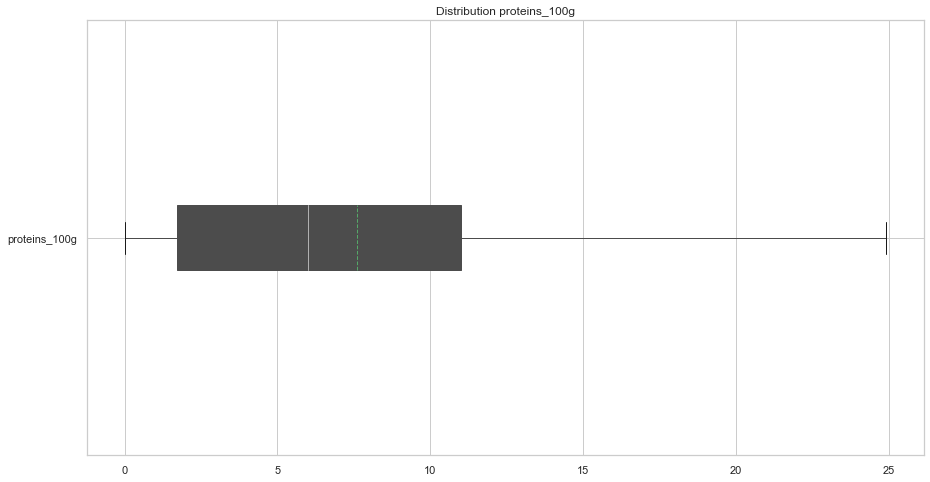

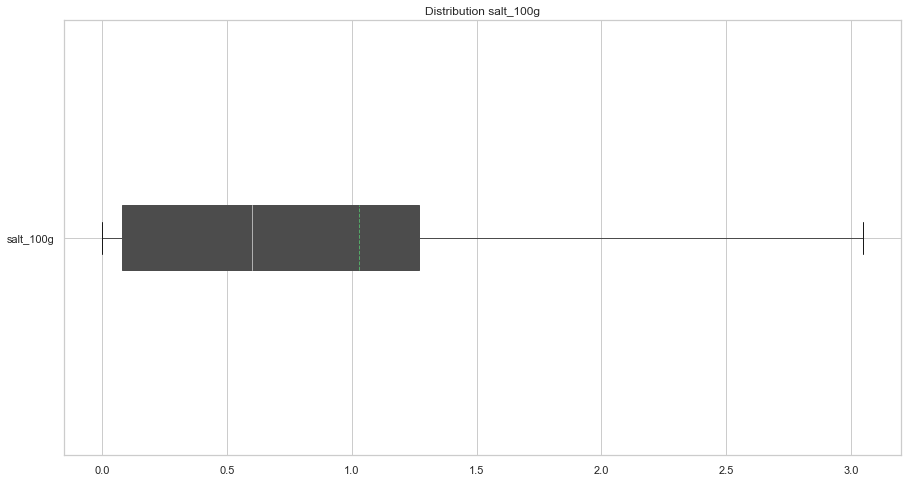

In [ ]:
data_boxplot(df, features_numerique)

##### 3. **Graphique distribution:**

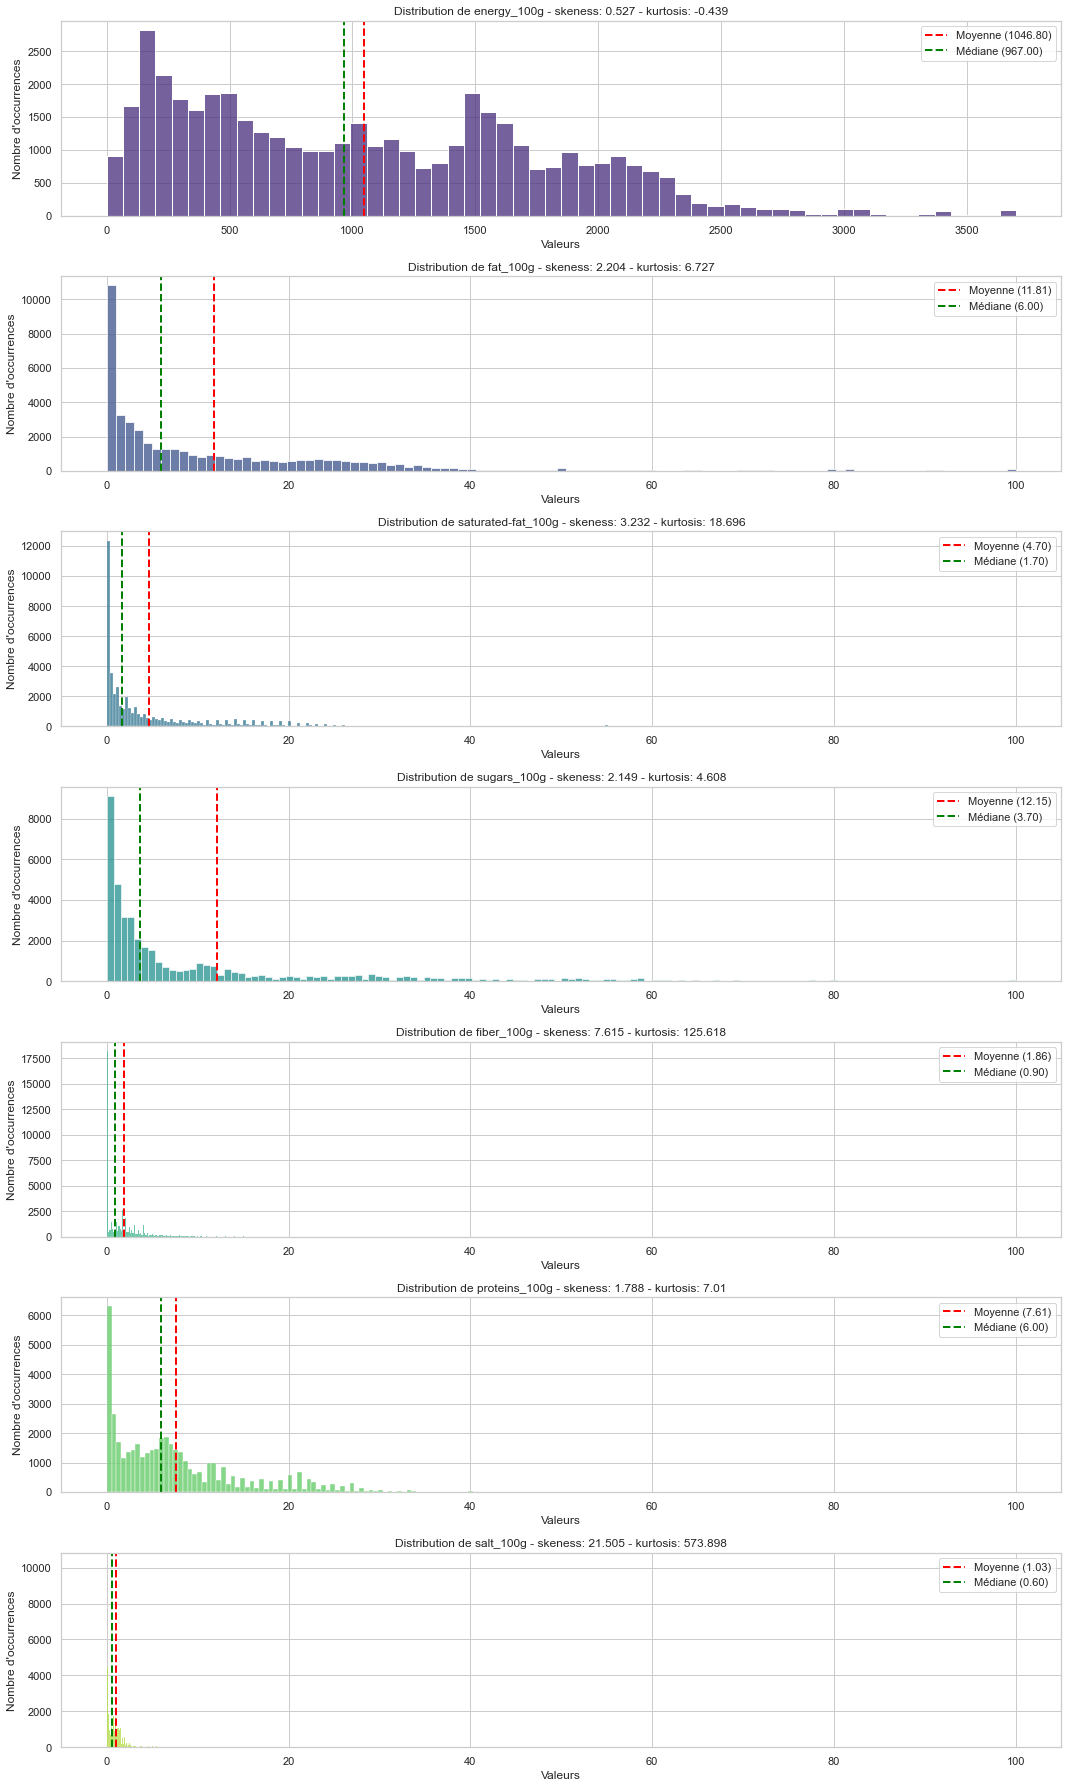

In [ ]:
distribution_histplot(df, show_skeness_kurtosis=True)

**Conclusion :** Selon les trois graphiques du tableau statistique, des diagrammes à moustaches et du diagramme de distribution à barres, on pourrait conclure sur les variables comme ceci :

**Énergie pour 100g :** Skewness = 0.53, Kurtosis = -0.44. La distribution de l’énergie est légèrement asymétrique à droite, ce qui signifie que la queue de la distribution sur le côté droit de la courbe est légèrement plus longue ou plus épaisse que celle du côté gauche. De plus, elle a un aplatissement inférieur à celui d’une distribution normale, ce qui signifie qu’elle a des queues plus légères et un pic plus plat.

**Matières grasses pour 100g :** Skewness = 2.2, Kurtosis = 6.73. La distribution des matières grasses est fortement asymétrique à droite et a un aplatissement supérieur à celui d’une distribution normale (leptokurtique). Cela suggère que de nombreux produits ont une faible teneur en matières grasses, mais il y a aussi des produits avec une teneur en matières grasses plus élevée.

**Matières grasses saturées pour 100g :** Skewness = 3.23, Kurtosis = 18.7. La distribution des matières grasses saturées est fortement asymétrique à droite et a un aplatissement très supérieur à celui d’une distribution normale (leptokurtique). Cela indique que de nombreux produits ont une faible teneur en matières grasses saturées, mais il y a aussi des produits avec une teneur en matières grasses saturées plus élevée.

**Sucres pour 100g :** Skewness = 2.15, Kurtosis = 4.61. La distribution des sucres est fortement asymétrique à droite et a un aplatissement supérieur à celui d’une distribution normale (leptokurtique). Cela indique que de nombreux produits ont une faible teneur en sucre pour 100g, mais il y a aussi des produits avec une teneur en sucre plus élevée.

**Fibres pour 100g :** Skewness = 7.62, Kurtosis = 125.62. La distribution des fibres est extrêmement asymétrique à droite et a un aplatissement très supérieur à celui d’une distribution normale (leptokurtique). Cela suggère que de nombreux produits sont faibles en fibres, mais il y a aussi des produits avec une teneur en fibres plus élevée.

**Protéines pour 100g :** Skewness = 1.79, Kurtosis = 7.01. La distribution des protéines est fortement asymétrique à droite et a un aplatissement supérieur à celui d’une distribution normale (leptokurtique). Cela indique que de nombreux produits sont faibles en protéines, mais il y a aussi des produits avec une teneur en protéines plus élevée.

**Sel pour 100g :** Skewness = 21.51, Kurtosis = 573.9. La distribution du sel est extrêmement asymétrique à droite et a un aplatissement très supérieur à celui d’une distribution normale (leptokurtique). Cela indique que de nombreux produits ne contiennent pas de sel pour 100g, mais il y a aussi des produits avec une teneur en sel plus élevée.


#### **Features catégorielles :**

1. **Afficher les variables catégorielles:**

1. 1. **Type object:**

In [ ]:
# Afficher la liste des variables catégorielles de type object
features_categorielle_object = list(df.select_dtypes(include='object').columns)
# Enlever la colonne 'code' de la liste, puisque il n'a que des valeurs uniques
features_categorielle_object.remove('code')
print(features_categorielle_object)

['product_name', 'brands', 'pnns_groups_1', 'nutrition_grade_fr']


1. 2. **Type datetime:**

In [ ]:
# Afficher la liste des variables catégorielles de type object
features_categorielle_datetime = list(df.select_dtypes(include='datetime64[ns, UTC]').columns)
print(features_categorielle_datetime)

['created_datetime', 'last_modified_datetime']


2. **Afficher la distribution de chaque variable:**

2. 1. **Type object:**

In [ ]:
# Définition de la fonction diagramme_barplot()
def diagramme_barplot(list_columns): 
    for col in list_columns:
        print('--------')   
        print(col)
        print('--------')
        print('les valeurs uniques:', df[col].nunique())
        print('les valeurs dupliquées:', df[col].duplicated().sum())
        
        #Afficher maximum 13 valeurs uniques
        unique_counts  = df[col].value_counts().head(13) 
        plt.figure(figsize=(23, 15))
        sns.barplot(x=unique_counts.index, y=unique_counts.values)
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Nombre d\'occurrences')
        plt.title('Distribution de '+ col)
        plt.show() 
        if len(unique_counts) > 1:
            print('Les deux élements avec les plus grandes occurrences sont :',unique_counts[0:3].index[0],' et ', unique_counts[0:3].index[1])
            print(unique_counts[0:3].index[0], '=', unique_counts[0:3].values[0], 'occurrences' )
            print( unique_counts[0:3].index[1], '=', unique_counts[0:3].values[1], 'occurrences' )
        else:
            print('Les deux élements avec les plus grandes occurrences sont :',unique_counts[0:3].index[0])
            print(unique_counts[0:3].index[0], '=', unique_counts[0:3].values[0], 'occurrences' )
        print('\n'*2)

--------
product_name
--------
les valeurs uniques: 36922
les valeurs dupliquées: 7536


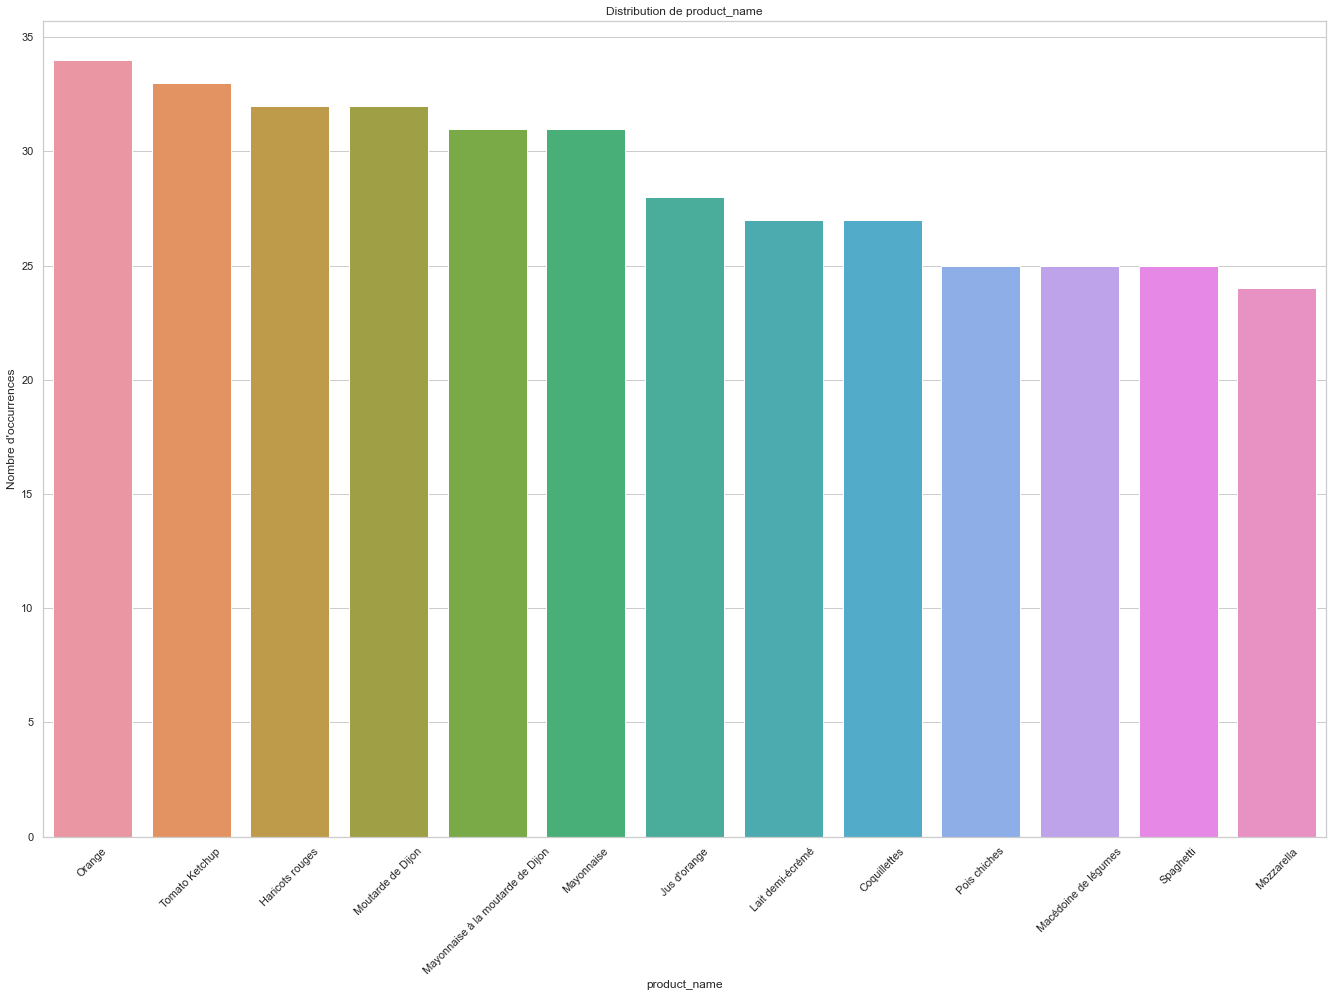

Les deux élements avec les plus grandes occurrences sont : Orange  et  Tomato Ketchup
Orange = 34 occurrences
Tomato Ketchup = 33 occurrences



--------
brands
--------
les valeurs uniques: 9088
les valeurs dupliquées: 35370


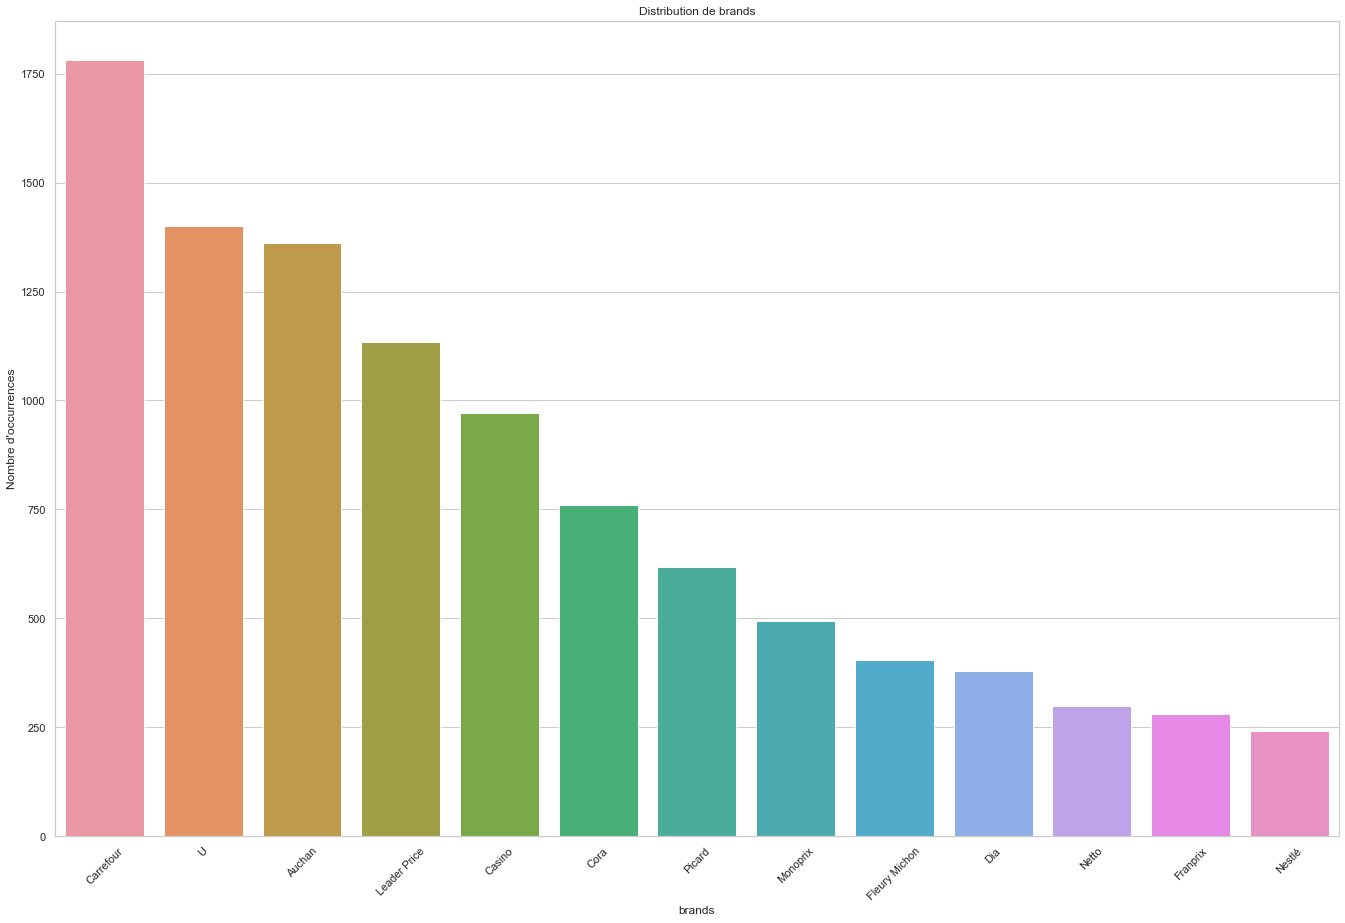

Les deux élements avec les plus grandes occurrences sont : Carrefour  et  U
Carrefour = 1782 occurrences
U = 1401 occurrences



--------
pnns_groups_1
--------
les valeurs uniques: 10
les valeurs dupliquées: 44448


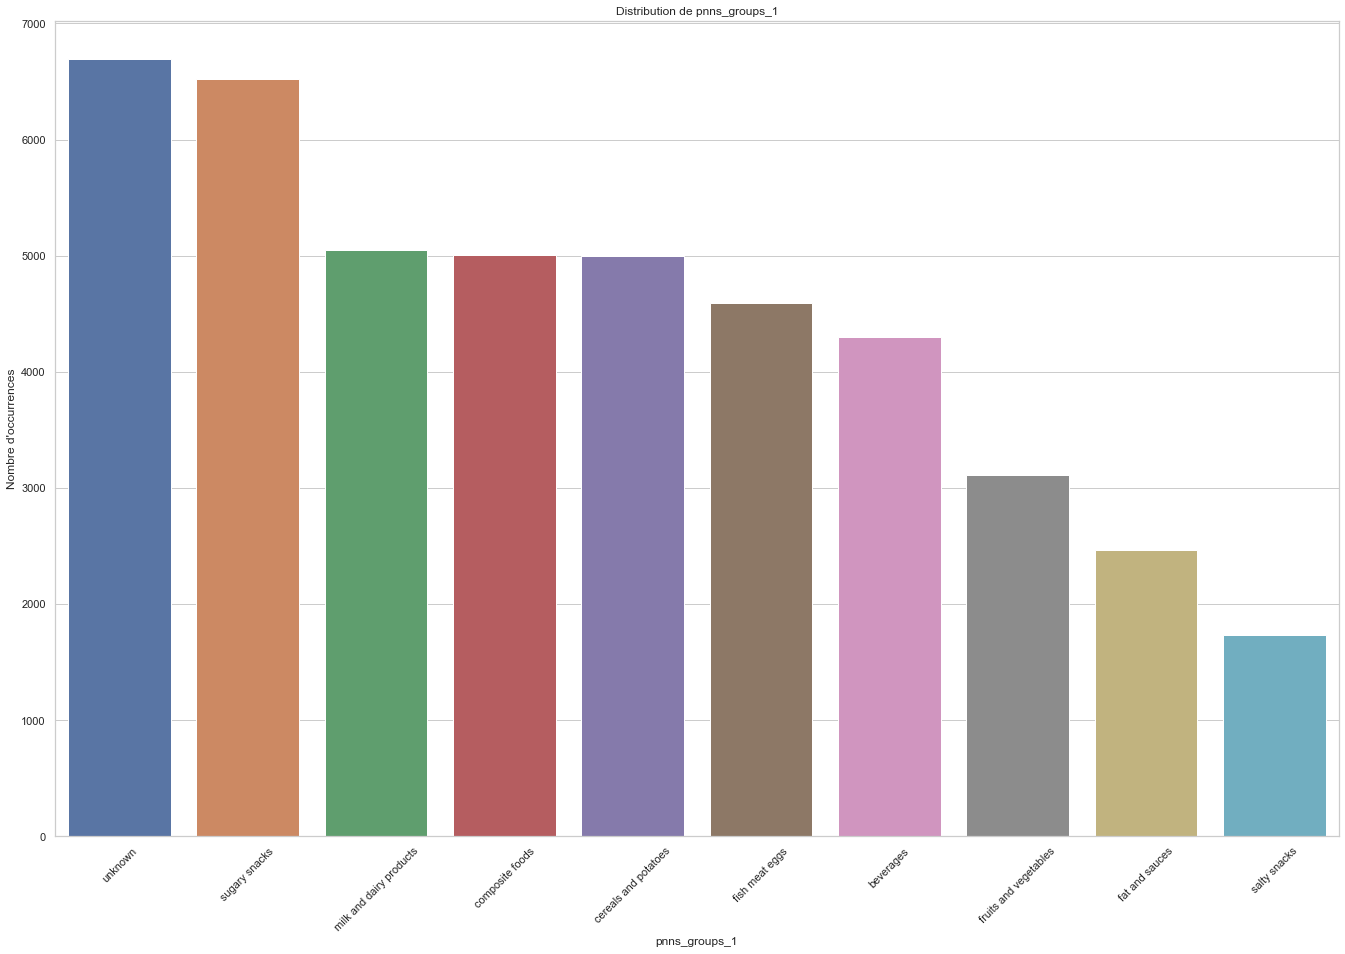

Les deux élements avec les plus grandes occurrences sont : unknown  et  sugary snacks
unknown = 6690 occurrences
sugary snacks = 6524 occurrences



--------
nutrition_grade_fr
--------
les valeurs uniques: 5
les valeurs dupliquées: 44453


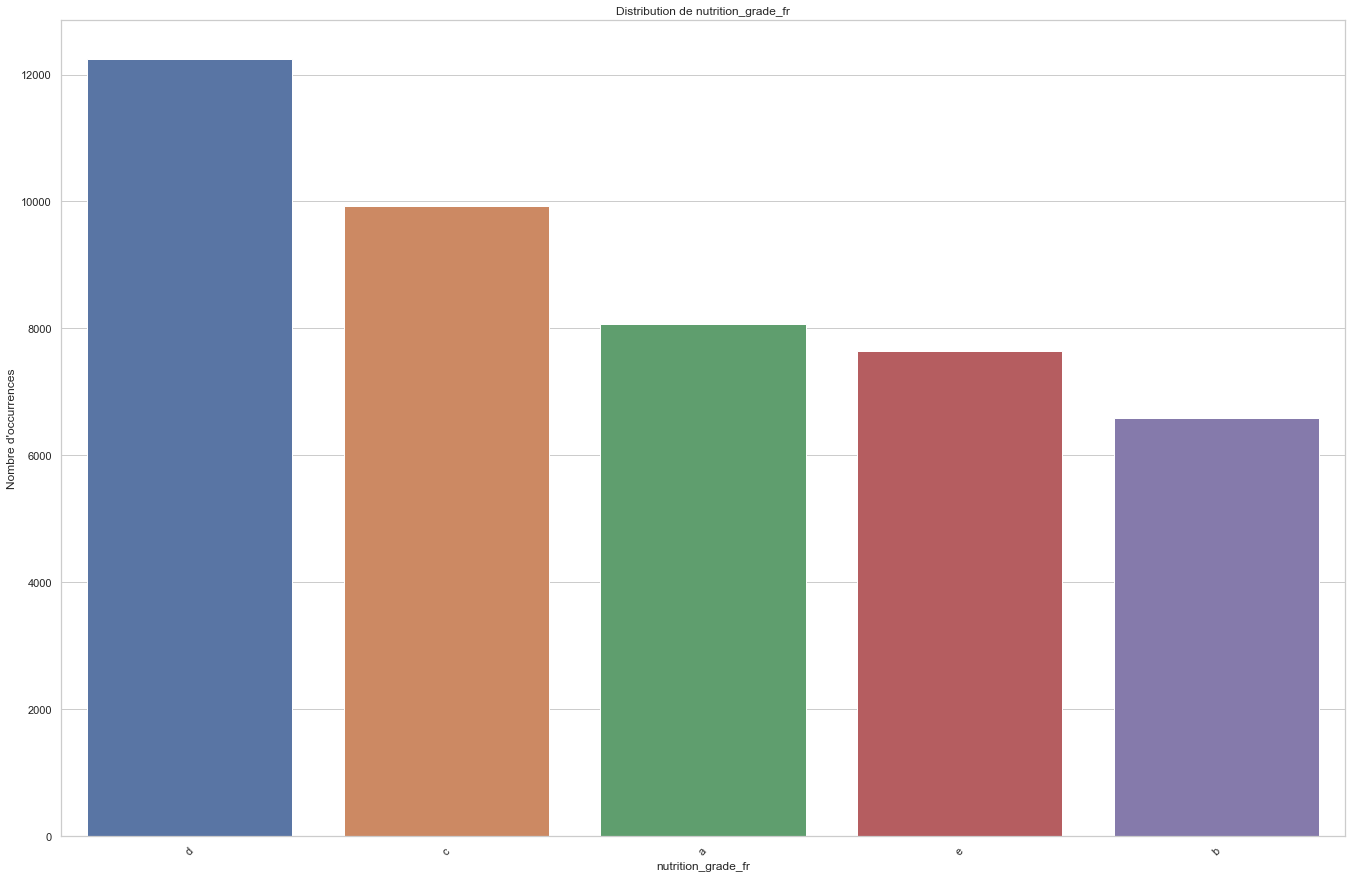

Les deux élements avec les plus grandes occurrences sont : d  et  c
d = 12242 occurrences
c = 9923 occurrences





In [ ]:
diagramme_barplot(features_categorielle_object)

**Conclusion:**

On a 3 diagrammes qui montre la distribution sur les 3 variables :
1. la colonne **product name**: le premier diagramme montre la distribution des différentes produits, et voici le classement:\
.Orange : C’est le produit le plus abondant avec près de 34 articles.\
.Tomato Ketchup  : C’est le deuxième produit le plus abondant.\
.Haricots Rouge : Il se trouve en troisième position.

2. La colonne brands: le deuxième diagramme montre la distribution des produits selon la maqrue, et voici le classement des 3 premières marques:\
.Carrfour : c'est la marque la plus abandant avec 1782 produits.\
.U : C’est le deuxième produit le plus abondant.\
.Auchan : Il se trouve en troisième position.



3. La colonne **countries_fr**: le 3ème diagramme montre la distribution des produits selon leurs pays d'origine, dans notre example on a que la France qui est représenté.

4. La colonne **pnns_groups_1**: le 4ème diagramme montre la distribution des catégories des produits, et voici le classement des produits:\
.unknown : C’est la catégorie la plus abondante avec près de 6690 produits.\
.sugary snacks : C’est la deuxième catégorie la plus abondante avec plus de 6524 produits.\
.milk and dairy products : Cette catégorie se trouve en troisième position.\
.composite foods : C’est la quatrième catégorie la plus courante.\
.cereals and potatoes : Cette catégorie est également fréquente.\
.beverages : Les boissons sont représentées dans cette catégorie.\
.fish meat eggs : Cette catégorie inclut les produits à base de poisson, de viande et d’œufs.\
.fruits and vegetables : Les fruits et légumes sont regroupés ici.\
.salty snacks : Il se trouve en dernière position parmi les catégories.
 

5. La colonne **nutrition_grade_fr**: le 5ème diagramme montre la distribution des produits selon leur note nutritionelle, et voici le classement de ces notes:\
.Grade D : C’est le grade le plus courant pour ces produits, avec un nombre significativement plus élevé que les autres grades.\
.Grade C : C’est le deuxième grade le plus courant, mais avec un nombre de produits nettement inférieur à celui du grade D.\
.Grade A : C’est le troisième grade le plus courant.\
.Grade E : C’est le quatrième grade le plus courant.\
.Grade B : C’est le grade le moins courant.


2. 2. **Type datetime:**

Dans cette partie, nous allons créer un graphe de type barplot pour visualiser le nombre de produits introduits chaque année. Voici les étapes à suivre :

1. Création d'un nouveau DataFrame nommé 'data' contenant uniquement les colonnes 'created_datetime', 'last_modified_datetime' et 'product_name'.

2. Extraction de l'année à partir des colonnes datetime 'created_datetime' et 'last_modified_datetime' pour obtenir deux nouvelles colonnes : 'created_datetime_year' et 'last_modified_datetime_year'.

3. Affichage du barplot pour chacune des colonnes nouvellement créées.

1. **Création de la dataframe 'data':**

In [ ]:
import warnings

# Ignore les avertissements
warnings.filterwarnings("ignore")

# Création d'une nouvelle dataframe data et selectionner les colonnes 'created_datetime', 'last_modified_datetime'et 'product_name'
data = df[['created_datetime', 'last_modified_datetime', 'product_name']]

display(data)


created_datetime    last_modified_datetime  \
0     2015-01-25 21:35:01+00:00 2017-03-09 10:34:27+00:00   
1     2012-08-15 09:48:28+00:00 2015-08-09 17:35:31+00:00   
2     2015-06-06 10:28:06+00:00 2015-06-06 11:13:26+00:00   
3     2016-10-20 07:19:01+00:00 2016-10-20 09:14:39+00:00   
4     2016-12-15 22:15:44+00:00 2016-12-15 22:24:04+00:00   
...                         ...                       ...   
46027 2015-03-14 14:32:26+00:00 2015-10-20 08:10:28+00:00   
46028 2016-12-22 07:02:13+00:00 2016-12-24 15:49:30+00:00   
46029 2017-01-23 16:57:57+00:00 2017-04-02 15:15:34+00:00   
46030 2015-07-25 09:47:06+00:00 2015-09-14 13:37:28+00:00   
46031 2013-04-28 15:30:39+00:00 2013-06-20 01:09:16+00:00   

                              product_name  
0                           Lion Peanut x2  
1                    Pepsi, Nouveau goût !  
2                                      7Up  
3                        Madeleines nature  
4                            Cakes Raisins  
...                                    ...  
46027                Spearmint sans sucres  
46028       Fisherman's Friend Miel-Citron  
46029  Nature cheddar and red onion crisps  
46030  Tartines craquantes bio au sarrasin  
46031                   Thé vert Earl grey  

[44458 rows x 3 columns]

2. **Création des colonnes 'created_datetime_year'et 'last_modified_datetime_year':**

In [ ]:
# Ajouter deux nouvelles colonnes 'created_datetime_year'et 'last_modified_datetime_year'basées sur l'année
data['created_datetime_year'] = data.created_datetime.dt.year
data['last_modified_datetime_year'] = data.last_modified_datetime.dt.year

display(data)

created_datetime    last_modified_datetime  \
0     2015-01-25 21:35:01+00:00 2017-03-09 10:34:27+00:00   
1     2012-08-15 09:48:28+00:00 2015-08-09 17:35:31+00:00   
2     2015-06-06 10:28:06+00:00 2015-06-06 11:13:26+00:00   
3     2016-10-20 07:19:01+00:00 2016-10-20 09:14:39+00:00   
4     2016-12-15 22:15:44+00:00 2016-12-15 22:24:04+00:00   
...                         ...                       ...   
46027 2015-03-14 14:32:26+00:00 2015-10-20 08:10:28+00:00   
46028 2016-12-22 07:02:13+00:00 2016-12-24 15:49:30+00:00   
46029 2017-01-23 16:57:57+00:00 2017-04-02 15:15:34+00:00   
46030 2015-07-25 09:47:06+00:00 2015-09-14 13:37:28+00:00   
46031 2013-04-28 15:30:39+00:00 2013-06-20 01:09:16+00:00   

                              product_name  created_datetime_year  \
0                           Lion Peanut x2                   2015   
1                    Pepsi, Nouveau goût !                   2012   
2                                      7Up                   2015   
3                        Madeleines nature                   2016   
4                            Cakes Raisins                   2016   
...                                    ...                    ...   
46027                Spearmint sans sucres                   2015   
46028       Fisherman's Friend Miel-Citron                   2016   
46029  Nature cheddar and red onion crisps                   2017   
46030  Tartines craquantes bio au sarrasin                   2015   
46031                   Thé vert Earl grey                   2013   

       last_modified_datetime_year  
0                             2017  
1                             2015  
2                             2015  
3                             2016  
4                             2016  
...                            ...  
46027                         2015  
46028                         2016  
46029                         2017  
46030                         2015  
46031                         2013  

[44458 rows x 5 columns]

In [ ]:
# Mettre ces deux colonnes dans une liste
features_categorielle_datetime_year = ['created_datetime_year', 'last_modified_datetime_year']

3. **Affichage du barplot des deux colonnes 'created_datetime_year'et 'last_modified_datetime_year':**

In [ ]:
def diagrammes_datetime(list_date):

    for col in list_date:
        print('--------')   
        print(col)
        print('--------')
        print('les valeurs uniques:', data[col].nunique())
        print('les valeurs dupliquées:', data[col].duplicated().sum())

        #Afficher maximum 13 valeurs uniques
        unique_counts  = data[col].value_counts().head(13) 
        plt.figure(figsize=(23, 10))
        sns.barplot(x=unique_counts.index, y=unique_counts.values)
        plt.xlabel(col)
        plt.ylabel('Nombre d\'occurrences')
        plt.title('Distribution de '+ col)
        plt.show() 
        print('Les deux élements avec les plus grandes occurrences sont :',unique_counts[0:3].index[0],' et ', unique_counts[0:3].index[1])
        print(unique_counts[0:3].index[0], '=', unique_counts[0:3].values[0], 'occurrences' )
        print( unique_counts[0:3].index[1], '=', unique_counts[0:3].values[1], 'occurrences' )
        print('\n'*2)

--------
created_datetime_year
--------
les valeurs uniques: 6
les valeurs dupliquées: 44452


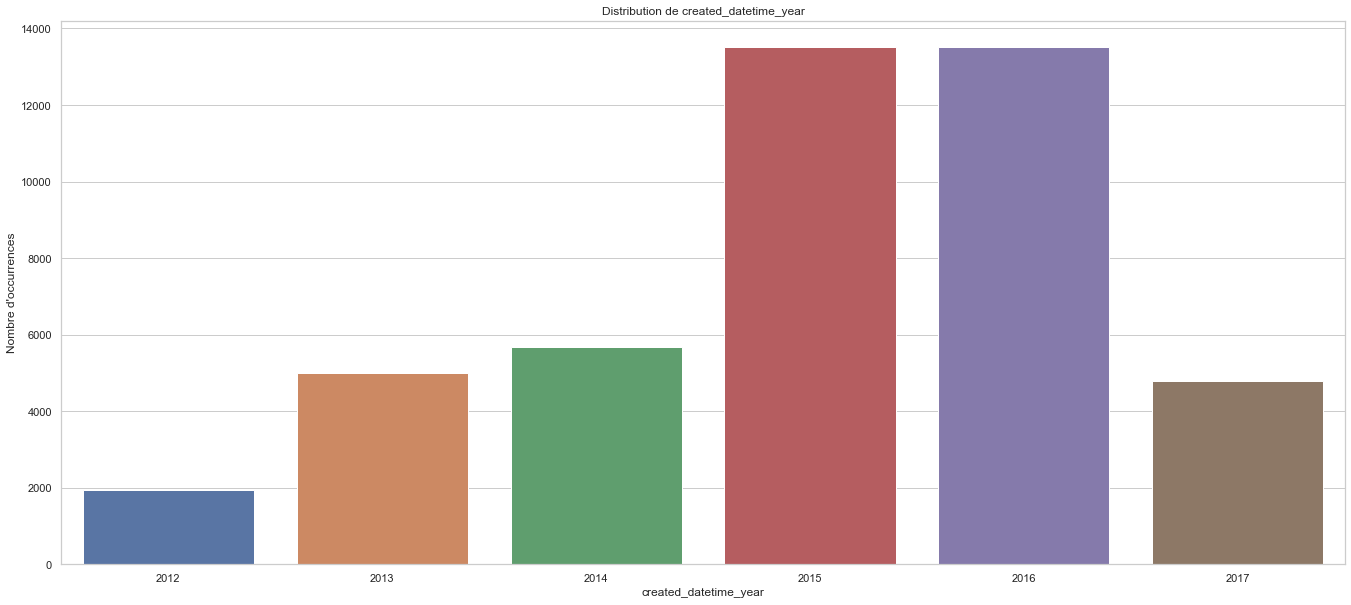

Les deux élements avec les plus grandes occurrences sont : 2015  et  2016
2015 = 13528 occurrences
2016 = 13505 occurrences



--------
last_modified_datetime_year
--------
les valeurs uniques: 6
les valeurs dupliquées: 44452


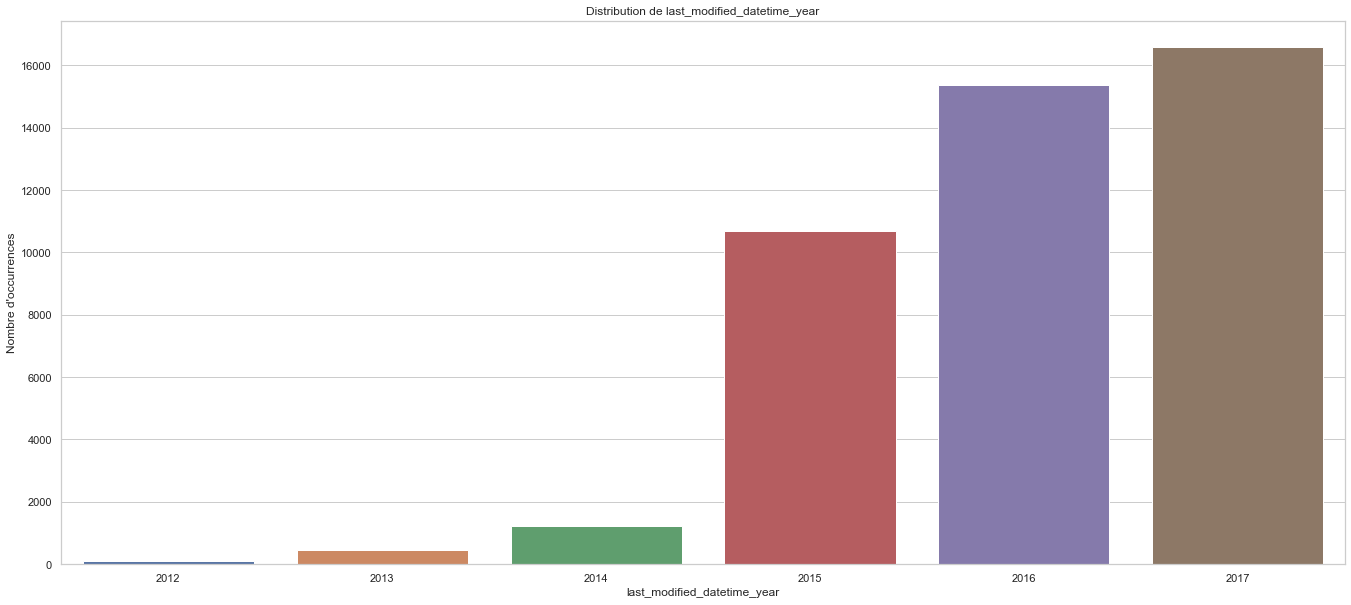

Les deux élements avec les plus grandes occurrences sont : 2017  et  2016
2017 = 16599 occurrences
2016 = 15357 occurrences





In [ ]:
diagrammes_datetime(features_categorielle_datetime_year)

**Conclusion:** Comme le montrent les graphiques de distributionnous, nous observons que la majorité des données, ou des produits, ont été introduites en 2015 et 2016. modifiées pour la dernière fois en l’année 2017.

3. **Pourcentage de produits dans chaque catégorie de nutrition_grade:**

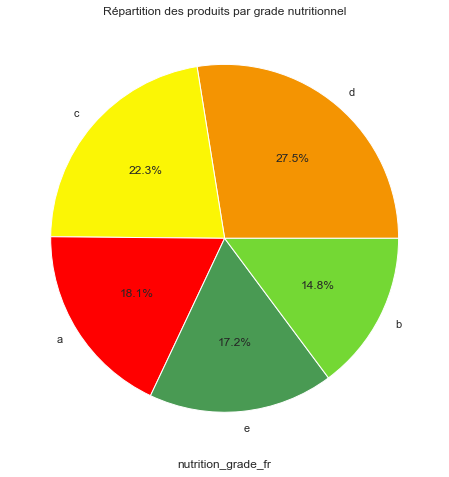

In [ ]:
# Obtenir les données pour le diagramme Pie
colors = [ "#F49402", "#FBF605", "#FF0000", "#499A53", "#74D834"]
labels = df.nutrition_grade_fr.value_counts().index.tolist()
sizes = df.nutrition_grade_fr.value_counts().values

# Pie plot, % de produits dans chaque catégorie de nutrition_grade
plt.figure(figsize=(12,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Répartition des produits par grade nutritionnel")
plt.xlabel("nutrition_grade_fr")
# plt.axis('equal') 
plt.show()

**Conclusion:** La distribution des produits dans chaque catégorie est généralement déséquilibrée, 

### **Analyse bi-variée :**

#### **Features numériques entre elles :**

1. **Analyse avec la matrice de corrélation "Heatmap":**

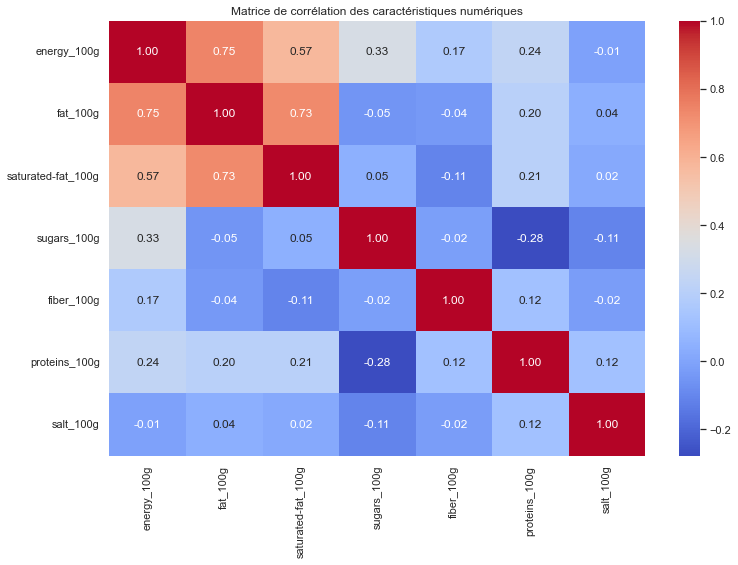

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df[features_numerique].corr()

# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques numériques')
plt.show()


2. **Analyse avec nuages de points:**

In [ ]:
#Selectionner les colonnes numérique + la colonne nutrition_grade
features_numerique_nutrition_grade = features_numerique + ['nutrition_grade_fr']
features_numerique_nutrition_grade


['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition_grade_fr']

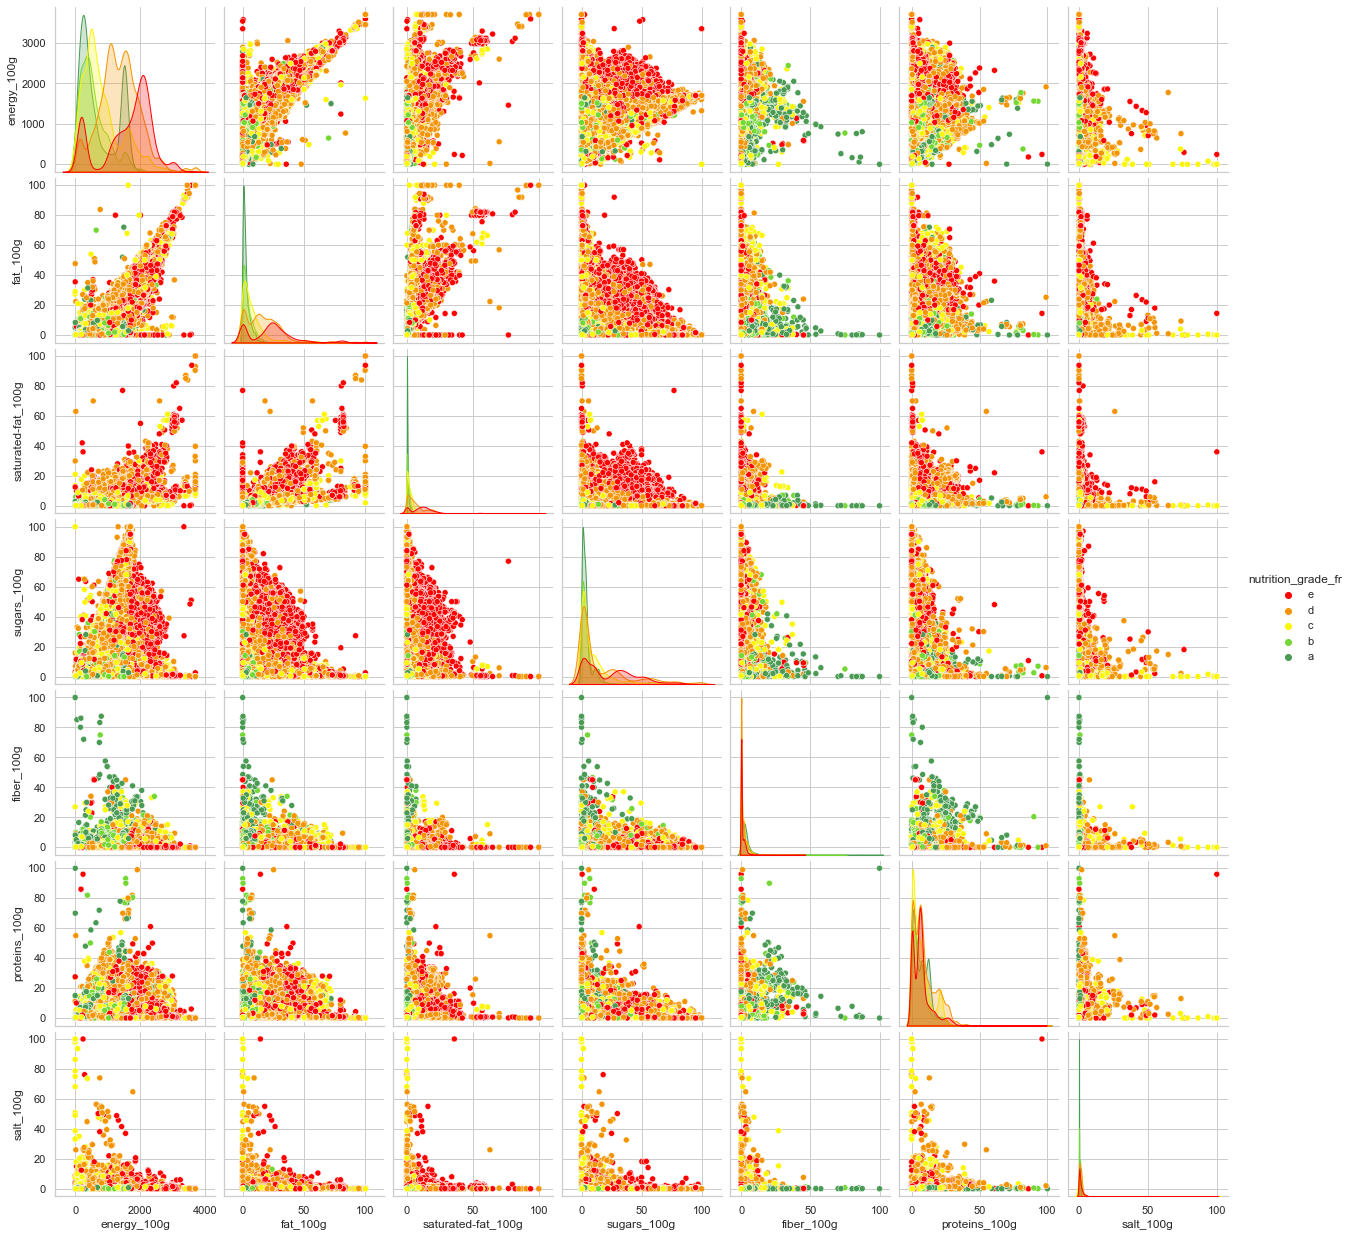

In [ ]:
# Utiliser pairplot de Seaborn
sns.pairplot(df[features_numerique_nutrition_grade], hue='nutrition_grade_fr', hue_order=['e','d','c','b','a'], palette={'a':"#499A53", 'b':"#74D834", 'c':"#FBF605", 'd':"#F49402", 'e':"#FF0000"})
plt.show()

**Conclusion:** 

Nous observons sur la matrice de corrélation que:

1. Il y a une forte corrélation de 0.75 entre l'énergie 'energy_100g' et les matières grasses 'fat_100g.Cela signifie que lorsque la teneur en matières grasses d’un produit augmente, sa teneur en énergie augmente également. C’est logique car les matières grasses sont une source dense d’énergie.

2. Il y a une forte corrélation positive de 0.73 entre la matière grasse 'fat_100g' et les matières grasses saturées 'saturated-fat_100g'. Cela est attendu car les matières grasses saturées sont un type de matières grasses.

3. Il y a une corrélation positive modérée de 0.57 entre l’énergie 'energy_100g' et les matières grasses saturées 'saturated-fat_100g'. Cela suggère que les produits à haute teneur en matières grasses saturées ont tendance à avoir une teneur en énergie plus élevée, ce qui est cohérent avec le fait que les matières grasses sont une source dense d’énergie.

4. Il y a une corrélation positive faible de 0.33 entre l’énergie 'energy_100g' et les sucres 'sugars_100g'. Cela indique que les produits à haute teneur en sucre ont tendance à avoir une teneur en énergie légèrement plus élevée, ce qui est logique car les sucres sont une source d’énergie.

5. Il y a une corrélation positive faible de 0.17 entre l’énergie et les fibres, ainsi qu’entre l’énergie et les protéines de 0.24. Cela suggère que les produits à haute teneur en fibres ou en protéines ont tendance à avoir une teneur en énergie légèrement plus élevée.

6. Il y a très peu de corrélation de -0.01 entre l’énergie et le sel. Cela suggère que la teneur en sel d’un produit n’a pas beaucoup d’impact sur sa teneur en énergie.

Ces valeurs de corrélation sont confirmées dans le graphique de nuages de points. Par exemple, on voit une relation linéaire entre l’énergie ‘energy_100g’ et les matières grasses ‘fat_100g’, et entre les matières grasses ‘fat_100g’ et les matières grasses saturées ‘saturated-fat_100g’.

Nous pouvons également observer sur le graphique de nuages de points que les produits avec une note nutritionnelle ‘e’ (rouge) ont tendance à avoir une teneur plus élevée en énergie, en matières grasses et en matières grasses saturées, ce qui pénalise le Nutri-Score (nutrition_grade_fr). Cela signifie que plus un produit contient de matières grasses et de matières grasses saturées, plus il est susceptible d’avoir une note nutritionnelle plus mauvaise."

#### **Feature numérique / feature catégorielle :**
$ \eta ^2 $ : eta square

**Analyse avec box plot selon le pnns_groups_1:**

In [ ]:
def anovatest(data, X_cat, Y_num):
    # Extraction des modalités de la variable catégorielle
    modalites = df[X_cat].unique()
    # Création d'une liste de groupes de données pour chaque modalité
    groupes = []
    for m in modalites:
        groupes.append(df[df[X_cat]==m][Y_num])

    # Propriétés graphiques pour le boxplot
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    
    # Calcul de l'Eta carré
    moyenne_y = df[Y_num].mean()
    classes = []
    for classe in df[X_cat].unique():
        yi_classe = df[Y_num][df[X_cat]==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in df[Y_num]]) # SCT: la somme des carrés totale (variance totale)
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # SCE: la somme des carrés expliqués (variance interclasses)
    eta_square = round(SCE/SCT,3) # le pourcentage de la variance expliqué ou ratio de variance expliqué. 

    # Création et affichage du boxplot
    plt.figure(figsize=(23, 10))
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.xlabel(f"{Y_num}",fontsize=14)
    plt.ylabel(f"{X_cat}",fontsize=14)
    plt.title(f"Box plot entre {X_cat} et {Y_num} - Eta_square: {eta_square}",  fontsize=14)
    plt.show()


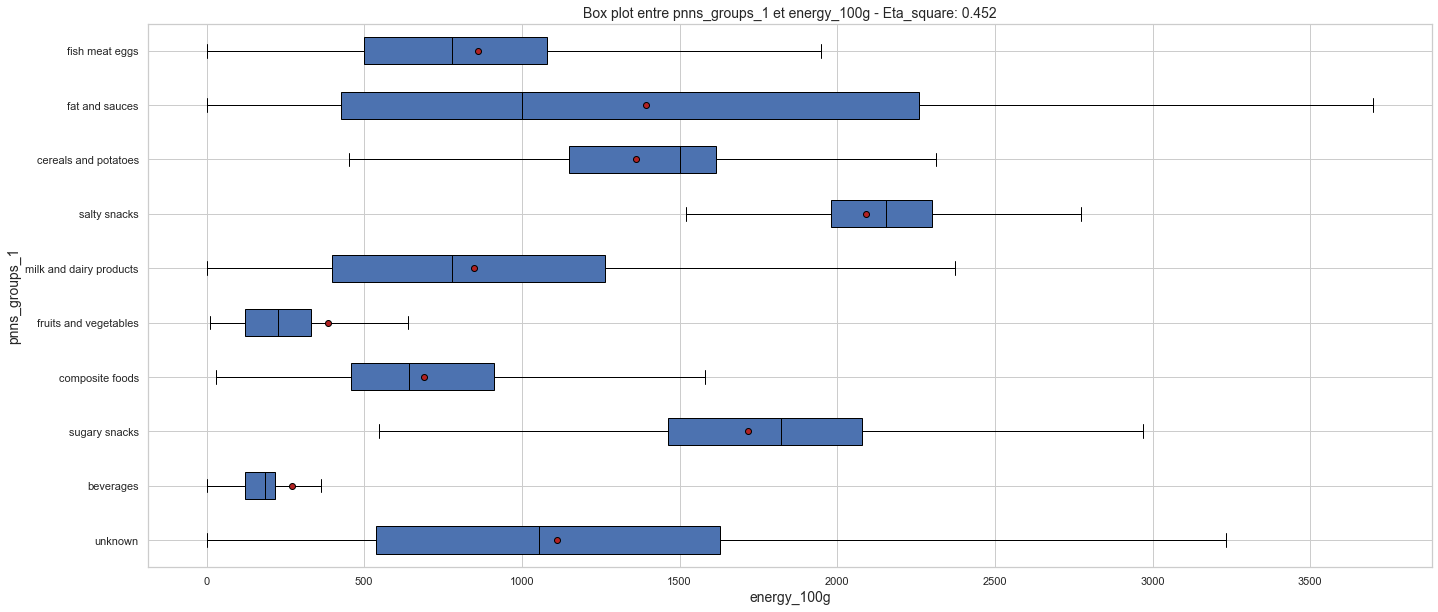

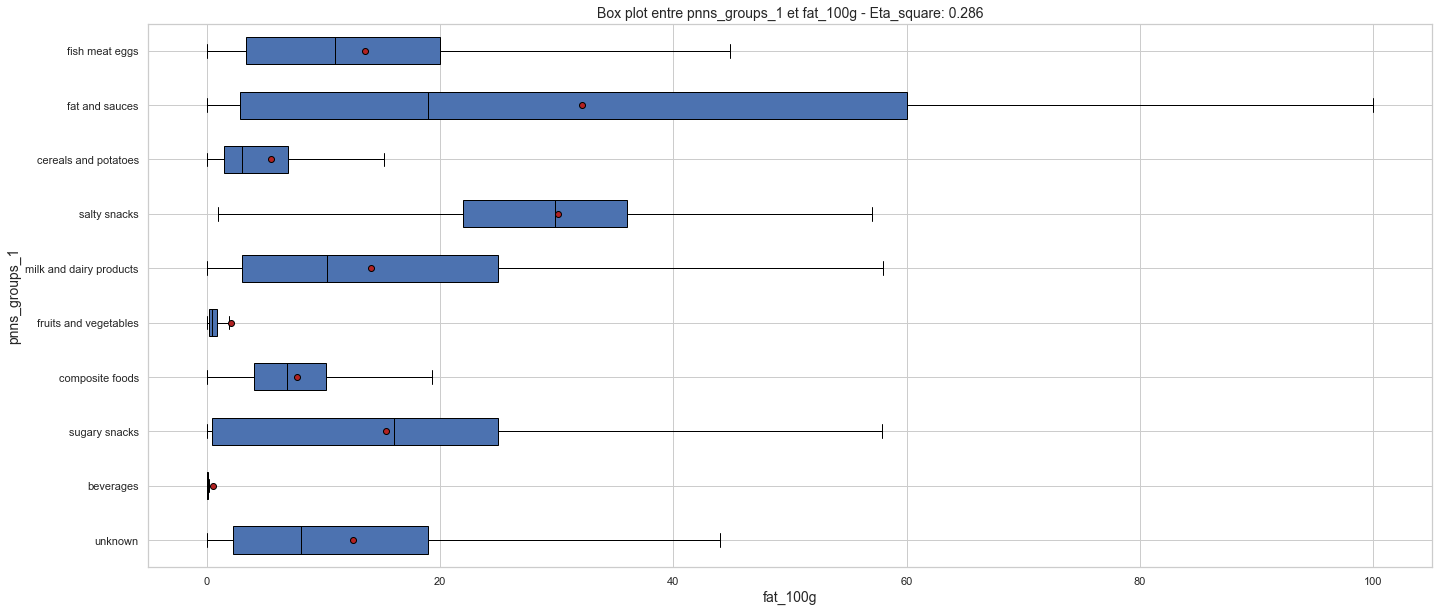

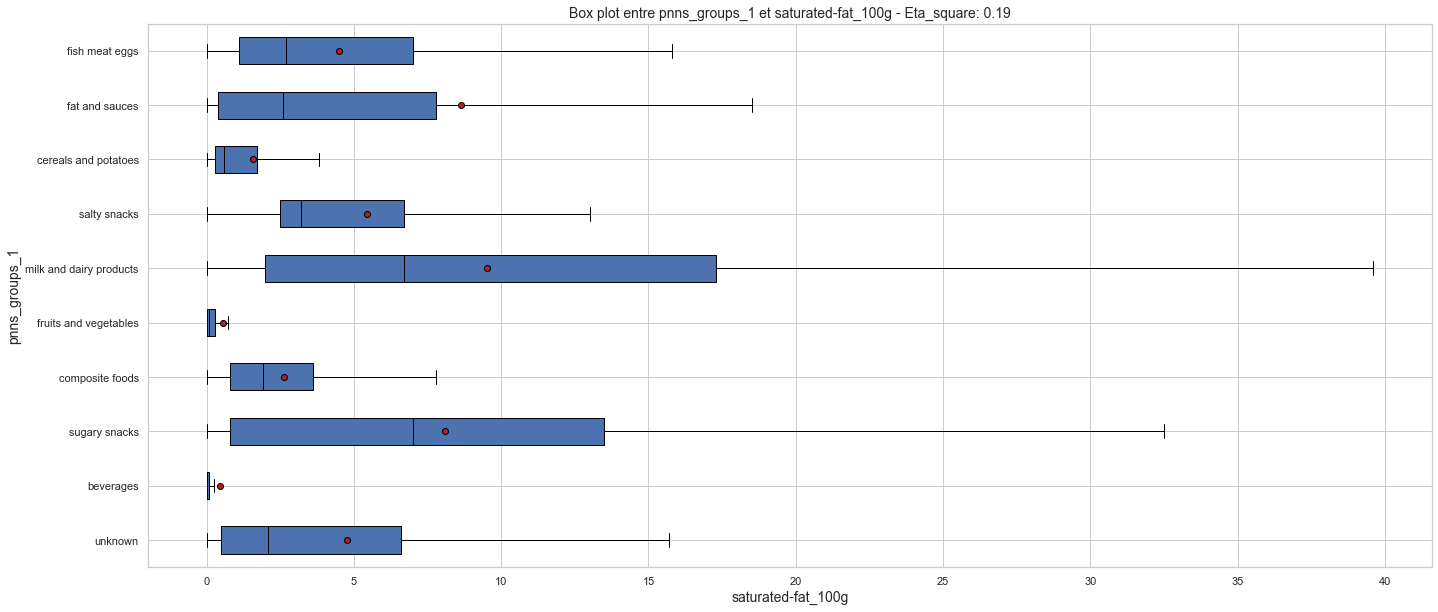

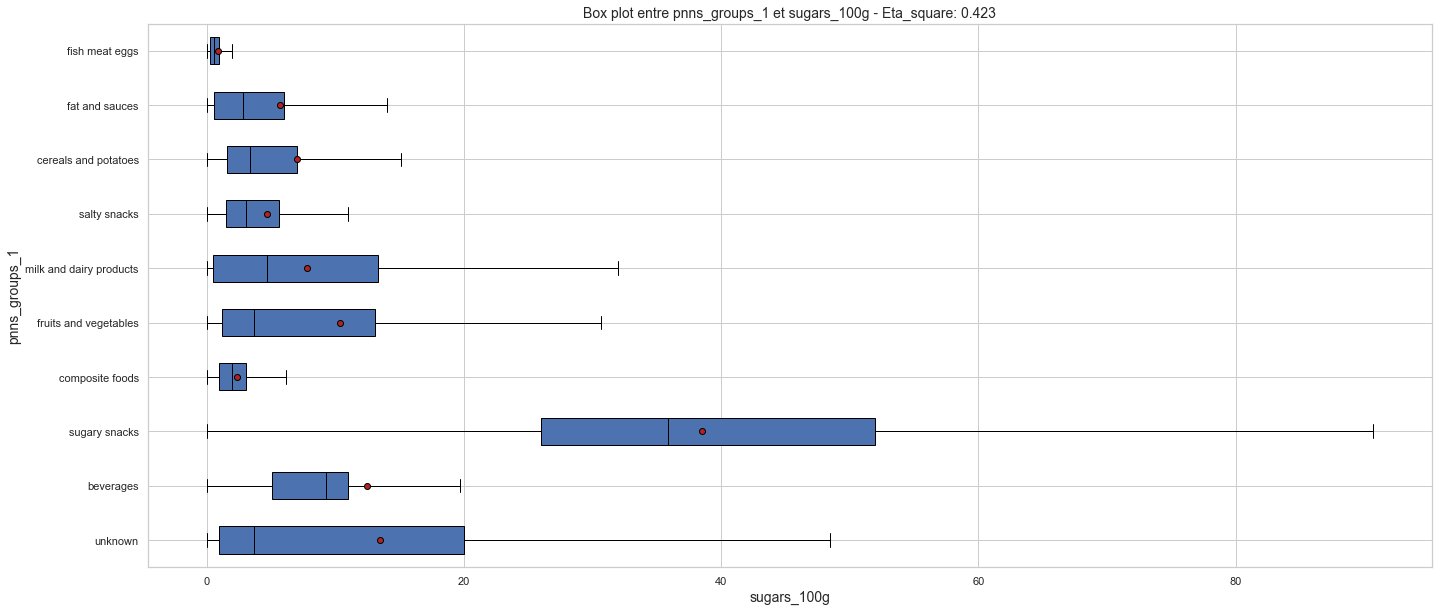

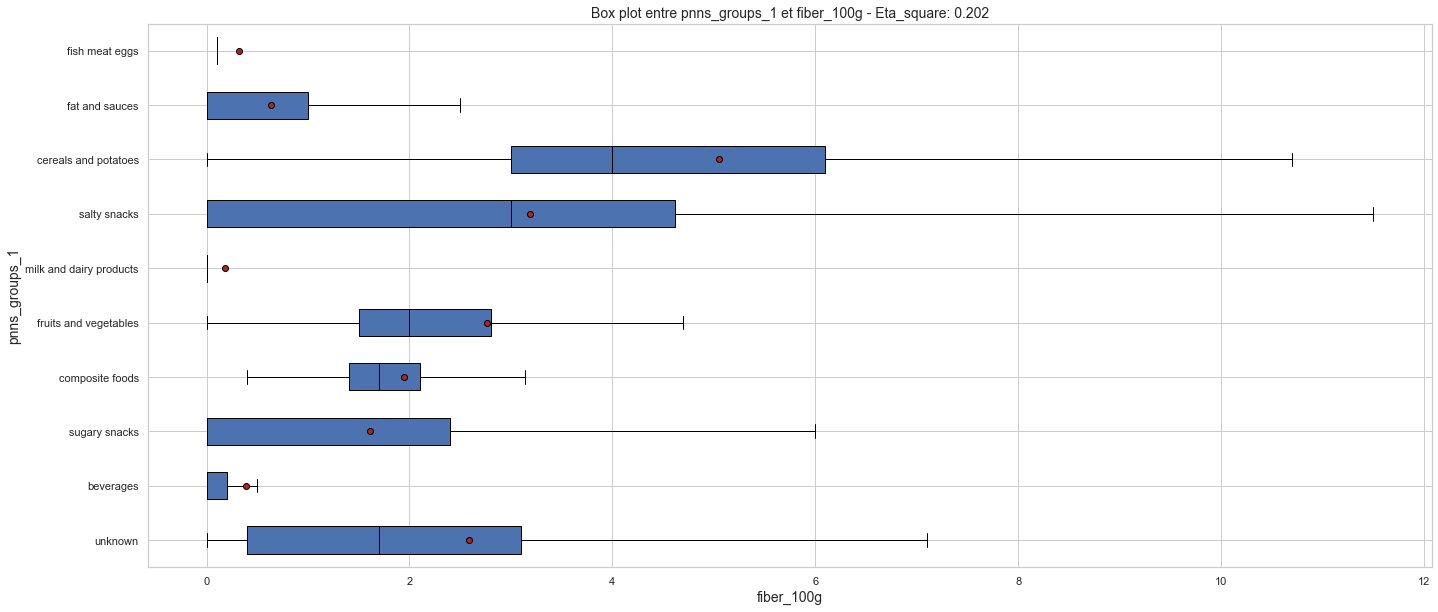

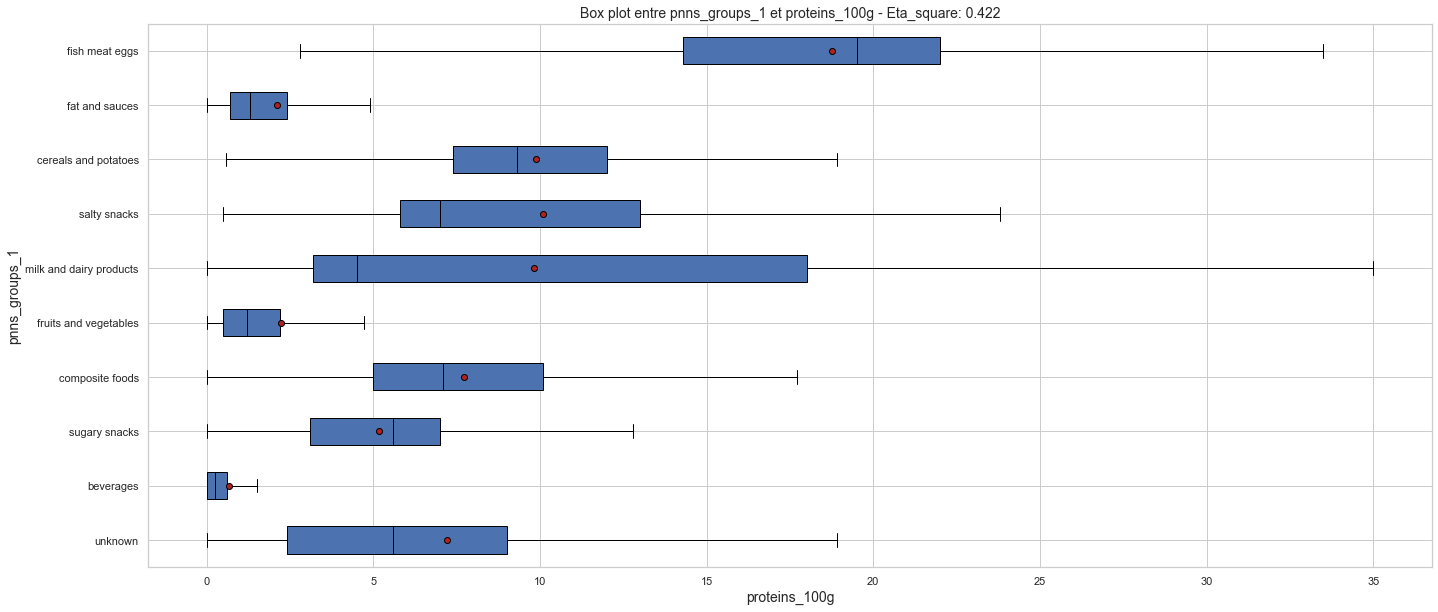

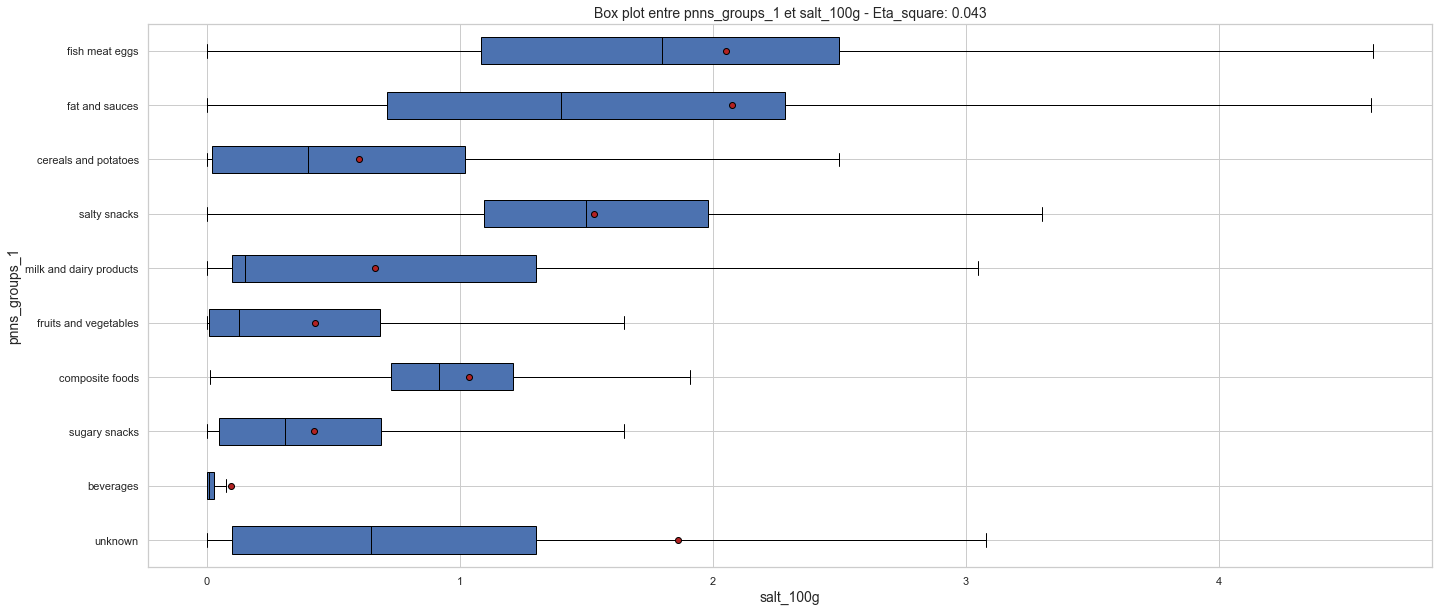

In [ ]:
for col in features_numerique:
    anovatest(df, "pnns_groups_1", col)

**Conclusion:**

- Pour les variables ‘energy_100g’, ‘sugars_100g’ et ‘proteins_100g’, l’Eta carré (η²) est supérieur à 0.4. Cela indique qu’une proportion importante de la variance peut être expliquée par les catégories du ‘pnns_groups_1’. En d’autres termes, ces variables sont fortement influencées par les catégories du ‘pnns_groups_1’.

- Pour les variables ‘fat_100g’, ‘saturated-fat_100g’ et ‘fiber_100g’, l’Eta carré (η²) est compris entre 0.19 et 0.28. Cela indique qu’une proportion modérée de la variance peut être expliquée par les catégories du ‘pnns_groups_1’. En d’autres termes, ces variables sont modérément influencées par les catégories du ‘pnns_groups_1’.

- Pour la variable ‘salt_100g’, l’Eta carré (η²) est de 0.043. Cela indique qu’une très faible proportion de la variance peut être expliquée par les catégories du ‘pnns_groups_1’. En d’autres termes, cette variable est très faiblement influencée par les catégories du ‘pnns_groups_1’.


**On remarque que pour la distribution des graphiques :**


- Les variables 'energy_100g' et 'fat_100g' présentent une distribution étendue pour la catégorie 'fat and sauces'. Cela indique que les produits de cette catégorie ont une grande variabilité en termes de contenu énergétique et de teneur en matières grasses. Cette diversité suggère une large gamme de produits différents inclus dans la catégorie 'fat and sauces'.

- La variable 'saturated-fat_100g' présente une distribution étendue pour la catégorie 'milk and dairy products'. Cela signifie que les produits de la catégorie 'milk and dairy products' ont une grande variabilité en termes de teneur en matières grasses saturées, ce qui peut indiquer une diversité dans les types de produits inclus dans cette catégorie.

- La variable 'sugars_100g' présente une distribution étendue pour la catégorie 'sugary snacks'. Cela signifie que les produits de la catégorie 'sugary snacks' ont une grande variabilité en termes de sucre, ce qui peut indiquer une diversité dans les types de produits inclus dans cette catégorie.

- La variable 'fiber_100g' présente une distribution étendue pour la catégorie 'cereals and potatoes'. Cela signifie que les produits de la catégorie 'cereals and potatoes' ont une grande variabilité en termes de fibres, ce qui peut indiquer une diversité dans les types de produits inclus dans cette catégorie.

- La variable 'proteins_100g' présente une distribution étendue pour les catégoris 'fish meat eggs et milk and dairy products'. Cela signifie que les produits de ces catégorie ont une grande variabilité en termes de proteines, ce qui peut indiquer une diversité dans les types de produits inclus dans ces deux catégories.

- La variable ‘salt_100g’ présente également une distribution étendue pour les catégories ‘fish meat eggs’ et ‘fat and sauces’. Cela signifie que les produits de ces catégories ont une grande variabilité en termes de sel, ce qui peut indiquer une diversité dans les types de produits inclus dans ces deux catégories.


#### **Feature catégorielle / feature catégorielle:**

1. **Analyser la relation entre les deux variables catégorielle 'nutrition_grade_fr' et 'pnns_groups_1' avec le khi-deux:**

Le test du khi-deux de Pearson est un test d’hypothèse utilisé pour déterminer s’il existe une association significative entre deux variables catégorielles dans les données. Le test repose sur deux hypothèses (H0 et H1) :

- H0 : Les deux variables catégorielles n’ont pas de relation (indépendantes)
- H1 : Il existe une relation (dépendante) entre deux variables catégorielles

In [ ]:
def test_khi_deux(X,Y):
    print('----'*17)
    print(f"La table de contingence entre {X} et {Y}")
    crosstable = pd.crosstab(df['pnns_groups_1'], df['nutrition_grade_fr'], margins=True, margins_name="Total")
    print('----'*17)
    display(crosstable)
    print('---------------')
    print('Résultats:')
    print('---------------')
    result = stats.chi2_contingency(crosstable)
    print("La valeur du chi square: ", result[0])
    print("La valeur du P value: ", result[1])
    

In [ ]:
test_khi_deux('pnns_groups_1', 'nutrition_grade_fr' )

--------------------------------------------------------------------
La table de contingence entre pnns_groups_1 et nutrition_grade_fr
--------------------------------------------------------------------


nutrition_grade_fr          a     b     c      d     e  Total
pnns_groups_1                                                
beverages                 149   536  1239    698  1679   4301
cereals and potatoes     2542   805  1008    583    59   4997
composite foods          1175  1593  1368    803    65   5004
fat and sauces             74   188   685   1072   445   2464
fish meat eggs            428   590  1300   1347   925   4590
fruits and vegetables    2225   550   303     27     1   3106
milk and dairy products   372   914  1316   2232   212   5046
salty snacks               39    62   459    893   283   1736
sugary snacks              50   256   668   2681  2869   6524
unknown                  1009  1095  1577   1906  1103   6690
Total                    8063  6589  9923  12242  7641  44458

---------------
Résultats:
---------------
La valeur du chi square:  23113.449888501083
La valeur du P value:  0.0


**Conclusion:**

D’après les résultats du test du khi-deux (**Valeur du Chi-carré : 23113.449888501083**, **Valeur p : 0.0**) , la valeur p est de 0, ce qui est inférieur au seuil de signification généralement utilisé de 0,05. Cela signifie qu'on' rejete l’hypothèse nulle (H0) qui stipule que les deux variables catégorielles sont indépendantes. Par conséquent, on accepte l’hypothèse alternative (H1) qui stipule qu’il existe une relation entre les deux variables catégorielles. En d’autres termes, les deux variables catégorielles sont dépendantes.

## **Etape 5: Analyse multi-variée:**

### **ACP – Analyse multi-variée descriptive:** 

#### 1. **Réalisation d'un 'ébouli':**

1. 1. **Selectionner les variables numériques et la variable nutrition_grade_fr:**

In [ ]:
# Selectionner les valeurs numériques
X = df[features_numerique]
X.head()

energy_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0       1883.0      20.0                12.5         57.5         2.5   
1        177.0       0.0                 0.0         10.4         0.0   
2        177.0       0.0                 0.0         10.4         0.0   
3       1900.0      23.0                 2.5         26.0         1.5   
4       1768.0      19.0                 2.5         28.0         1.8   

   proteins_100g  salt_100g  
0            2.5    0.09652  
1            0.0    0.02540  
2            0.0    0.10000  
3            6.0    0.66000  
4            5.8    0.65000

In [ ]:
# Sélectionner la variable nutrition_grade_fr
nutrition_grade = df['nutrition_grade_fr']
nutrition_grade.head()

0    e
1    e
2    e
3    d
4    d
Name: nutrition_grade_fr, dtype: object

1. 2. **Trouver le nombre de composantes principales à utiliser:**

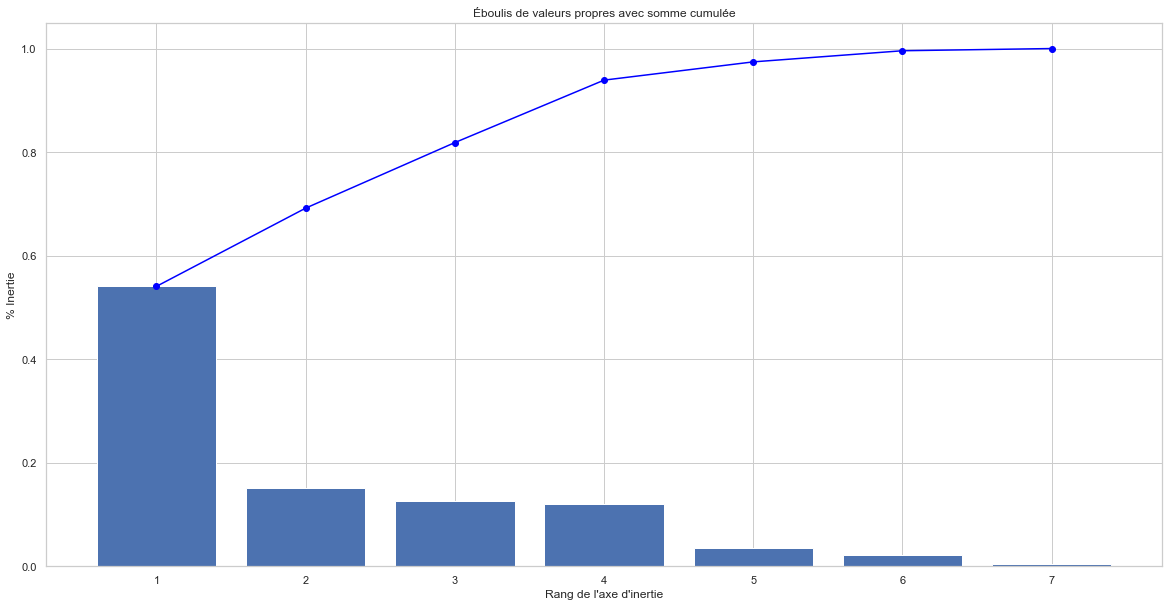

In [ ]:
# Normalisation des données
scaler = RobustScaler() # cette méthode RobustScaler() a remplacé la méthode StandardScaler(), car elle est ideal pour les données contenant des valeurs aberrantes
# scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'analyse en composantes principales (PCA)
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

# Cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

# Visualisation des résultats
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(explained_variance_ratio)) + 1, explained_variance_ratio)
plt.plot(np.arange(len(explained_variance_ratio)) + 1, cumulative_variance_ratio, c="blue", marker='o')

plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("% Inertie")
plt.title("Éboulis de valeurs propres avec somme cumulée")
plt.show()

Le nombre de composantes principales à utiliser peut être ajusté en fonction de la variance cumulée souhaitée. Dans notre cas, nous allons conserver uniquement 4 composantes qui expliquent 90% de la variance:

In [ ]:
# Nombre de composantes principales à utiliser 
mask = cumulative_variance_ratio >= 0.90
n_components = len(cumulative_variance_ratio[mask]) 
print ('Le Nombre de composantes principales à utiliser est:', n_components, 'composantes.')

Le Nombre de composantes principales à utiliser est: 4 composantes.


1. 3. **Réduction de la dimentionalité:**

In [ ]:
# Réduire la dimensionnalité des données en utilisant les composantes principales sélectionnées
pca = PCA(n_components=n_components)
X_projected = pca.fit_transform(X_scaled)
print(X_projected)

[[-1.01430603  2.03725119 -2.43582132  1.87450401]
 [-0.87279454 -1.06588471 -0.65086963 -0.97040157]
 [-0.81032199 -1.06646291 -0.65514298 -0.96783652]
 ...
 [ 0.31354344  0.1239381   1.39816656  1.21044143]
 [-0.26221479 -1.09192468  1.1837176   1.15050449]
 [-0.82070404 -1.24278305  0.01037155 -1.24770463]]


#### 2. **Cercle de corrélation:**

2. 1. **Créations la liste des tuples PC1_PC2, PC3_PC4 et PC5_PC6:** 

In [ ]:
# Voici la liste des tuples vide
list_tuples_projection = []

# Les tuples
PC1_PC2 = (0,1)
PC3_PC4 = (2,3)

# Ajout des des tuples PC1_PC2, PC3_PC4 et PC5_PC6 à liste
list_tuples_projection.append(PC1_PC2)
list_tuples_projection.append(PC3_PC4)
print('Voici la liste des 3 tuples: ', list_tuples_projection)

Voici la liste des 3 tuples:  [(0, 1), (2, 3)]


2. 2. **Affichage des cercles de corrélations:**

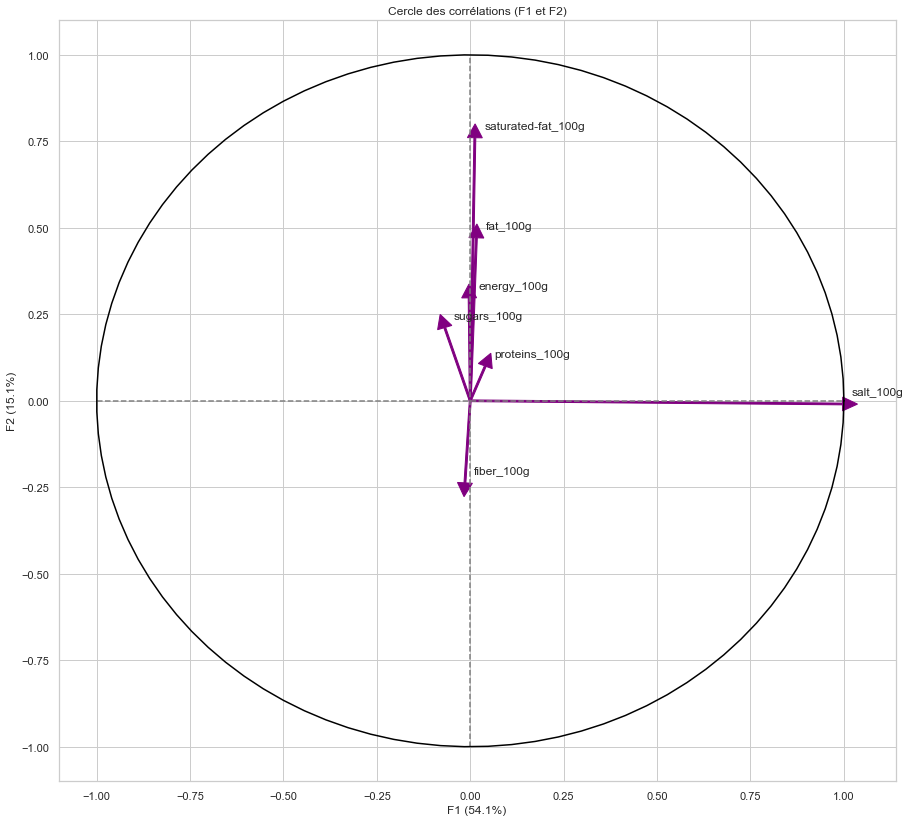

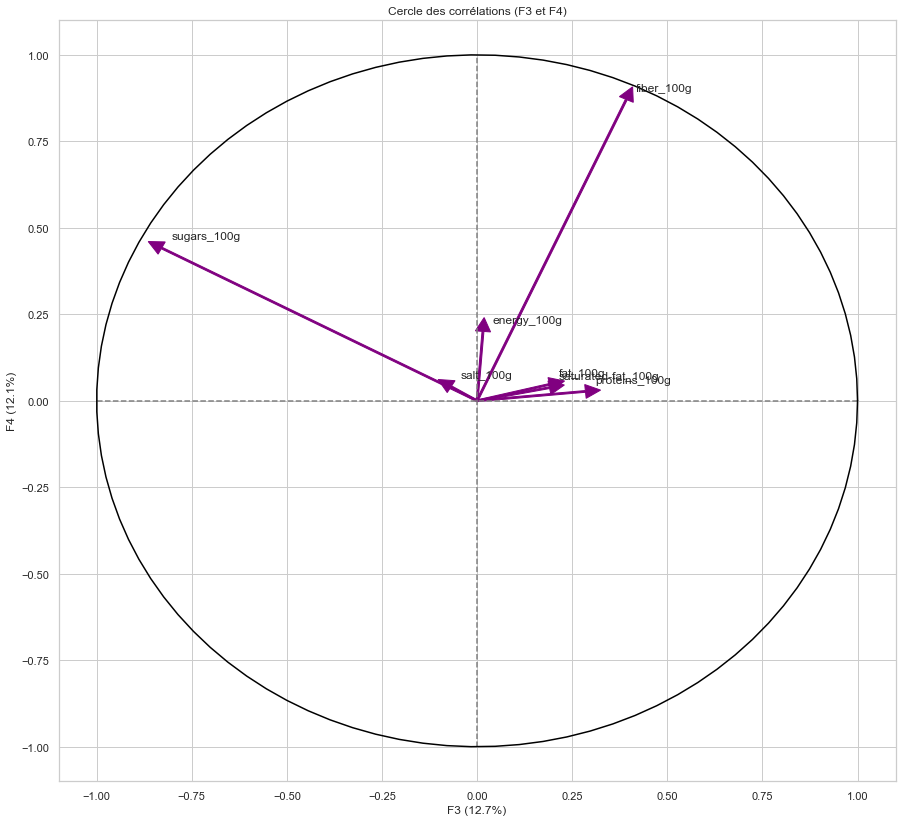

In [ ]:
for tuple in list_tuples_projection:
    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(15, 14))  

    # Pour chaque composante:
    for i in range(0,pca.components_.shape[1]):
        
        # l'affichage des flèches, avec la base de la flèche (0,0)
        ax.arrow(0,0,pca.components_[tuple[0],i], pca.components_[tuple[1],i],head_width=0.04, head_length=0.04, width=0.005, color = 'purple')
        
        # Les labels:
        plt.text(pca.components_[tuple[0],i] + 0.025, pca.components_[tuple[1],i] + 0.025, features_numerique[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(tuple[0]+1, round(100 * pca.explained_variance_ratio_[tuple[0]],1)))
    plt.ylabel('F{} ({}%)'.format(tuple[1]+1, round(100 * pca.explained_variance_ratio_[tuple[1]],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(tuple[0]+1, tuple[1]+1))

    # Dessiner le cercle
    angle_pi = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(angle_pi), np.sin(angle_pi), color = 'black')

2. 3. **Affichage du heatmap des coefficients de corrélations:**

In [ ]:
# Matrice des corrélations variables x facteurs
corr_matrix = pd.DataFrame({'feature':X.columns,
                            'CORR_F1':pca.components_[0],
                            'CORR_F2':pca.components_[1], 
                            'CORR_F3':pca.components_[2],
                            'CORR_F4':pca.components_[3]})

# Mettre la colonne 'feature' en index
corr_matrix.set_index('feature', inplace=True)

display(corr_matrix)


CORR_F1   CORR_F2   CORR_F3   CORR_F4
feature                                                   
energy_100g        -0.002938  0.297516  0.015518  0.200600
fat_100g            0.016390  0.471124  0.191156  0.047582
saturated-fat_100g  0.012343  0.760447  0.190239  0.037860
sugars_100g        -0.068279  0.211638 -0.829044  0.441555
fiber_100g         -0.014205 -0.237282  0.392336  0.871025
proteins_100g       0.040240  0.100336  0.284850  0.027074
salt_100g           0.996538 -0.009223 -0.068167  0.040917

<AxesSubplot:ylabel='feature'>

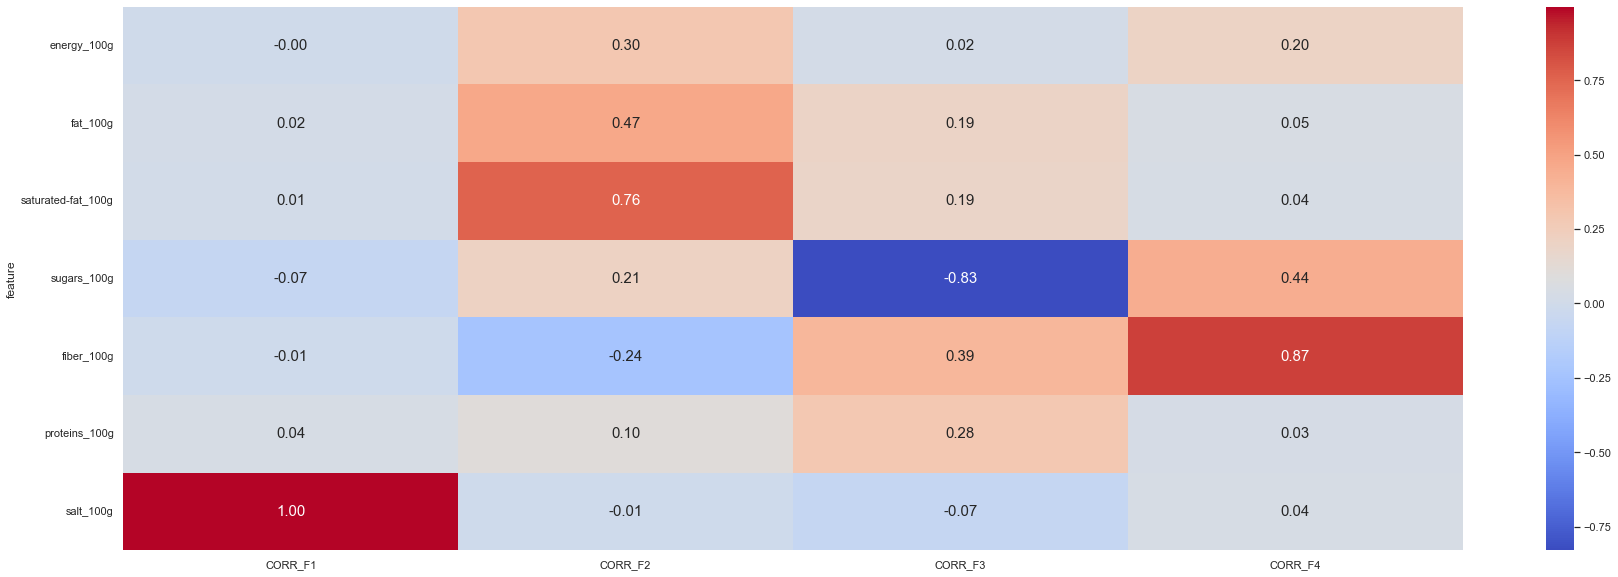

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})

**Conclusion:**

On remarque que :

**Pour la composante principale F1:**

- La longueur de la flèche de la variable ‘salt_100g’ est très bien représentée (importante) et est de 0.99. Elle forme un angle très aigu (0) avec l’axe de la composante principale F1. Donc, la variable ‘salt_100g’ est positivement corrélée.

**Pour la composante principale F2:**

- La longueur de la flèche de la variable 'saturated-fat_100g' est très bien représentée (importante) et est de 0.76. Elle forme un angle très aigu (0) avec l’axe de la composante principale F2. Donc, la variable 'saturated-fat_100g' est positivement corrélée.

- La longueur de la flèche de la variable ‘fat_100g’ est moyennement bien représentée et est de 0.47. Elle forme un angle très aigu (0) avec l’axe de la composante principale F2. Donc, la variable ‘fat_100g’ est moyennement corrélée dans le sens positive.

- La longueur de la flèche de la variable ‘energy_100g’ est faiblement représentée et est de 0.29. Elle forme un angle très aigu (0) avec l’axe de la composante principale F2. Donc, la variable ‘energy_100g’ est faiblement corrélée positivement.

- La longueur de la flèche de la variable ‘sugars_100g’ est faiblement représentée et est de 0.21. Elle forme un angle très aigu (0) avec l’axe de la composante principale F2. Donc, la variable ‘sugars_100g’ est faiblement corrélée positivement.

- La longueur de la flèche de la variable ‘fiber_100g’ est faiblement représentée et est de -0.23. Elle forme un angle très aigu (0) avec l’axe de la composante principale F2. Donc, la variable ‘fiber_100g’ est faiblement corrélée négativement.

**Pour la composante principale F3:**

- La longueur de la flèche de la variable ‘sugars_100g’ est très bien représentée (importante) et est de -0.83. Elle forme un angle  aigu  avec l’axe de la composante principale F3. Donc, la variable ‘sugars_100g’ est fortement corrélée négativement.

- La longueur de la flèche de la variable ‘fiber_100g’ est moyennement représentée et est de 0.39. Elle forme un angle aigu avec l’axe de la composante principale F3. Donc, la variable ‘fiber_100g’ est moyennement corrélée dans le sens positive.

- La longueur de la flèche de la variable 'proteins_100g' est moyennement représentée et est de 0.28. Elle forme un angle aigu avec l’axe de la composante principale F3. Donc, la variable 'proteins_100g' est moyennement corrélée dans le sens positive.

**Pour la composante principale F4:**
- La longueur de la flèche de la variable ‘fiber_100g’ est très bien représentée (importante) et est de 0.87. Elle forme un angle aigu (< 90 degres) avec l’axe de la composante principale F4. Donc, la variable ‘fiber_100g’ est fortement corrélée positivement.

- La longueur de la flèche de la variable ‘fat_100g’ est bien représentée (importante) et est de 0.44. Elle forme un angle très aigu  avec l’axe de la composante principale F4. Donc, la variable ‘fat_100g’ est positivement corrélée.

#### 3. **Projection des individus:** 

3. 1. **Affichage des projections des individus:**

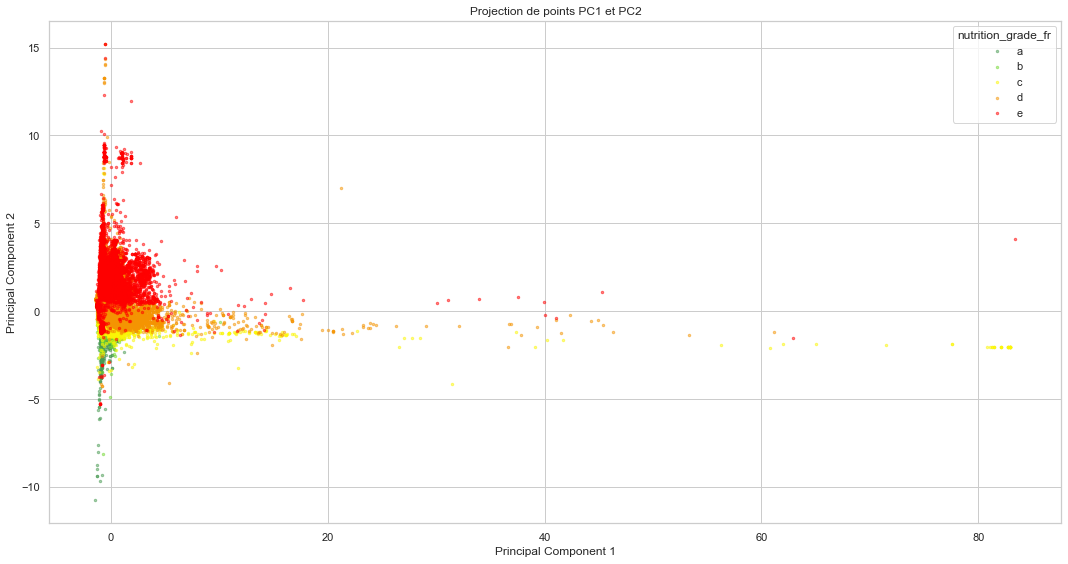

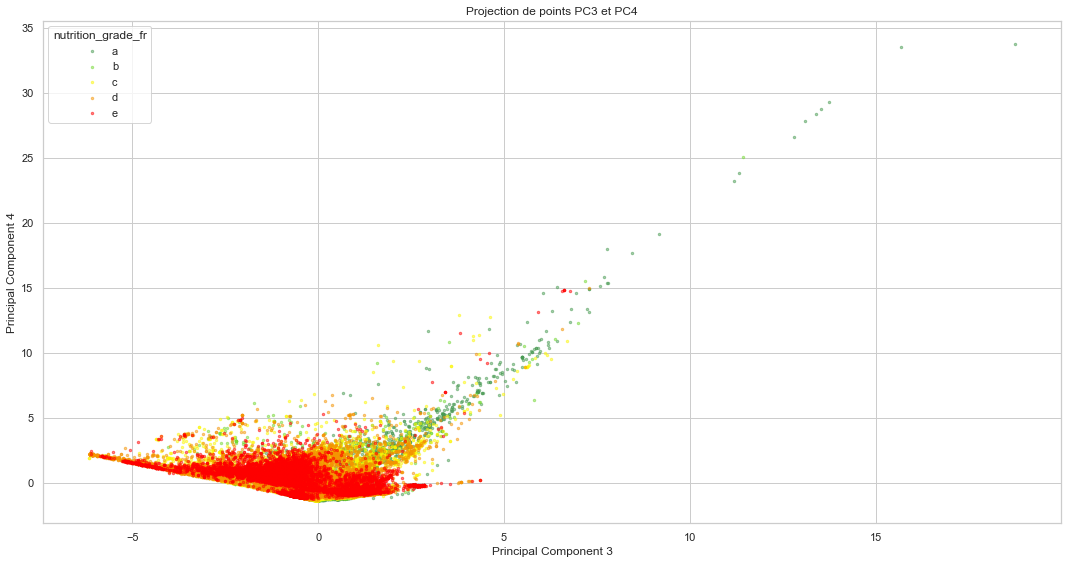

In [ ]:
for tuple in list_tuples_projection:
    # Visualisation des données projetées sur les deux premières composantes principales en fonction de la variable nutrition_grade_fr
    plt.figure(figsize=(15, 8))
    for grade in sorted(nutrition_grade.unique()):
        plt.scatter(X_projected[nutrition_grade == grade, tuple[0]], X_projected[nutrition_grade == grade, tuple[1]], alpha=0.5, label=grade, 
                    color={'a': "#499A53", 'b': "#74D834", 'c': "#FBF605", 'd': "#F49402", 'e': "#FF0000"}[grade], s=6)
    plt.xlabel('Principal Component {}'.format(int(tuple[0]) + 1))
    plt.ylabel('Principal Component {}'.format(int(tuple[1]) + 1))
    plt.title('Projection de points PC{} et PC{}'.format(int(tuple[0]) + 1, int(tuple[1]) + 1))
    plt.legend(title='nutrition_grade_fr')
    plt.tight_layout()
    plt.show()


**Conclusion:**

**Dans le graphe PC1/PC2 :**

**L’axe PC1** représente les produits **très salés**. Il est représenté par le nuage de points avec des couleurs rouge (catégorie e), orange (catégorie d) et jaune (catégorie c). Cela confirme que les produits très salés, qui ont un grade nutritionnel de mauvaise qualité, peuvent avoir une mauvaise influence sur la santé1. En effet, une consommation excessive de sel peut entraîner des problèmes de santé tels que l’hypertension artérielle, les maladies cardiovasculaires et les maladies rénales.

**L’axe PC2** représente les produits gras, gras saturés. Il est représenté par le nuage de points avec des couleurs rouge (catégorie e) et orange (catégorie d). Cela confirme que les produits très gras, qui ont un grade nutritionnel de mauvaise qualité, peuvent conduire à l’obésité et à d’autres problèmes de santé. Les aliments riches en graisses et en sucre peuvent augmenter les niveaux de dopamine dans le cerveau, ce qui peut conduire à une dépendance alimentaire.

**Dans le graphe PC3/PC4 :**

**L’axe PC3** représente les produits **très sucrés**. Il est représenté par le nuage de points avec des couleurs rouge (catégorie e) et orange (catégorie d). Cela confirme que les produits très sucrés, qui ont un grade nutritionnel de mauvaise qualité, peuvent conduire à l’obésité et à d’autres problèmes de santé45. Une consommation excessive de sucre peut entraîner des problèmes de santé tels que la prise de poids, le développement du diabète, et même augmenter le risque de certains types de cancer.

**L’axe PC4** représente les produits **fruits, légumes et céréales**. Il est représenté par le nuage de points avec des couleurs vert foncé (catégorie a) et vert clair (catégorie b). Cela confirme que les produits **riches en fibres**, qui ont un grade nutritionnel de très bonne qualité, peuvent avoir une bonne influence sur la santé7. Les fibres alimentaires sont essentielles pour la santé et pour les intestins. Elles peuvent aider à réduire le cholestérol LDL (« mauvais cholestérol »), un des facteurs de risque dans le développement de maladies cardiovasculaires.